## Summer 2020
### Irem Nesli Erez

#### Setting the environment:

In [1]:
import os 
import numpy as np
import math
import scipy.special
import scipy.stats
import scipy.constants

import matplotlib as mpl
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.io import fits

path = '/global/homes/i/ineslie/myhack/'
os.chdir(path)

#### Reading the DR14 eBOSS Stripe 82 Data:

In [2]:
fname=path+'/Catalogs/DR14Q_S82.fits'
c=fits.open(fname)
c

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x2aaad81f9a10>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x2aaad822e990>]

In [9]:
h=c[1] 
Table(h.data)

<Table length=28874>
    SDSS_NAME               RA          ... FIRST_SNR SDSS2FIRST_SEP
      str18              float64        ...  float64     float64    
------------------ -------------------- ... --------- --------------
000001.55-003332.6 0.006463516241467461 ...      -1.0           -1.0
000001.64+003459.4 0.006855391014397583 ...      -1.0           -1.0
000001.93-001427.4 0.008066690579690672 ...      -1.0           -1.0
000003.17+011510.6 0.013228995209772164 ...      -1.0           -1.0
000003.27+001132.8 0.013630253212241428 ...      -1.0           -1.0
000004.78-005434.6  0.01994309883036749 ...      -1.0           -1.0
00004.967-001642.0 0.020695853049522484 ...      -1.0           -1.0
000005.02-003829.0 0.020928563291278124 ...      -1.0           -1.0
000005.41+002638.0 0.022563266250813285 ...      -1.0           -1.0
000006.15-003009.6  0.02563828062710627 ...      -1.0           -1.0
               ...                  ... ...       ...            ...
235956.96+000245.7    359.9873535398967 ...      -1.0           -1.0
235957.06-002243.7   359.98775464225787 ...      -1.0           -1.0
235957.42+010033.7    359.9892505614765 ...      -1.0           -1.0
235957.55+003919.8    359.9898163506212 ...      -1.0           -1.0
235958.21+005139.8    359.9925537109375 ...      -1.0           -1.0
235958.62+002551.4   359.99427316585815 ...      -1.0           -1.0
235958.66-011225.3   359.99444580078125 ...      -1.0           -1.0
235958.72+003345.3   359.99468994140625 ...      -1.0           -1.0
235959.44+000841.5    359.9976806640625 ...      -1.0           -1.0
235959.64-003921.1   359.99851995615614 ...      -1.0           -1.0

In [50]:
fname=path+'/Catalogs/DLA_DR14_v1b.fits'
c=fits.open(fname)
c
h=c[1] 
Table(h.data)

<Table length=34518>
 THING_ID    Z           ZQSO        ...         DEC         DLAID
  int64   float64      float64       ...       float64       int64
--------- ------- ------------------ ... ------------------- -----
 21073834   2.484              2.715 ... -10.813915417666829     1
 21643055  2.6541              2.826 ...  -10.63795327281084     2
 21690890  2.6342 3.4610000000000003 ... -10.714024863244617     3
 21785773  2.8167 2.9189999999999996 ... -10.643812524592368     4
 21846288  2.9977              3.175 ...  -10.69199464029787     5
 22494771  2.2731              2.673 ... -10.389775223024314     6
 22966711  2.0297 2.0269999999999997 ... -10.364703407016847     7
 22975182  2.1709              2.479 ... -10.193696540406368     8
 22975313  2.2806              2.449 ...  -10.36573666574406     9
 22979150  3.2607 3.9419999999999997 ... -10.197173378585159    10
      ...     ...                ... ...                 ...   ...
552496124  3.5071 3.6839999999999997 ...   68.14315023706911 34509
552658596  2.5572              2.917 ...   68.30552960313102 34510
552658596  2.0447              2.917 ...   68.30552960313102 34511
552760458  2.1217 2.4330000000000003 ...   68.32868905036872 34512
552769915  3.3726              3.472 ...   68.30370800100737 34513
552769915  2.7626              3.472 ...   68.30370800100737 34514
552769915  3.1398              3.472 ...   68.30370800100737 34515
552987845  2.1826 2.2880000000000003 ...   68.39614815786939 34516
553191513  3.0859              3.258 ...   68.53231082874652 34517
553213422  2.5912 2.7030000000000003 ...   68.63815947103323 34518

In [4]:
h.data
print(h.data)

[ 60  63 120 ...  69  62  10]


In [5]:
h=c[1] 
h.header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 1658 / length of dimension 1                          
NAXIS2  =                28874 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                  105 / number of table fields                         
TTYPE1  = 'SDSS_NAME'                                                           
TFORM1  = '18A     '                                                            
TUNIT1  = '-       '                                                            
TTYPE2  = 'RA      '                                                            
TFORM2  = 'D       '        

In [20]:
hdata=Table(h.data)

<Table length=28874>
    SDSS_NAME               RA          ... FIRST_SNR SDSS2FIRST_SEP
      str18              float64        ...  float64     float64    
------------------ -------------------- ... --------- --------------
000001.55-003332.6 0.006463516241467461 ...      -1.0           -1.0
000001.64+003459.4 0.006855391014397583 ...      -1.0           -1.0
000001.93-001427.4 0.008066690579690672 ...      -1.0           -1.0
000003.17+011510.6 0.013228995209772164 ...      -1.0           -1.0
000003.27+001132.8 0.013630253212241428 ...      -1.0           -1.0
000004.78-005434.6  0.01994309883036749 ...      -1.0           -1.0
00004.967-001642.0 0.020695853049522484 ...      -1.0           -1.0
000005.02-003829.0 0.020928563291278124 ...      -1.0           -1.0
000005.41+002638.0 0.022563266250813285 ...      -1.0           -1.0
000006.15-003009.6  0.02563828062710627 ...      -1.0           -1.0
               ...                  ... ...       ...            ...
235956.96+000245.7    359.9873535398967 ...      -1.0           -1.0
235957.06-002243.7   359.98775464225787 ...      -1.0           -1.0
235957.42+010033.7    359.9892505614765 ...      -1.0           -1.0
235957.55+003919.8    359.9898163506212 ...      -1.0           -1.0
235958.21+005139.8    359.9925537109375 ...      -1.0           -1.0
235958.62+002551.4   359.99427316585815 ...      -1.0           -1.0
235958.66-011225.3   359.99444580078125 ...      -1.0           -1.0
235958.72+003345.3   359.99468994140625 ...      -1.0           -1.0
235959.44+000841.5    359.9976806640625 ...      -1.0           -1.0
235959.64-003921.1   359.99851995615614 ...      -1.0           -1.0

In [6]:
RA=h.data['RA']
DEC=h.data['DEC']

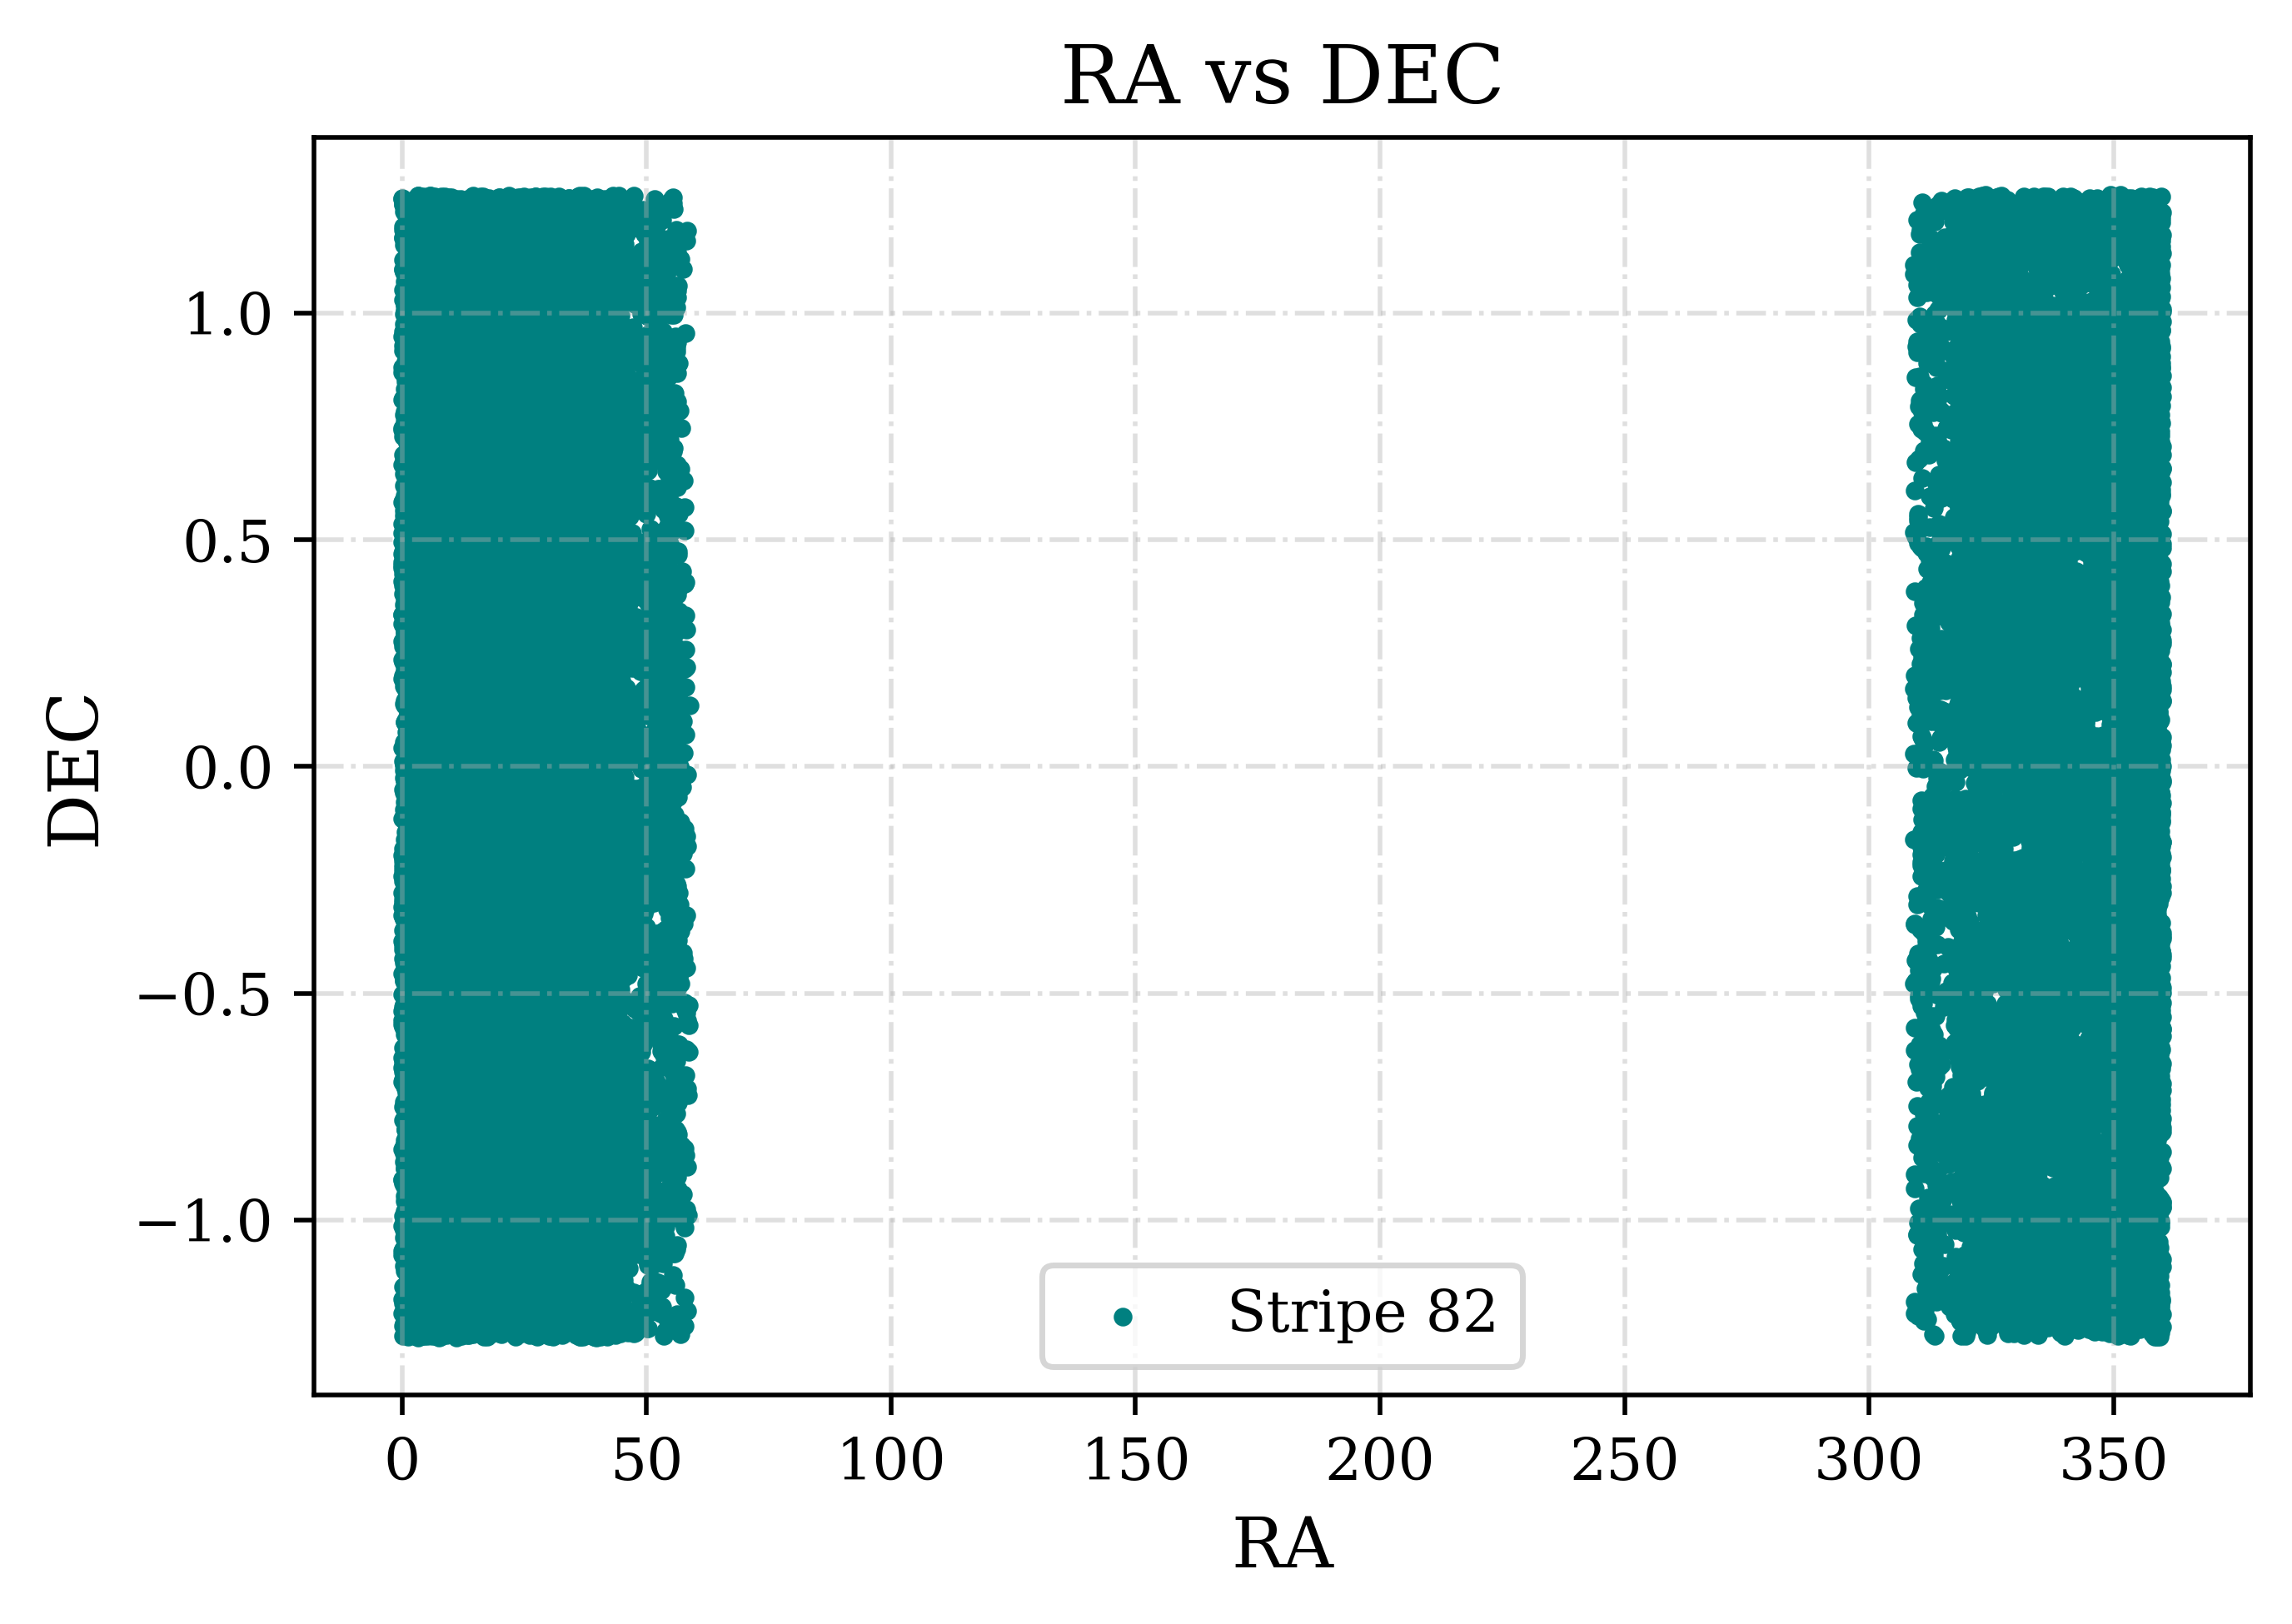

In [7]:
plt.figure()
%matplotlib inline
dpi=500   #to make the plot bigger 
mpl.rcParams['figure.dpi']= dpi
plt.rc('text', usetex=False)
plt.rc('font', family='serif')

plt.grid(True,ls='-.',alpha=.4)
plt.title(r'RA vs DEC',fontsize=14)
plt.xlabel(r'RA',fontsize=12)
plt.ylabel(r'DEC',fontsize=12)
plt.scatter(RA,DEC, color='teal', s=5, label='Stripe 82')
#props = dict(boxstyle='round', facecolor='pink', alpha=0.5)
#plt.text(0.55,20 , '$H_{0}=$'+str(H_0*1e6)+'$\, km/sMpc$', bbox=props, fontsize=6)
plt.legend();
plt.show()

In [8]:
Z=h.data['Z']

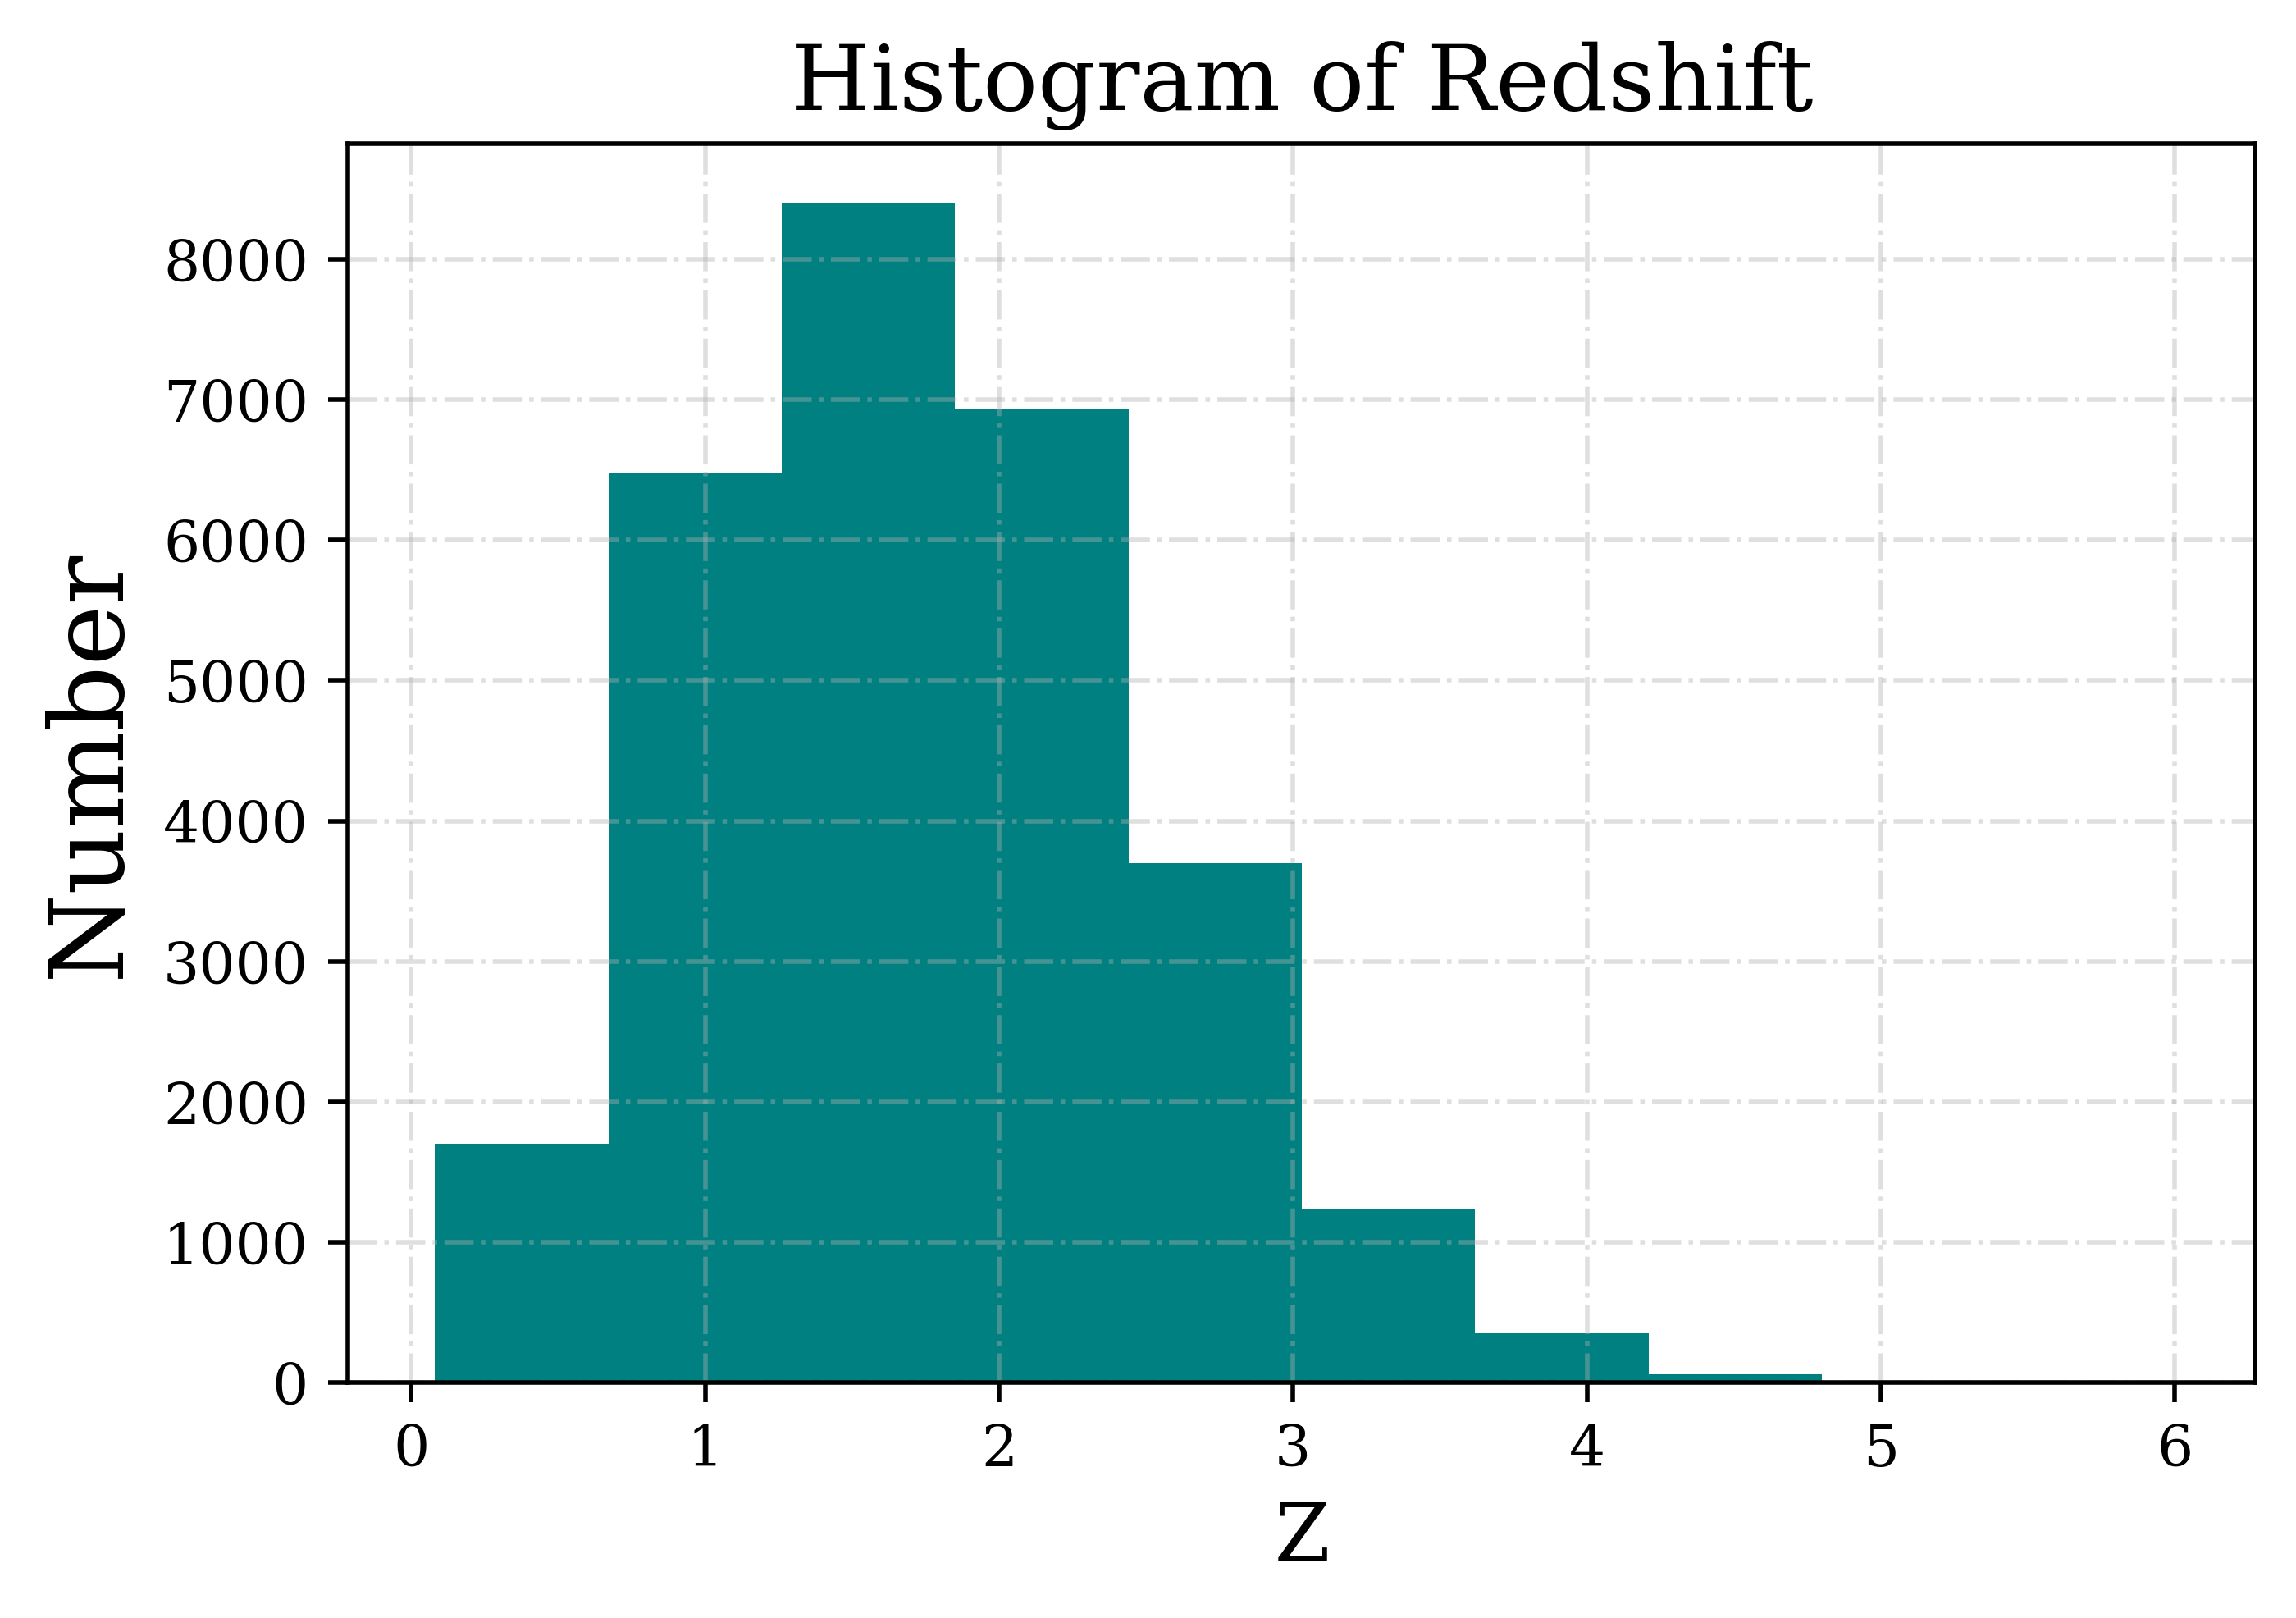

In [9]:
plt.figure()
%matplotlib inline
dpi=500   #to make the plot bigger 
mpl.rcParams['figure.dpi']= dpi
plt.rc('text', usetex=False)
plt.rc('font', family='serif')

plt.grid(True,ls='-.',alpha=.4)
plt.title(r'Histogram of Redshift',fontsize=16)
plt.xlabel(r'Z',fontsize=14)
plt.ylabel(r'Number',fontsize=18)

plt.hist(Z, color='teal')

plt.show()

In [21]:
hdata

<Table length=28874>
    SDSS_NAME               RA          ... FIRST_SNR SDSS2FIRST_SEP
      str18              float64        ...  float64     float64    
------------------ -------------------- ... --------- --------------
000001.55-003332.6 0.006463516241467461 ...      -1.0           -1.0
000001.64+003459.4 0.006855391014397583 ...      -1.0           -1.0
000001.93-001427.4 0.008066690579690672 ...      -1.0           -1.0
000003.17+011510.6 0.013228995209772164 ...      -1.0           -1.0
000003.27+001132.8 0.013630253212241428 ...      -1.0           -1.0
000004.78-005434.6  0.01994309883036749 ...      -1.0           -1.0
00004.967-001642.0 0.020695853049522484 ...      -1.0           -1.0
000005.02-003829.0 0.020928563291278124 ...      -1.0           -1.0
000005.41+002638.0 0.022563266250813285 ...      -1.0           -1.0
000006.15-003009.6  0.02563828062710627 ...      -1.0           -1.0
               ...                  ... ...       ...            ...
235956.96+000245.7    359.9873535398967 ...      -1.0           -1.0
235957.06-002243.7   359.98775464225787 ...      -1.0           -1.0
235957.42+010033.7    359.9892505614765 ...      -1.0           -1.0
235957.55+003919.8    359.9898163506212 ...      -1.0           -1.0
235958.21+005139.8    359.9925537109375 ...      -1.0           -1.0
235958.62+002551.4   359.99427316585815 ...      -1.0           -1.0
235958.66-011225.3   359.99444580078125 ...      -1.0           -1.0
235958.72+003345.3   359.99468994140625 ...      -1.0           -1.0
235959.44+000841.5    359.9976806640625 ...      -1.0           -1.0
235959.64-003921.1   359.99851995615614 ...      -1.0           -1.0

In [40]:
sort=Table.read('/global/project/projectdirs/cosmo/data/sdss/dr14/eboss/spectro/redux/v5_10_0/platelist-mjdsort.txt', format='ascii')

In [42]:
len(sort)

3159

In [43]:
len(hdata)

28874

In [15]:
sort=Table.read('/global/project/projectdirs/cosmo/data/sdss/dr14/eboss/spectro/redux/v5_10_0/platelist.txt', format='ascii')

In [16]:
sort
mask = (sort['N_sky']==82 )
sorted_s82= sort[mask]

In [17]:
sorted_s82

<Table masked=True length=59>
PLATE  MJD   RACEN   DECCEN  RUN2D  ...     PROG      CHUNK  TILEID PUBLIC
int64 int64 float64 float64   str7  ...    str27      str14  int64   str4 
----- ----- ------- ------- ------- ... ------------ ------- ------ ------
 3673 55178  117.14   46.63 v5_10_0 ...         boss   boss2  10098    DR9
 3769 55240  152.32   -1.83 v5_10_0 ...         boss   boss4  10196    DR9
 3773 55240  166.75   -1.71 v5_10_0 ...         boss   boss4  10224    DR9
 3793 55214  190.95   -1.67 v5_10_0 ...         boss   boss4  10213    DR9
 3867 55652  216.07    30.9 v5_10_0 ...         boss   boss5  10268    DR9
 3948 55331  234.08   23.49 v5_10_0 ...         boss   boss6  10307    DR9
 3965 55302  186.66   37.23 v5_10_0 ...         boss   boss5  10241    DR9
 3978 55330  196.82   37.98 v5_10_0 ...         boss   boss5  10233    DR9
 4004 55321   199.0    0.09 v5_10_0 ...         boss   boss7  10324    DR9
 4033 55332  211.42     2.1 v5_10_0 ...         boss   boss7  10353    DR9
  ...   ...     ...     ...     ... ...          ...     ...    ...    ...
 7257 56658   86.88    0.18 v5_10_0 ... Orion_Taurus boss211  15753   DR12
 7391 56781   161.1   45.96 v5_10_0 ...      sequels boss214  15862     --
 7448 56739  143.82   51.37 v5_10_0 ...         boss  boss29  14473   DR12
 7601 56959  354.66   20.77 v5_10_0 ...        eboss  eboss1  16143     --
 7694 57359    4.19   27.78 v5_10_0 ...        eboss  eboss1  16237     --
 7894 57339   24.03   -4.16 v5_10_0 ...        eboss  eboss2  16318     --
 7914 57331   19.38   -3.98 v5_10_0 ...        eboss  eboss2  16371     --
 8380 57520   207.1    44.0 v5_10_0 ...        eboss  eboss5  16698     --
 8410 57481  238.07   50.73 v5_10_0 ...        eboss  eboss3  16554     --
 8410 57107  238.07   50.73 v5_10_0 ...        eboss  eboss3  16554     --

Now, I am sure, so I can continue with reading the spectra data for each plate to calculate the SNR values. But I see that the same plate corresponding to the same RA and DEC can be used for a different MJD and I need to combine all that spectra data.
However, I see that instead of MJD, I should trust TILEID.

#### Cut 1: SNR>1

Not really sure which one to use: W1SNR-W4SNR or FIRST_SNR ?

In [10]:
table_hdu = Table.read(c[1])

In [11]:
mask = (h.data['FIRST_SNR']>1 )
h_masked = table_hdu[mask]

In [12]:
h_masked

<Table length=737>
    SDSS_NAME               RA         ... FIRST_SNR     SDSS2FIRST_SEP  
        -                  deg         ...     -             arcsec      
      str18              float64       ...  float64         float64      
------------------ ------------------- ... ---------- -------------------
000043.72+002001.9   0.182199581088355 ... 104.523415             0.10414
000051.56+001202.5  0.2148571737190004 ...  24.067779            0.062538
000054.95+010143.4  0.2289988757148649 ...  22.496028            0.454111
000111.19-002011.5 0.29664787896174794 ... 253.407688            0.067758
000143.46-002816.6  0.4310860140070076 ...  19.402797 0.15696400000000002
000151.51+010221.6  0.4646595631473929 ...  10.340362            0.274394
000215.52-003758.5  0.5647006565800758 ...   21.39747            0.228771
000221.12+002149.3  0.5880009309945535 ... 112.638997            0.284302
000222.47-000443.5  0.5936459898948669 ...   36.11565            0.380442
               ...                 ... ...        ...                 ...
235517.91-004411.7  358.82466136793533 ...  26.223538            0.118642
235520.59+000747.6   358.8357971506191 ... 177.335875            0.175652
235646.21-011503.1   359.1925795548105 ...   73.18465            0.150668
235702.54-004824.0  359.26061607776114 ...  27.455241            0.202857
235737.96+003227.8  359.40817895856935 ...  10.100378            0.862857
235750.58+004341.5   359.4607849121094 ...  51.442806            0.178188
235828.29+010832.0   359.6179015670653 ...  12.833658            0.247362
235839.62+002906.4  359.66510009765625 ...   9.563599             0.68702
235907.50+003730.7   359.7812798995532 ...  15.353876            0.187085
235936.82-003112.7   359.9034170597288 ... 1023.97834            0.180532

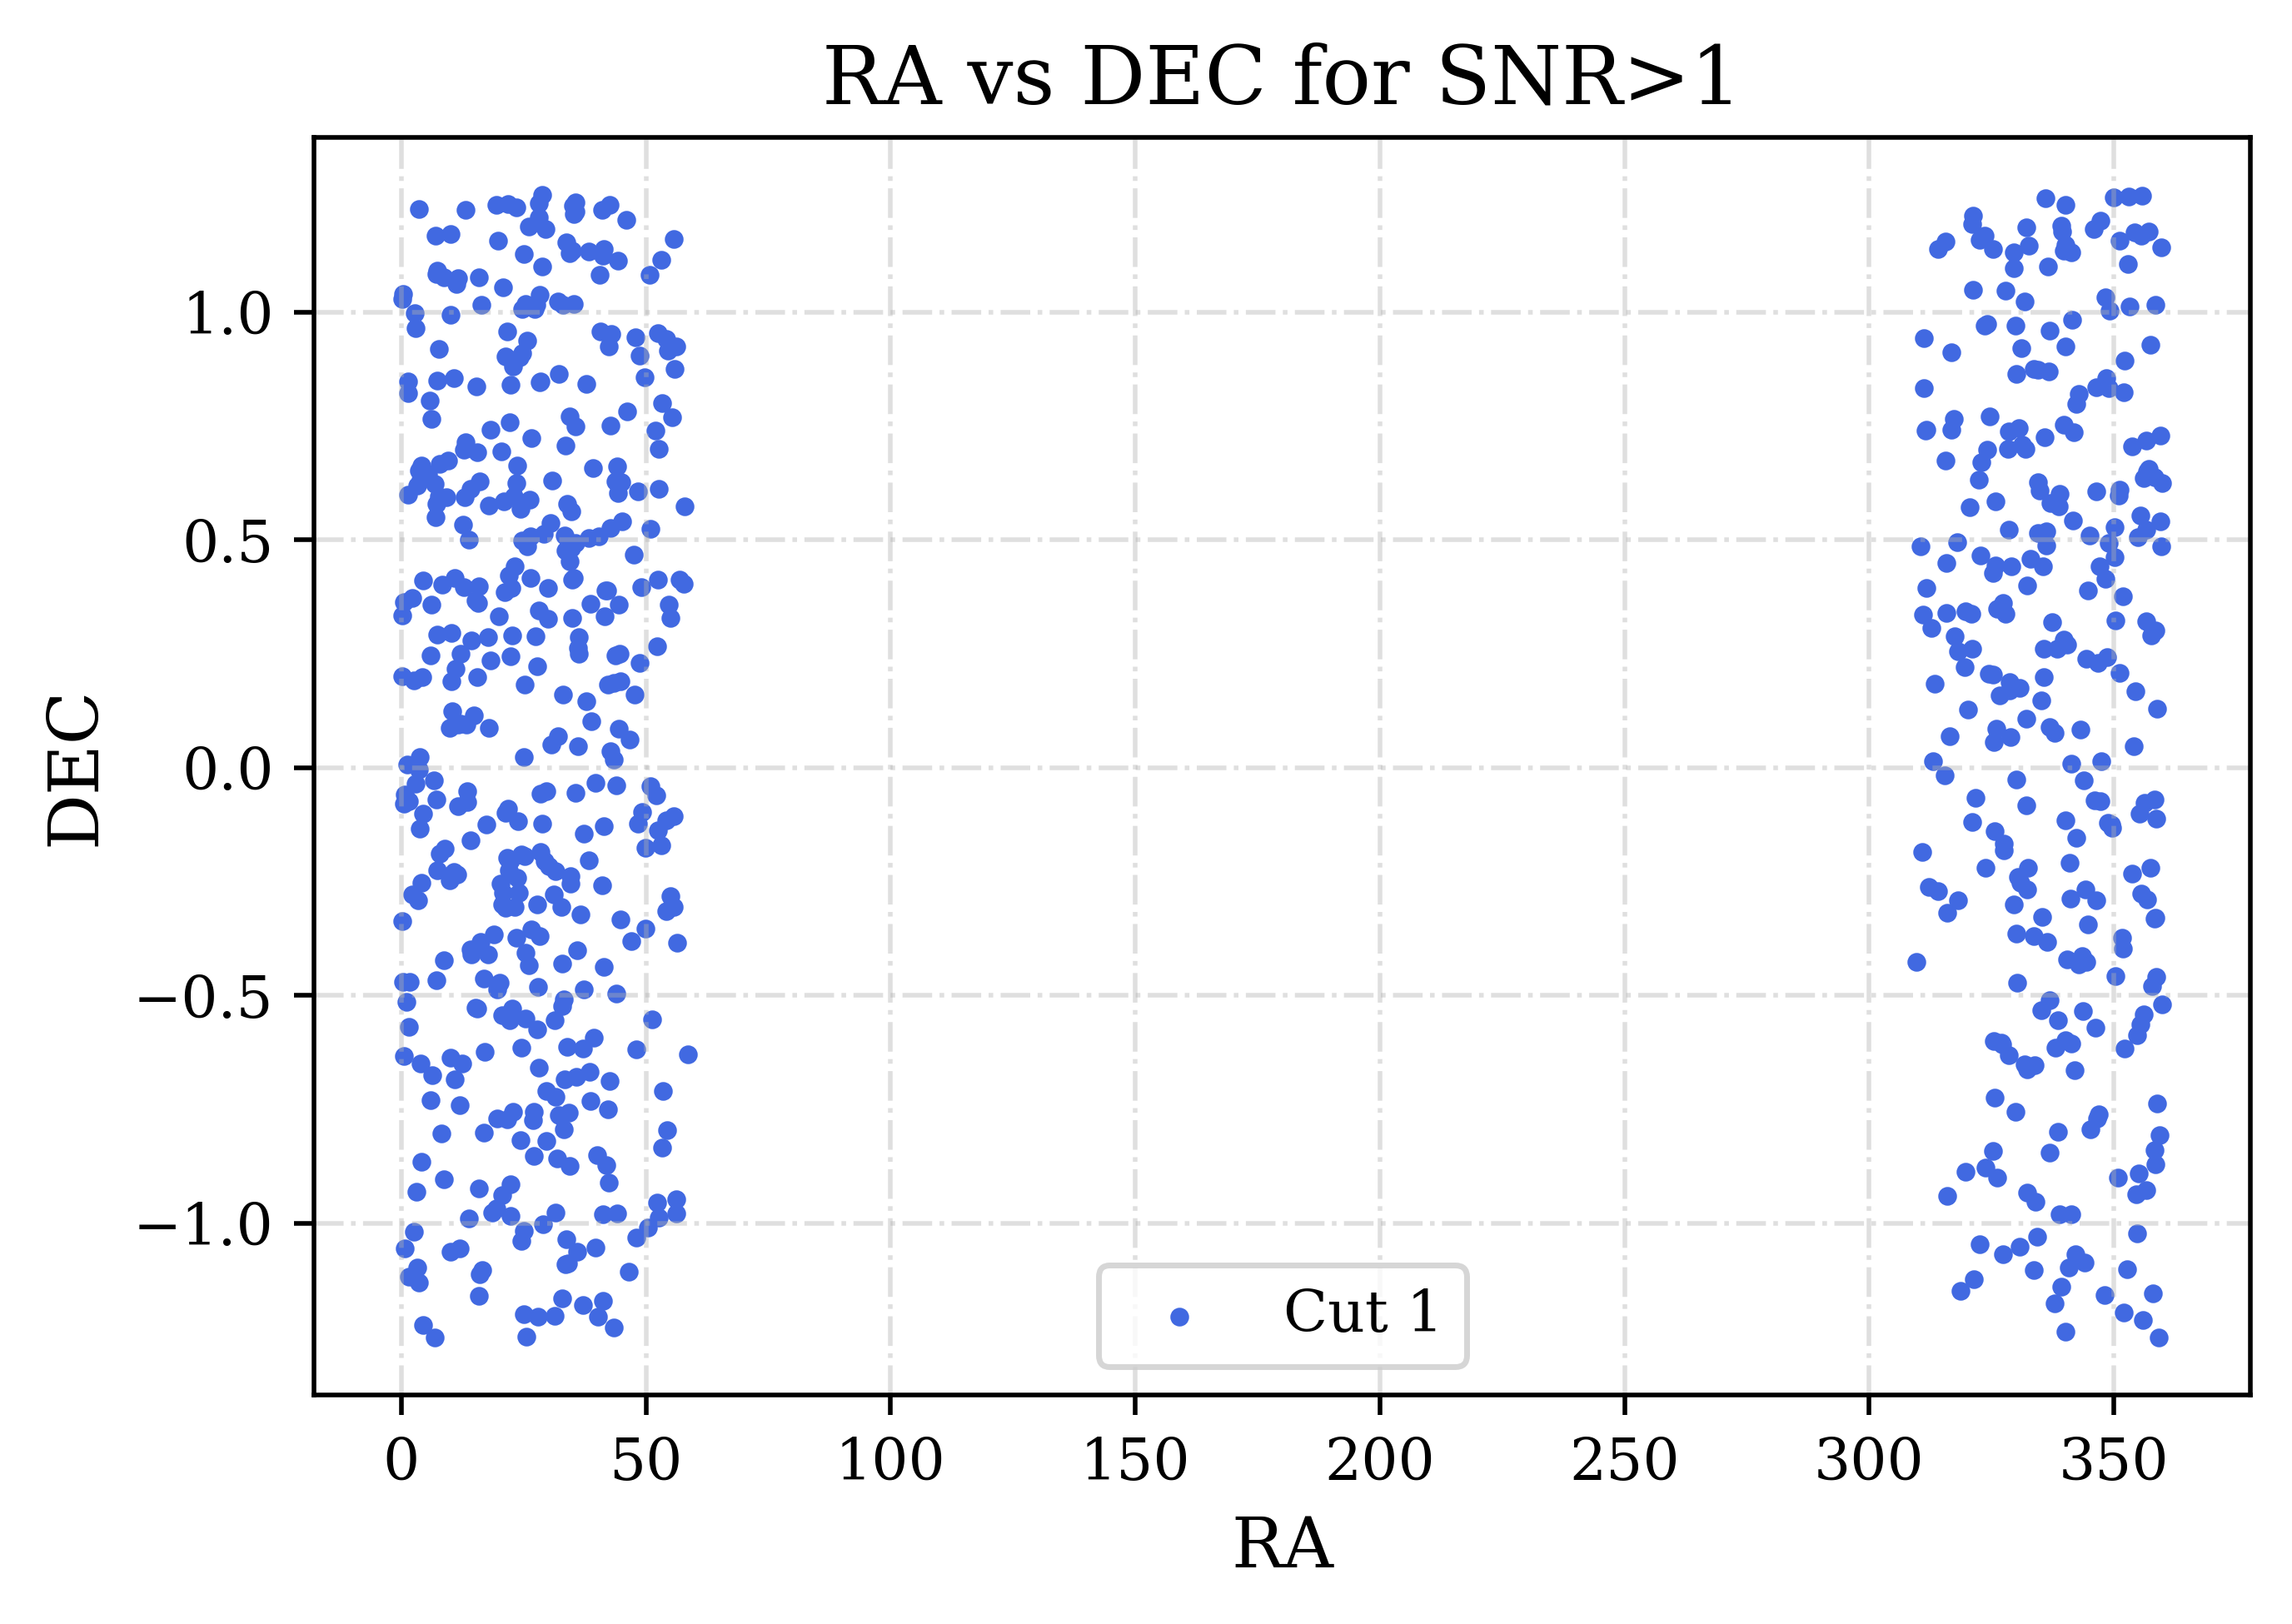

In [13]:
plt.figure()
%matplotlib inline
dpi=500   #to make the plot bigger 
mpl.rcParams['figure.dpi']= dpi
plt.rc('text', usetex=False)
plt.rc('font', family='serif')

plt.grid(True,ls='-.',alpha=.4)
plt.title(r'RA vs DEC for SNR>1',fontsize=14)
plt.xlabel(r'RA',fontsize=12)
plt.ylabel(r'DEC',fontsize=12)
plt.scatter(h_masked['RA'],h_masked['DEC'], color='royalblue', s=5, label='Cut 1')
#props = dict(boxstyle='round', facecolor='pink', alpha=0.5)
#plt.text(0.55,20 , '$H_{0}=$'+str(H_0*1e6)+'$\, km/sMpc$', bbox=props, fontsize=6)
plt.legend();
plt.show()

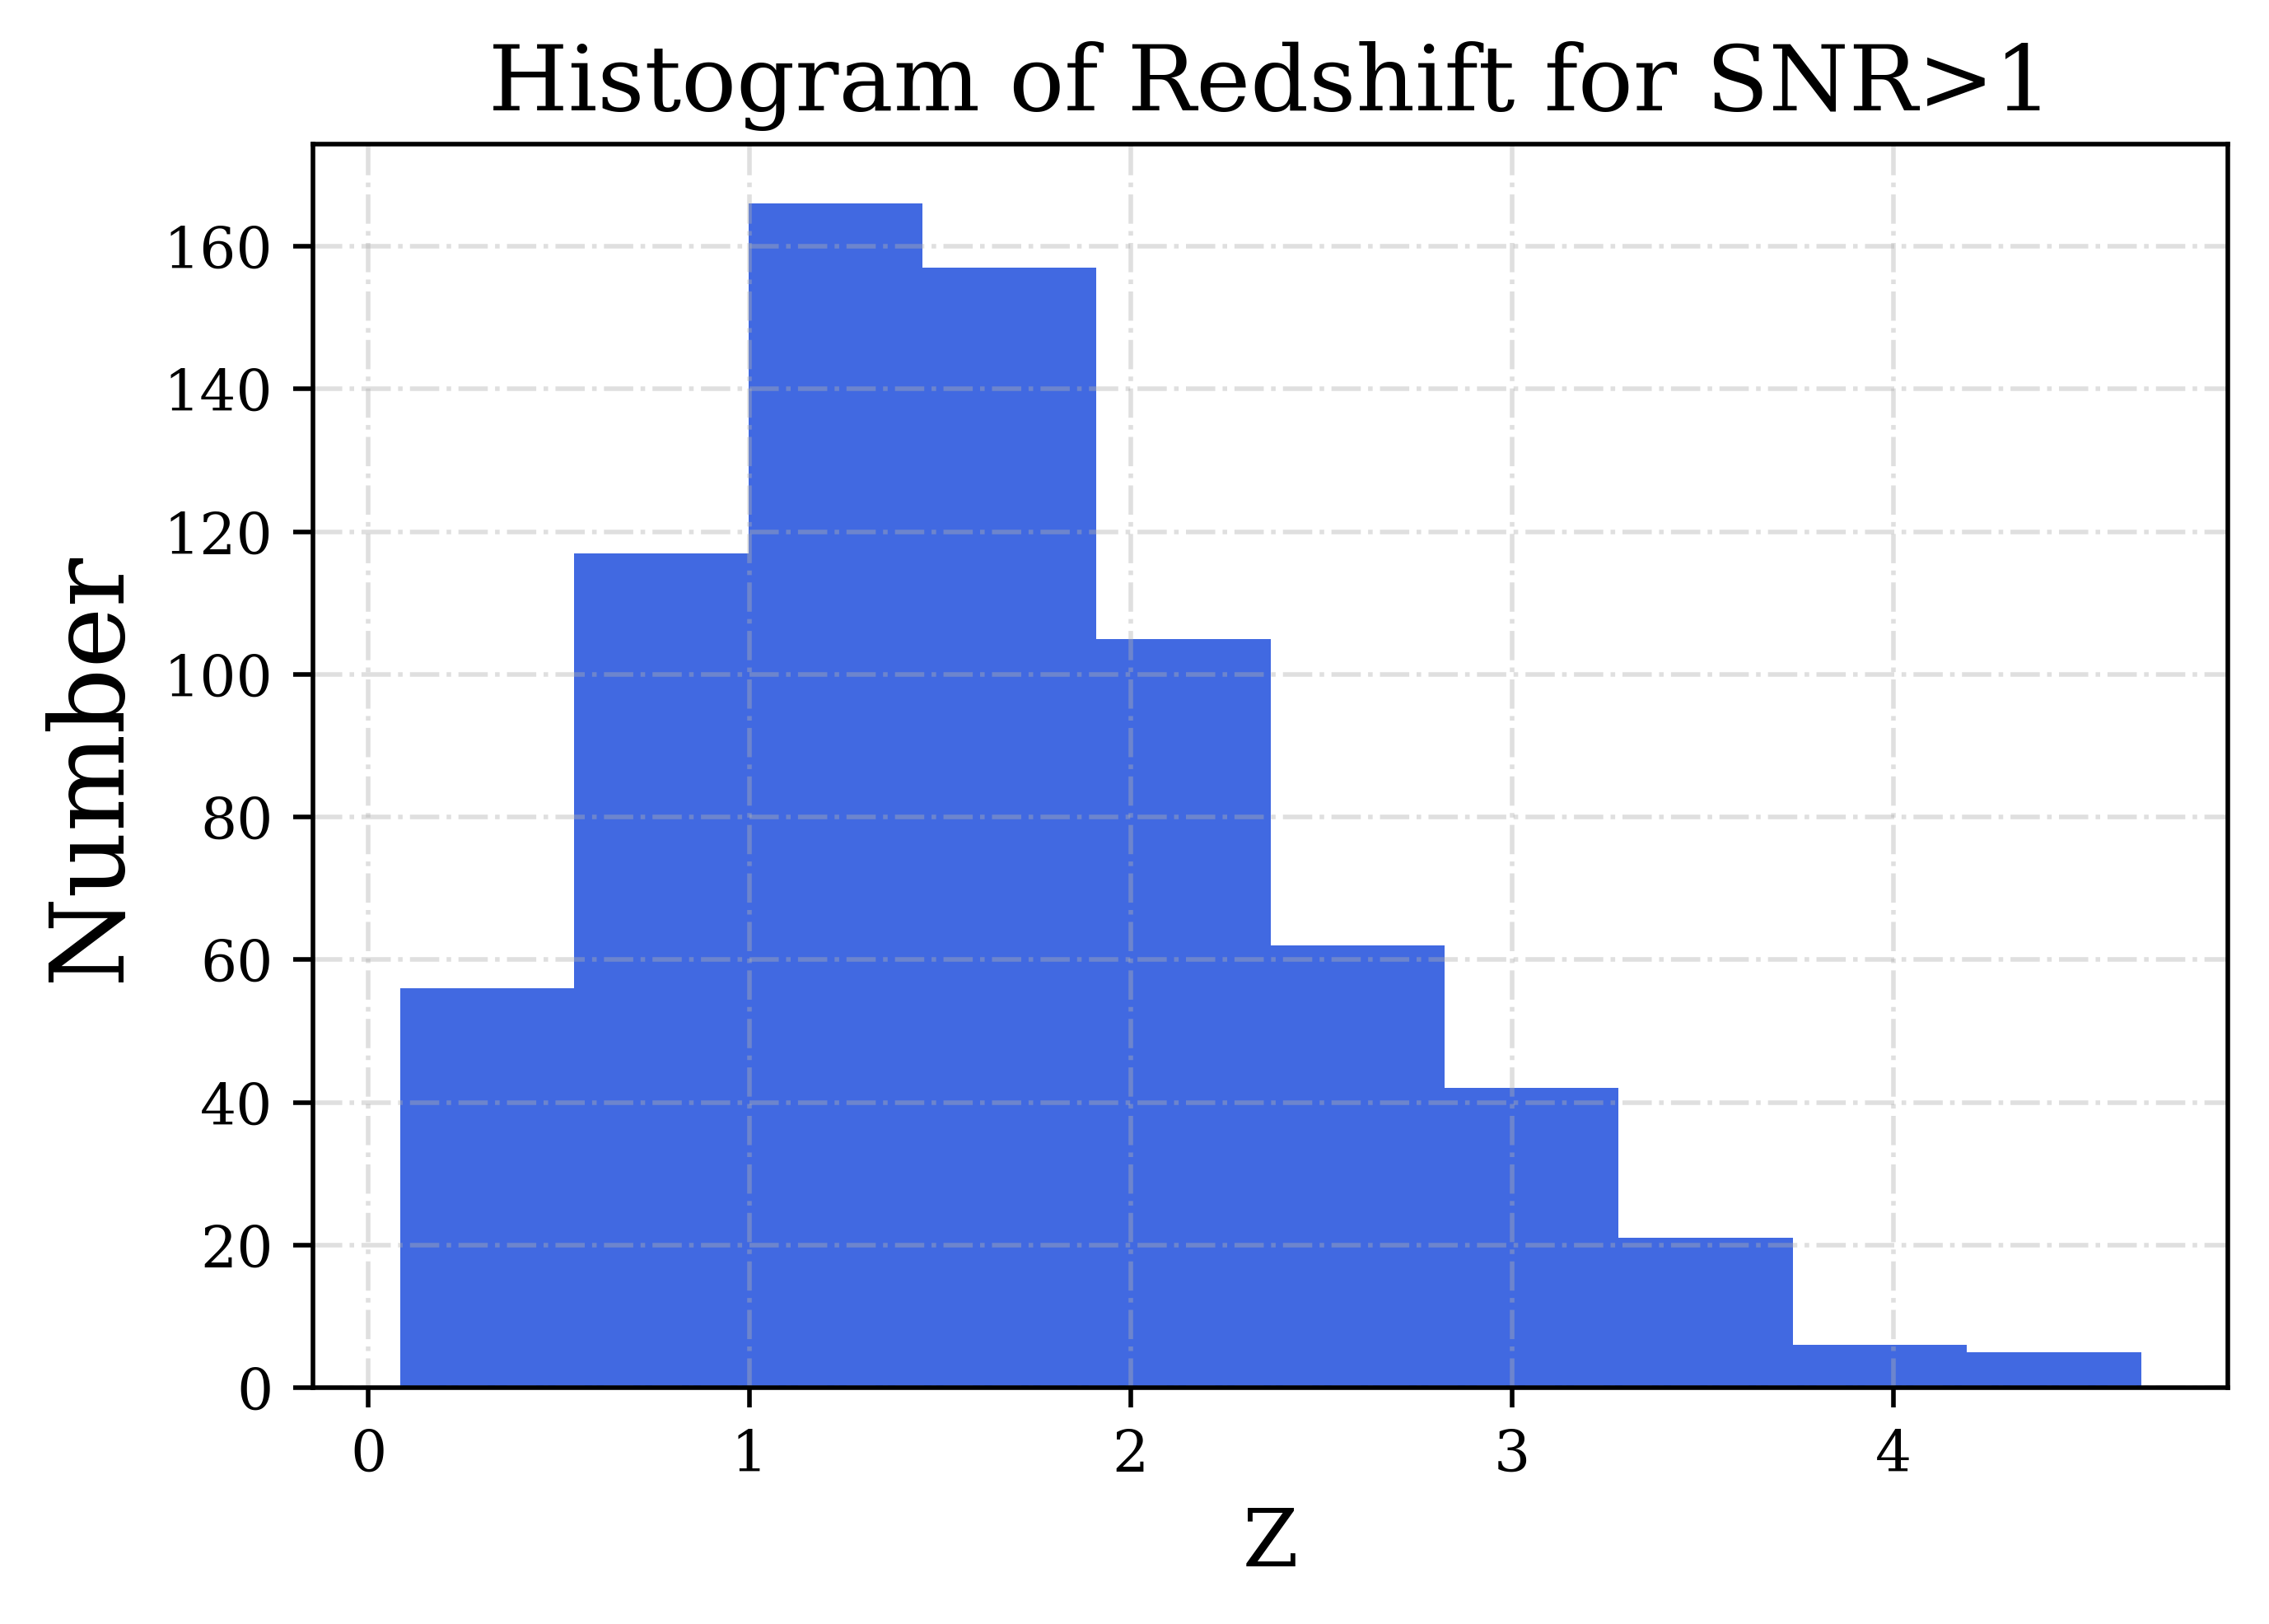

In [14]:
plt.figure()
%matplotlib inline
dpi=500   #to make the plot bigger 
mpl.rcParams['figure.dpi']= dpi
plt.rc('text', usetex=False)
plt.rc('font', family='serif')

plt.grid(True,ls='-.',alpha=.4)
plt.title(r'Histogram of Redshift for SNR>1',fontsize=16)
plt.xlabel(r'Z',fontsize=14)
plt.ylabel(r'Number',fontsize=18)

plt.hist(h_masked['Z'], color='royalblue')

plt.show()

In [15]:
table_hdu.add_column( table_hdu['FLUX_0.2_2.0keV']/table_hdu['FLUX_0.2_2.0keV_ERR'],name='SNR_0.2_2.0keV') 

In [16]:
table_hdu.add_column( table_hdu['FLUX_2.0_12.0keV']/table_hdu['FLUX_2.0_12.0keV_ERR'],name='SNR_2.0_12.0keV') 

In [17]:
len(table_hdu)

28874

In [18]:
mask = (table_hdu['SNR_0.2_2.0keV']>1)
h_masked = table_hdu[mask]
h_masked

/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/astropy/table/column.py:984: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)


<Table length=2731>
    SDSS_NAME              RA         ...   SNR_0.2_2.0keV     SNR_2.0_12.0keV  
        -                 deg         ...   erg / (cm2 s)       erg / (cm2 s)   
      str18             float64       ...      float64             float64      
------------------ ------------------ ... ------------------ -------------------
000355.23+001216.4 0.9801463979920708 ...   3.68784975729549 0.12442492518238175
000355.49+000736.4 0.9812129735946656 ...  8.904879225640427  3.0543171942436618
000416.67-000431.8 1.0694807557699733 ... 2.2504531386530933 0.20188402758336327
000416.78+001441.4 1.0699168185957433 ... 2.5792632571334666   0.640893916977348
000421.72+001204.4  1.090532249552302 ... 1.6375598854768345 0.19214861162965396
000431.01+000332.2 1.1292113505230557 ...   3.49042868731698  0.2025745344889727
000439.97-000146.4 1.1665589809417725 ... 2.5826047651498785  0.3608534624587399
000442.18+000023.3 1.1757786642904833 ...  12.23231215168503   5.033320275024848
000448.01-000108.7 1.2000593000000208 ...  3.255038407784368  0.8763638248894489
               ...                ... ...                ...                 ...
235826.70-000833.9  359.6112694649288 ...  8.189602104366486  3.2989070294441634
235828.74-001038.5  359.6197665881373 ... 1.6564118932455993  1.6308587155777643
235841.58-001634.1 359.67329024366205 ... 1.9750873030647746  1.4595523221667261
235844.95-000724.0 359.68731689453125 ...  7.191104125556422  1.2230176955005463
235845.67-000459.6  359.6903076171875 ...  9.351095022624433   2.683306280069051
235846.23-001133.5 359.69263614581735 ...    3.1695065329789  0.9761778397254826
235848.57-001448.6 359.70241214111365 ...   3.38598950190478  1.3475319549082965
235851.32-000558.9  359.7138331275773 ... 3.4481347460819736  1.1661156790473488
235854.85-000607.8  359.7285461425781 ...  4.254473332209888  1.7970901584122092
235913.51-000705.4  359.8063039150483 ...  3.422918705405697  0.9908580691756426

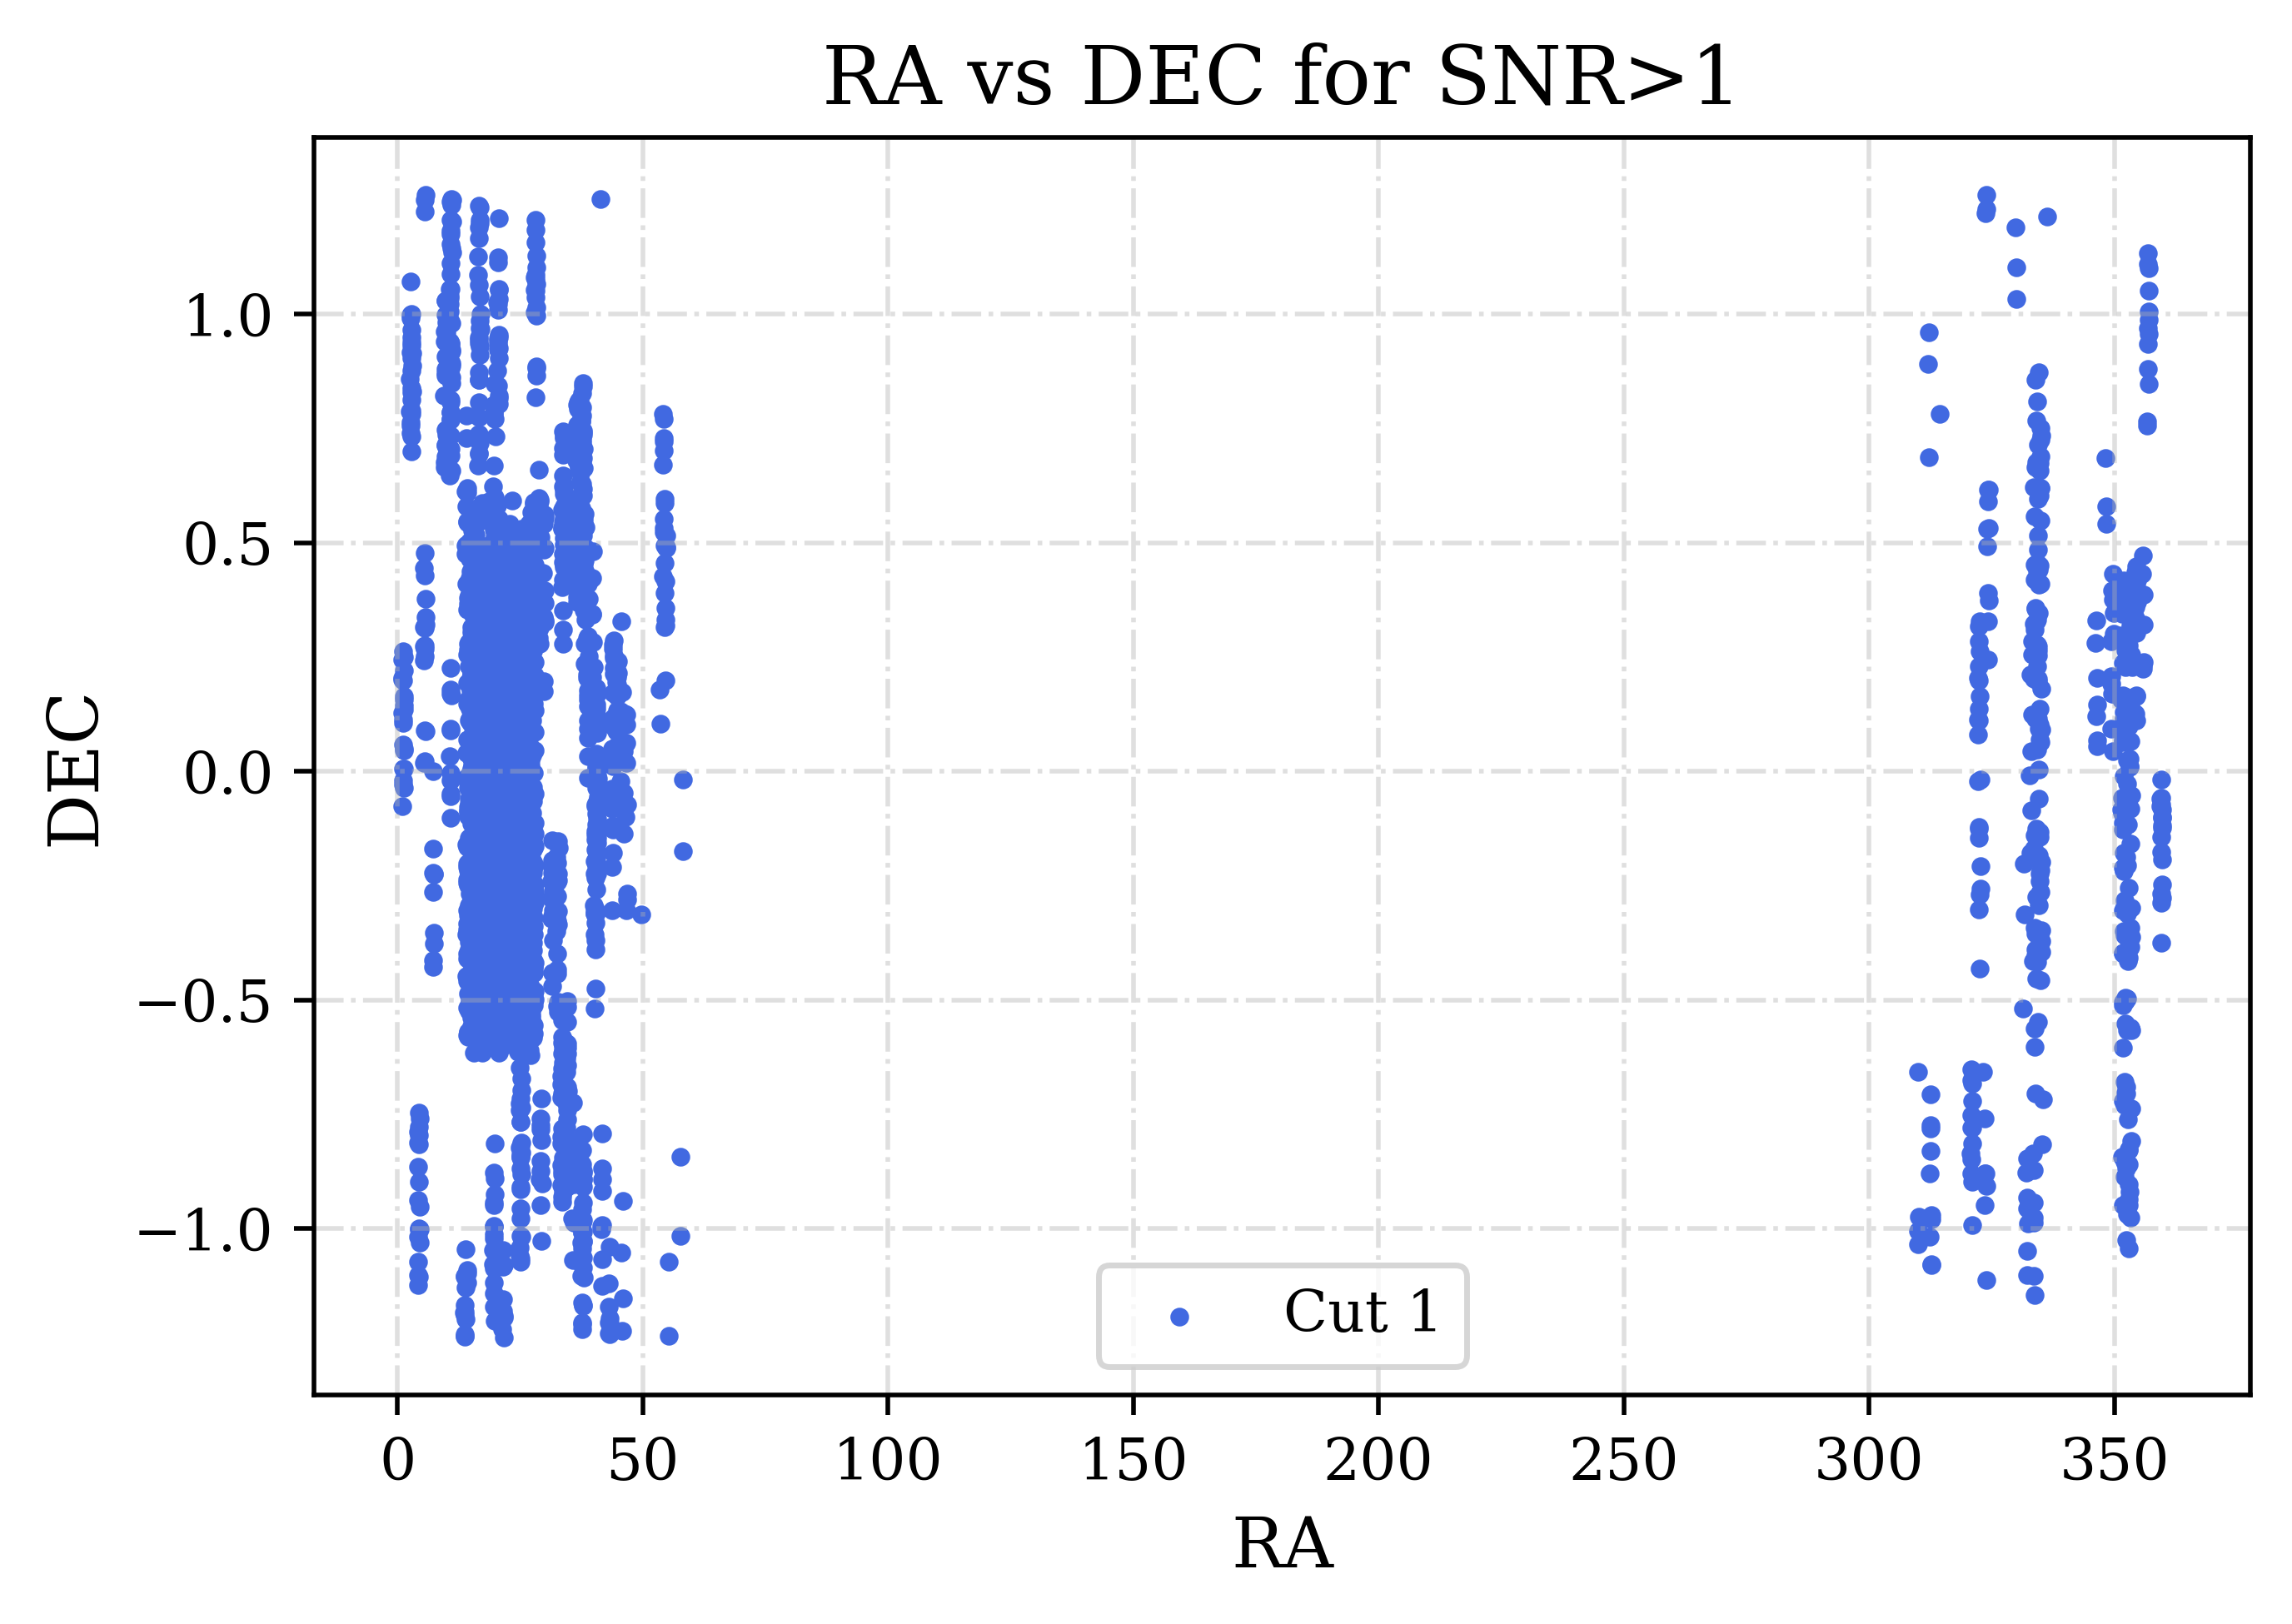

In [19]:
plt.figure()
%matplotlib inline
dpi=500   #to make the plot bigger 
mpl.rcParams['figure.dpi']= dpi
plt.rc('text', usetex=False)
plt.rc('font', family='serif')

plt.grid(True,ls='-.',alpha=.4)
plt.title(r'RA vs DEC for SNR>1',fontsize=14)
plt.xlabel(r'RA',fontsize=12)
plt.ylabel(r'DEC',fontsize=12)
plt.scatter(h_masked['RA'],h_masked['DEC'], color='royalblue', s=5, label='Cut 1')
#props = dict(boxstyle='round', facecolor='pink', alpha=0.5)
#plt.text(0.55,20 , '$H_{0}=$'+str(H_0*1e6)+'$\, km/sMpc$', bbox=props, fontsize=6)
plt.legend();
plt.show()

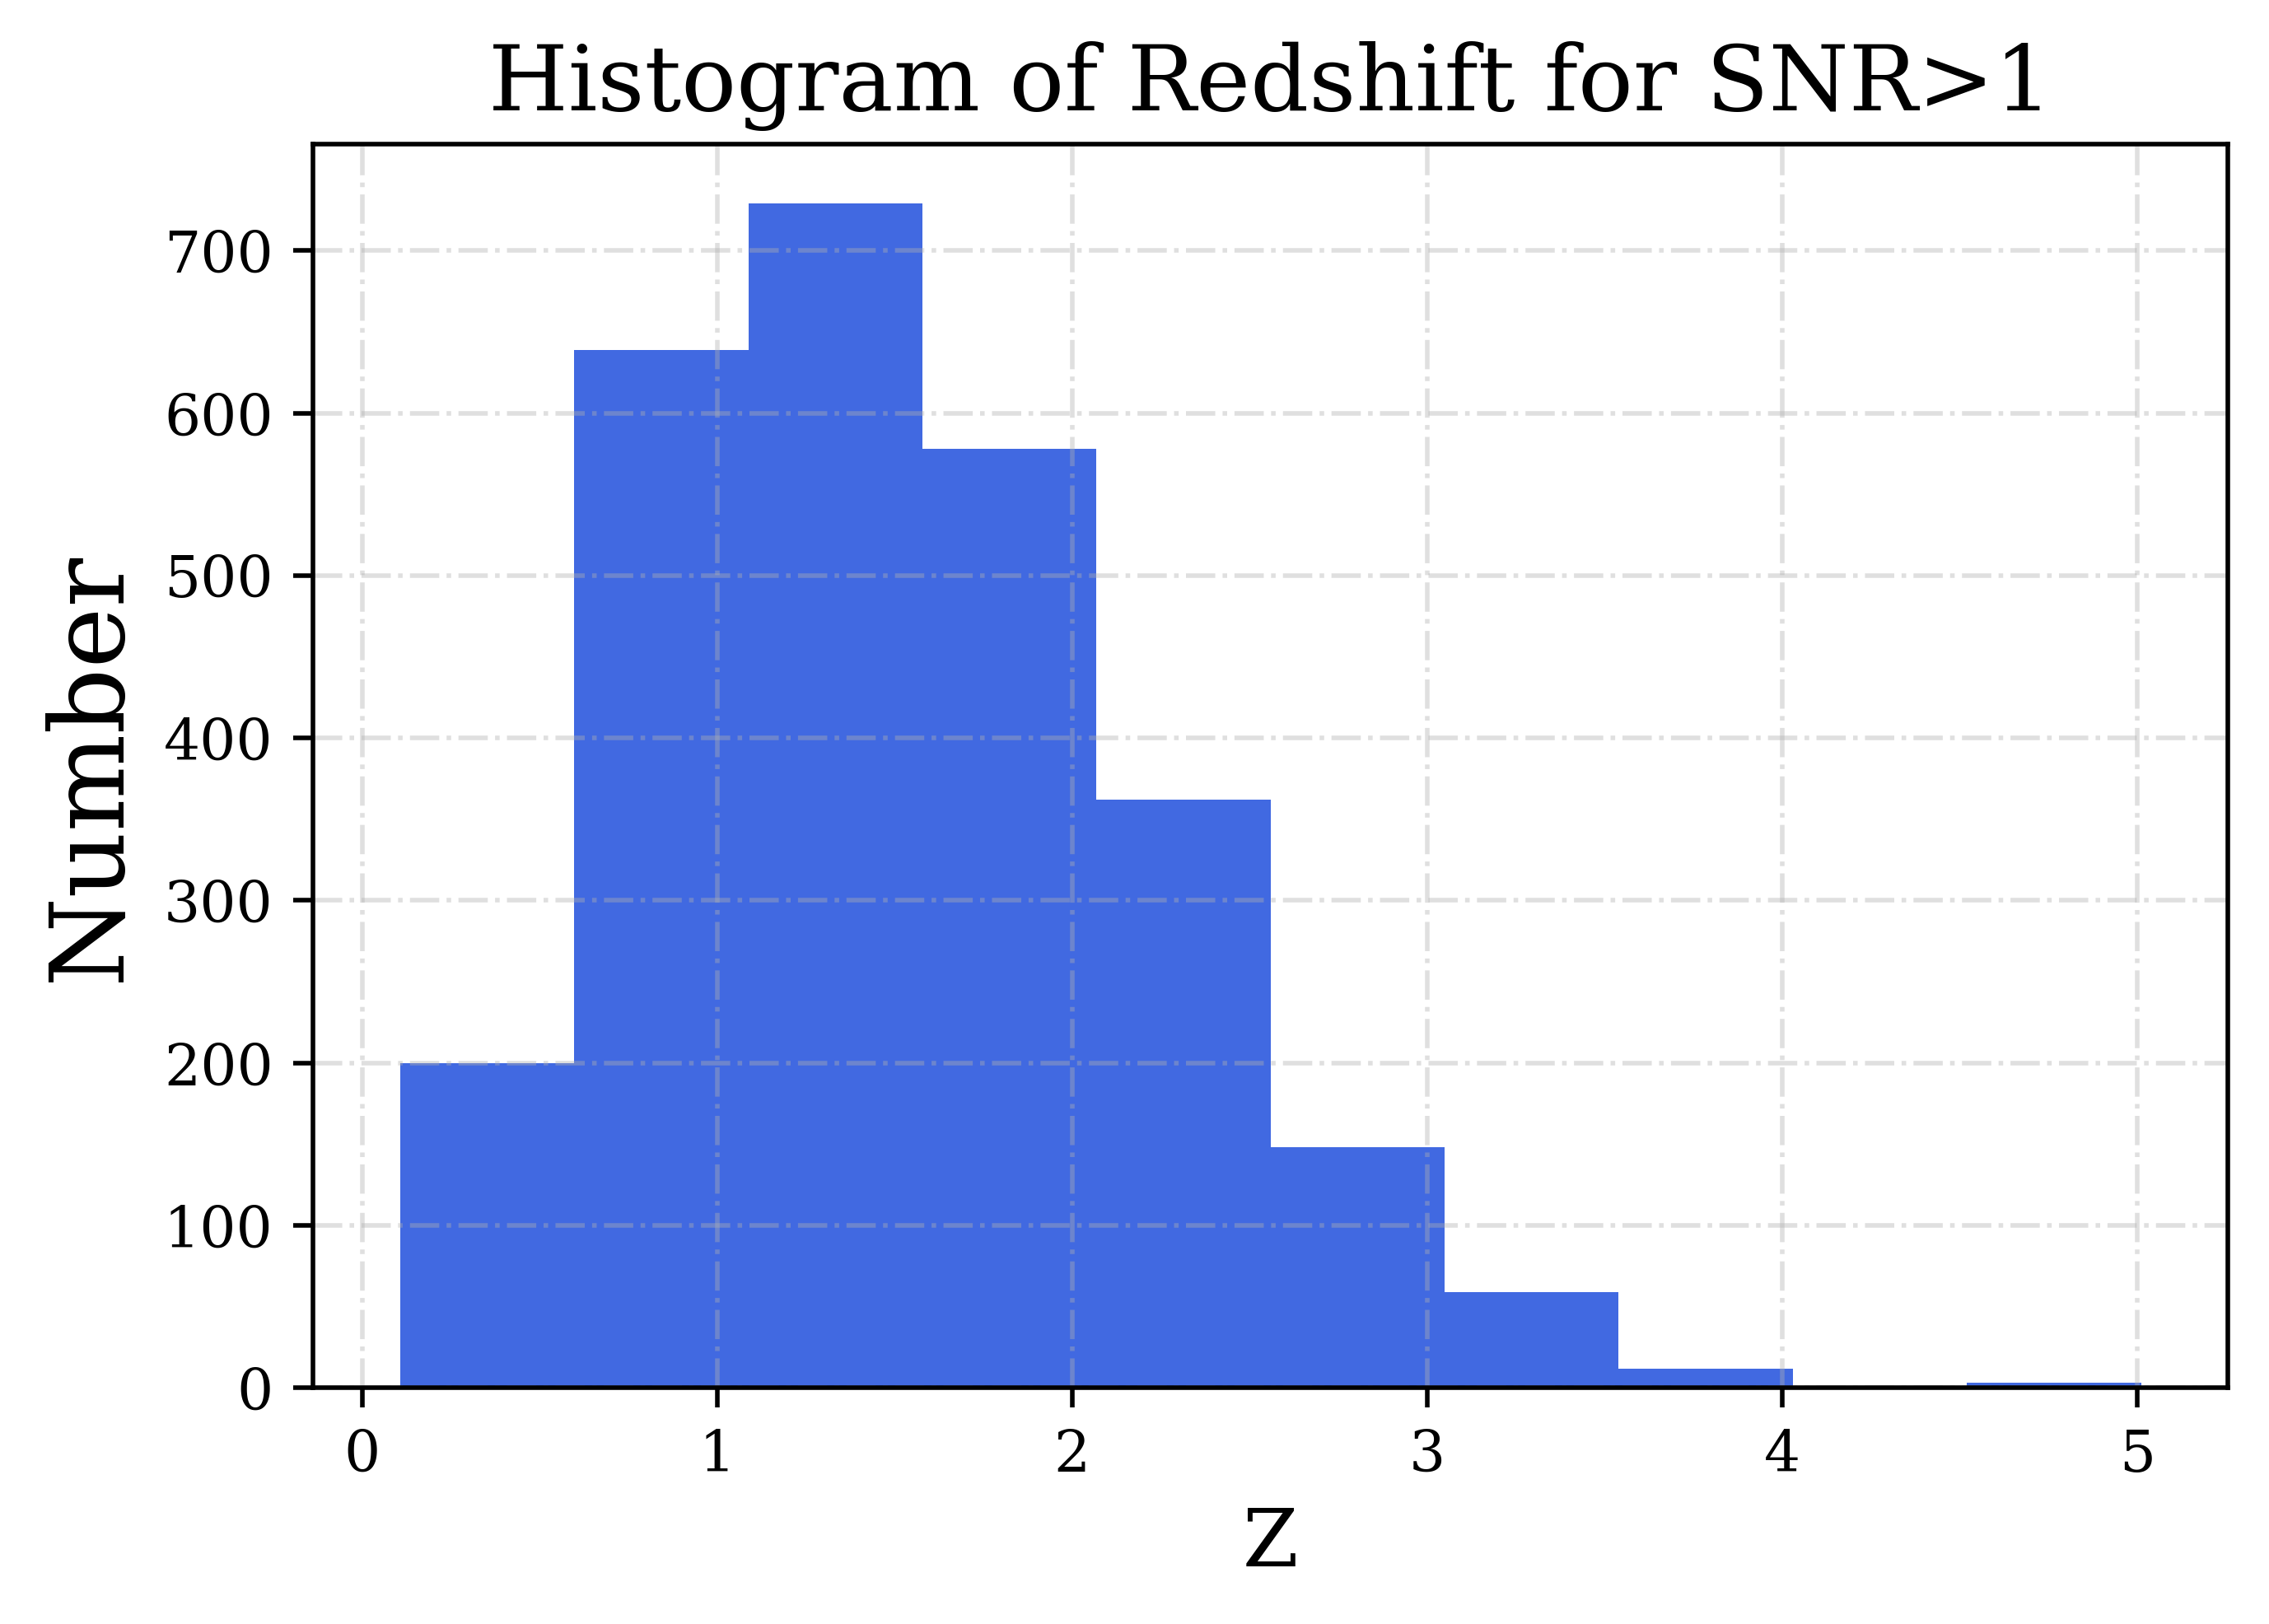

In [20]:
plt.figure()
%matplotlib inline
dpi=500   #to make the plot bigger 
mpl.rcParams['figure.dpi']= dpi
plt.rc('text', usetex=False)
plt.rc('font', family='serif')

plt.grid(True,ls='-.',alpha=.4)
plt.title(r'Histogram of Redshift for SNR>1',fontsize=16)
plt.xlabel(r'Z',fontsize=14)
plt.ylabel(r'Number',fontsize=18)

plt.hist(h_masked['Z'], color='royalblue')

plt.show()

In [21]:
mask = (table_hdu['SNR_2.0_12.0keV']>1)
h_masked = table_hdu[mask]
h_masked

<Table length=1510>
    SDSS_NAME              RA         ...   SNR_0.2_2.0keV    SNR_2.0_12.0keV  
        -                 deg         ...   erg / (cm2 s)      erg / (cm2 s)   
      str18             float64       ...      float64            float64      
------------------ ------------------ ... ------------------ ------------------
000355.49+000736.4 0.9812129735946656 ...  8.904879225640427 3.0543171942436618
000442.18+000023.3 1.1757786642904833 ...  12.23231215168503  5.033320275024848
000451.06+001154.7  1.212751793109664 ...  7.353615940390385  1.894356138609886
000456.17+000645.5 1.2340530157089231 ... 10.531390978136978  5.951256626378777
000505.45-000210.8 1.2727229595184326 ... 4.9923060466310805 2.2375812068102032
000512.11+001313.1  1.300495982170105 ...  8.947339127406302 1.7563746770454833
000512.18+000802.9 1.3007830381393433 ...  9.419148852400333  3.747671636952816
000531.06+000950.9  1.379438042640686 ...  6.502264192525451 2.8181977809107015
000531.32+000838.9 1.3805208824052446 ...  3.182464667082504 1.9906869075787237
               ...                ... ...                ...                ...
235813.75-001716.5 359.55732471949165 ...  5.878586999022779 1.9443976980453521
235815.45-000327.2 359.56439208984375 ...  8.103114520121368  2.530911674348115
235826.70-000833.9  359.6112694649288 ...  8.189602104366486 3.2989070294441634
235828.74-001038.5  359.6197665881373 ... 1.6564118932455993 1.6308587155777643
235841.58-001634.1 359.67329024366205 ... 1.9750873030647746 1.4595523221667261
235844.95-000724.0 359.68731689453125 ...  7.191104125556422 1.2230176955005463
235845.67-000459.6  359.6903076171875 ...  9.351095022624433  2.683306280069051
235848.57-001448.6 359.70241214111365 ...   3.38598950190478 1.3475319549082965
235851.32-000558.9  359.7138331275773 ... 3.4481347460819736 1.1661156790473488
235854.85-000607.8  359.7285461425781 ...  4.254473332209888 1.7970901584122092

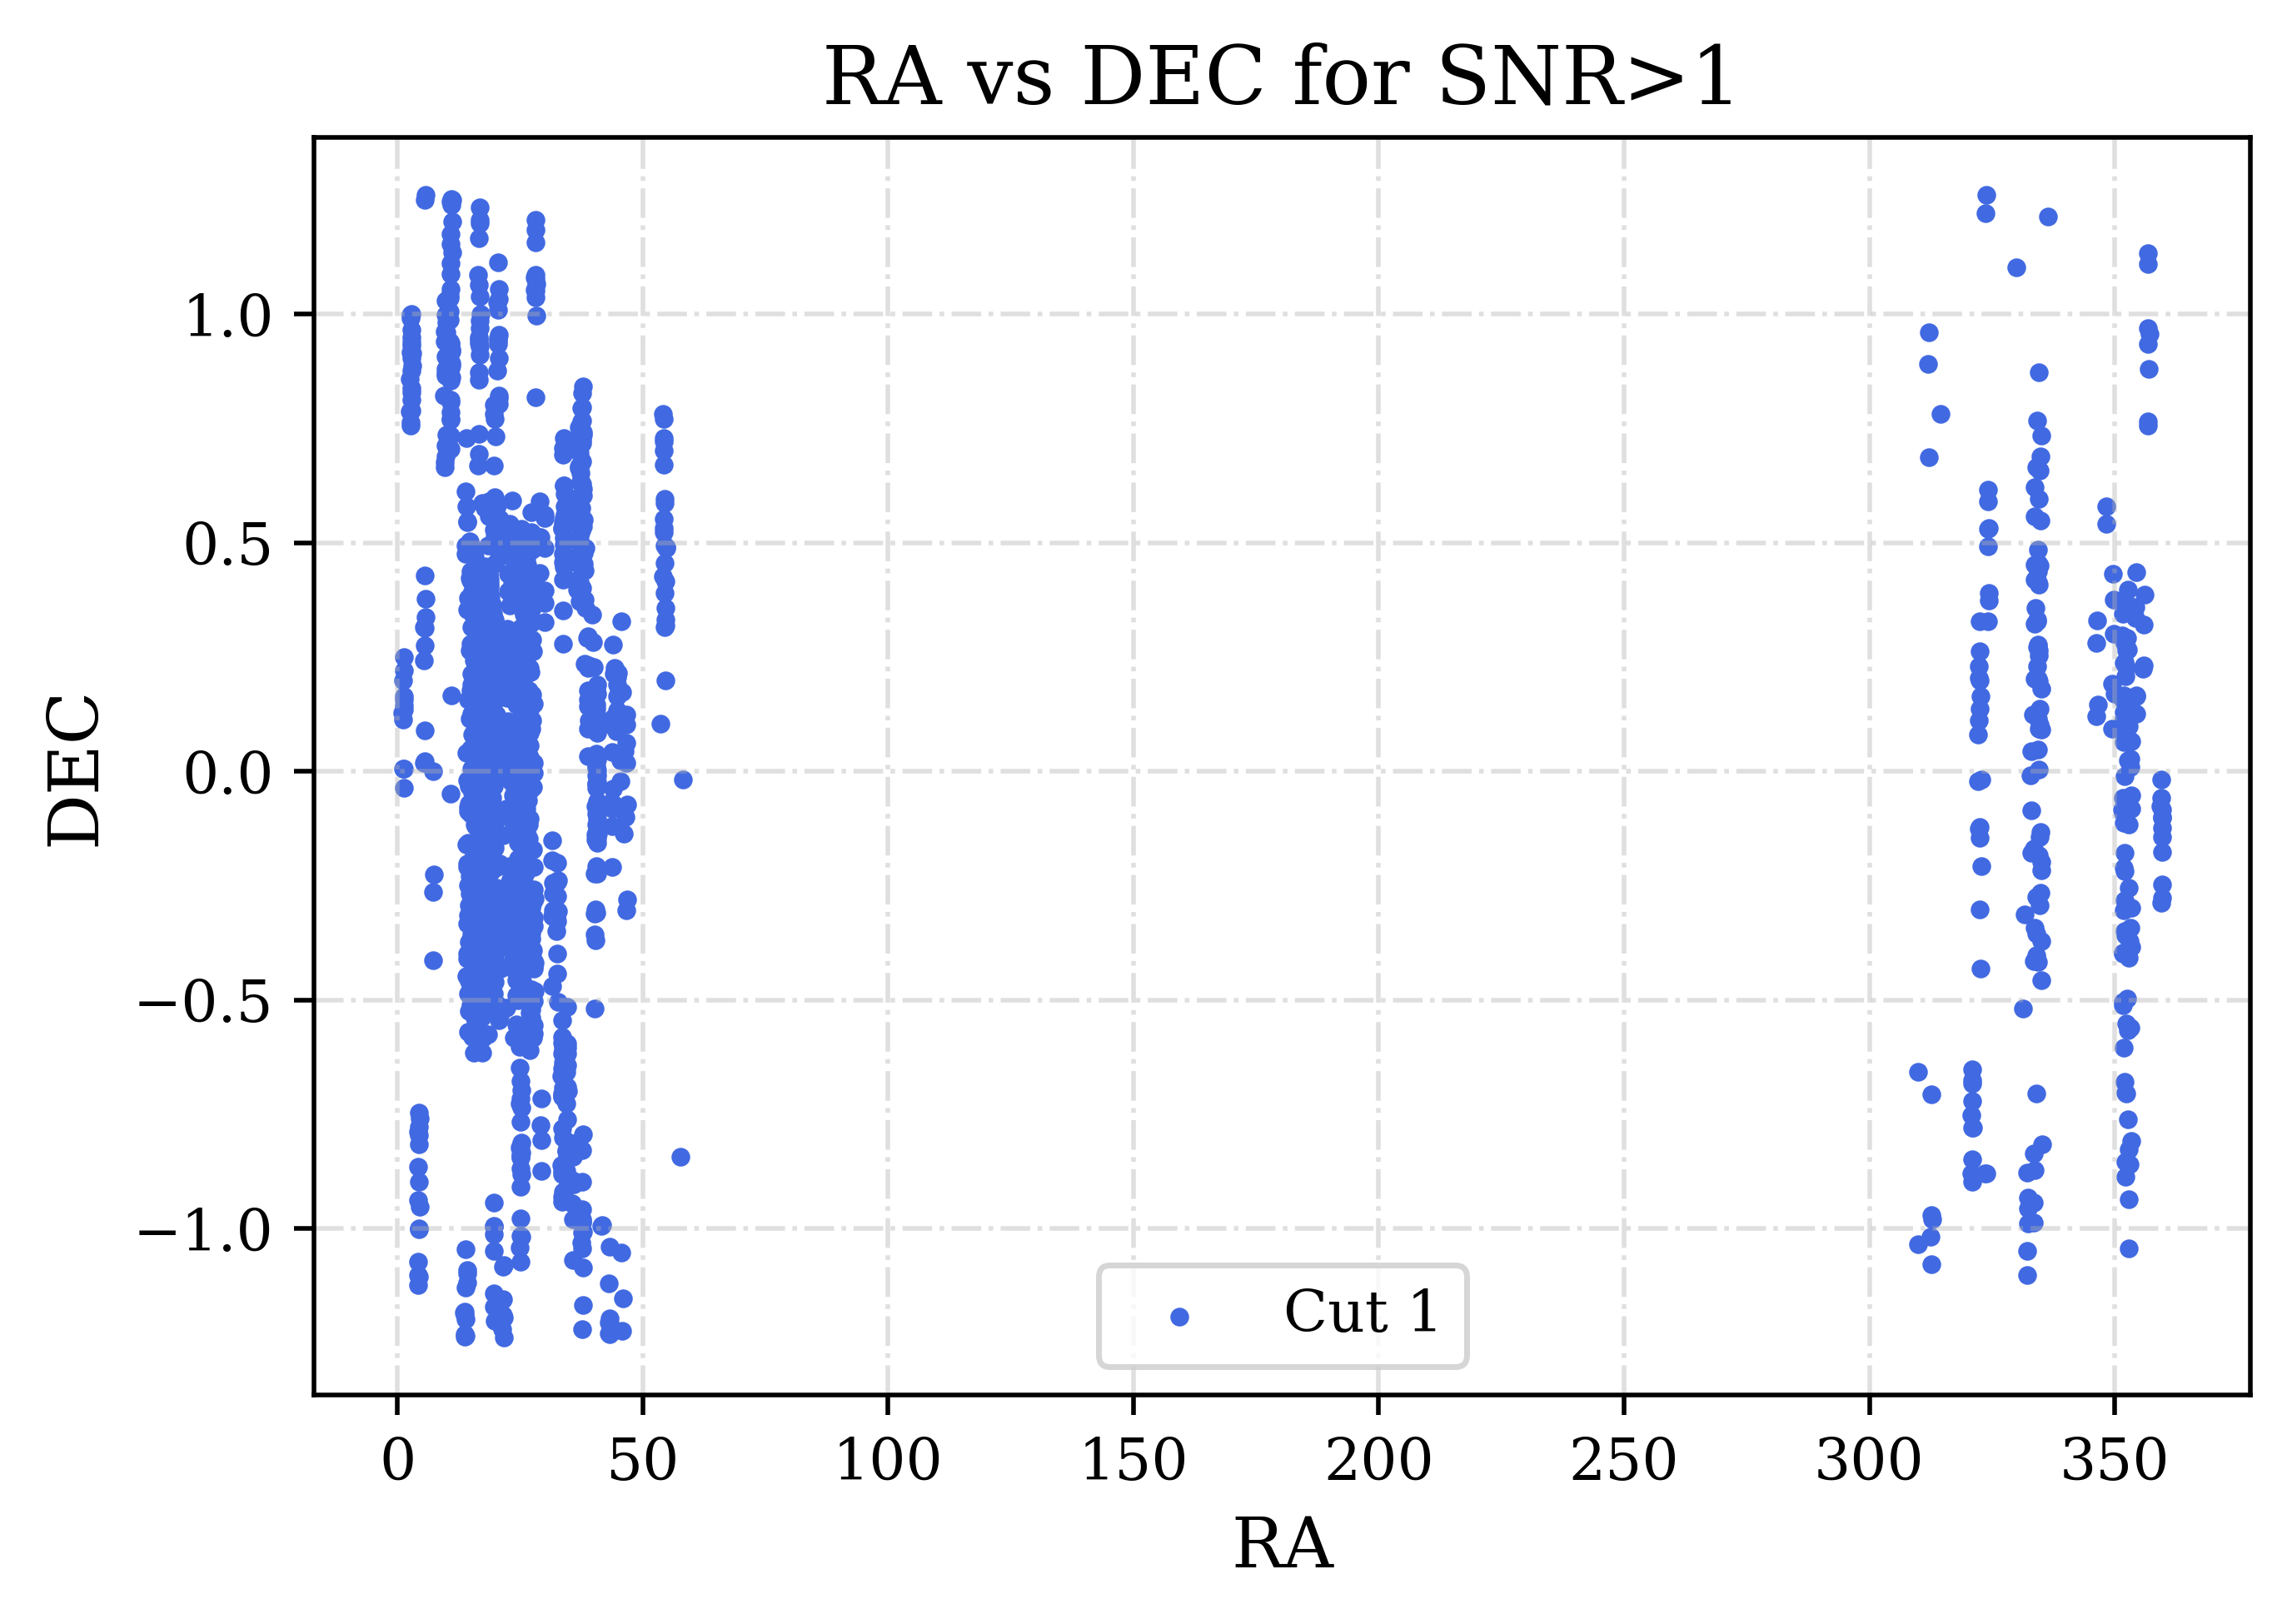

In [22]:
plt.figure()
%matplotlib inline
dpi=500   #to make the plot bigger 
mpl.rcParams['figure.dpi']= dpi
plt.rc('text', usetex=False)
plt.rc('font', family='serif')

plt.grid(True,ls='-.',alpha=.4)
plt.title(r'RA vs DEC for SNR>1',fontsize=14)
plt.xlabel(r'RA',fontsize=12)
plt.ylabel(r'DEC',fontsize=12)
plt.scatter(h_masked['RA'],h_masked['DEC'], color='royalblue', s=5, label='Cut 1')
#props = dict(boxstyle='round', facecolor='pink', alpha=0.5)
#plt.text(0.55,20 , '$H_{0}=$'+str(H_0*1e6)+'$\, km/sMpc$', bbox=props, fontsize=6)
plt.legend();
plt.show()

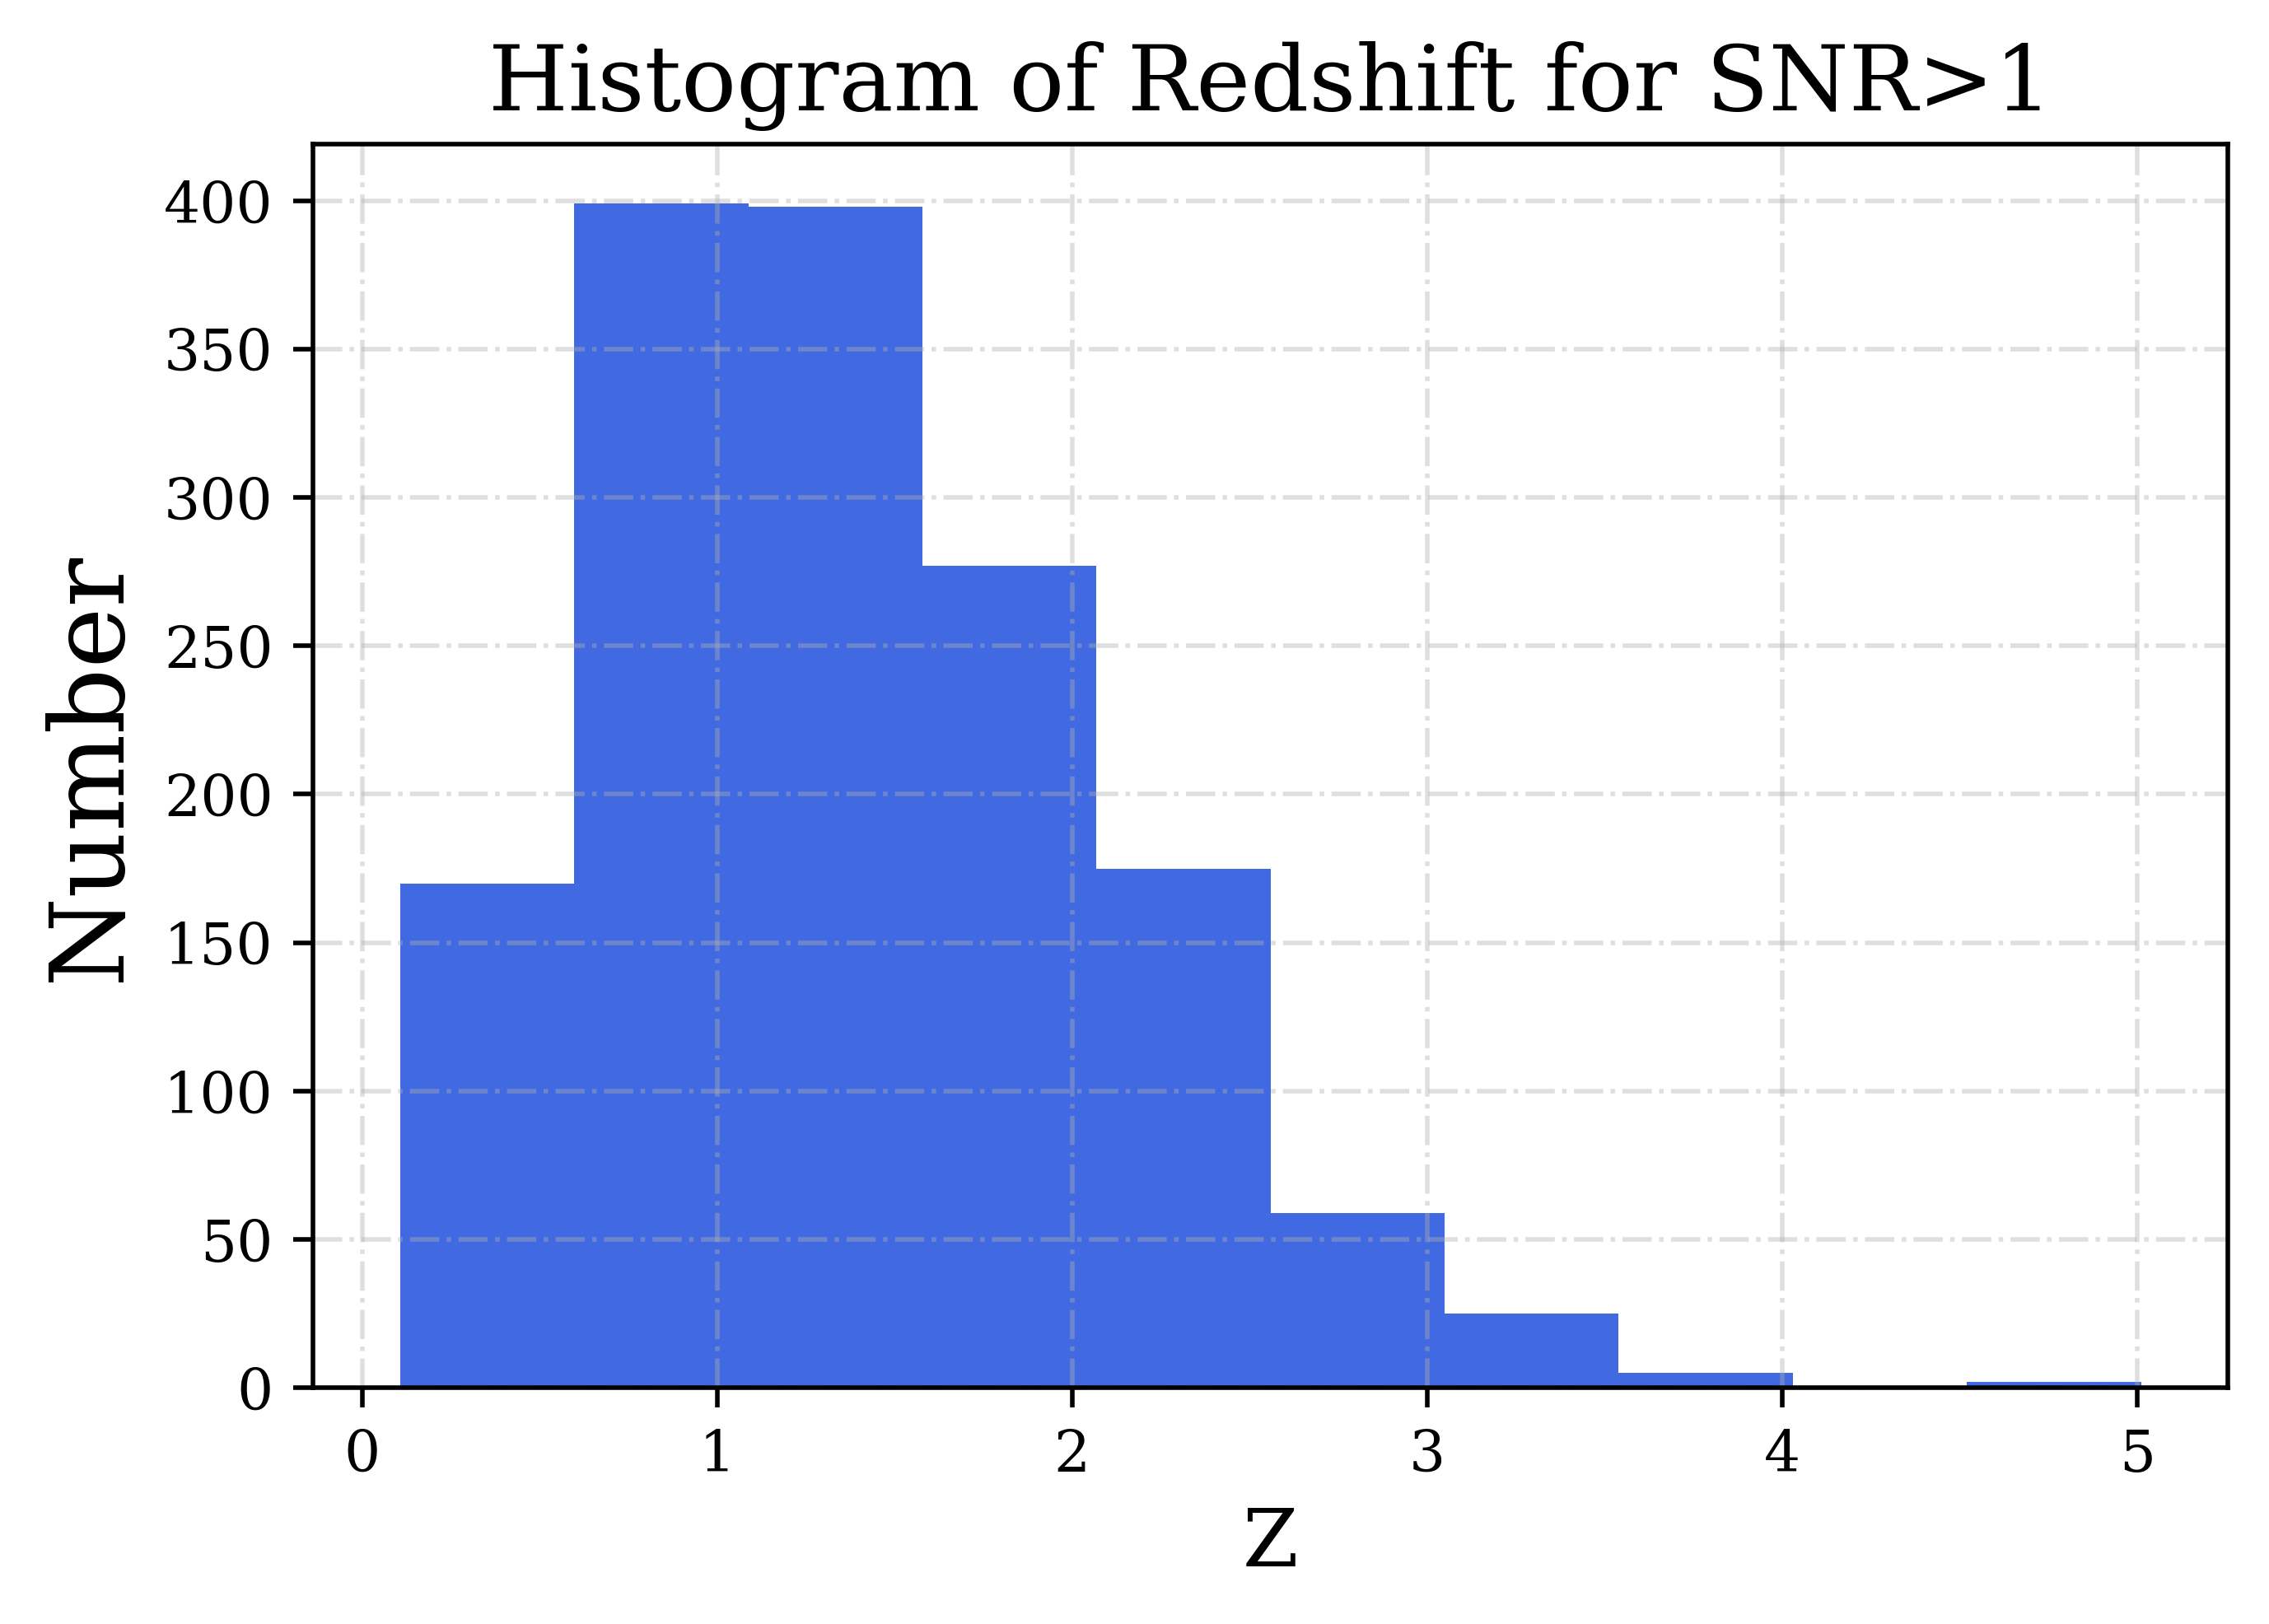

In [23]:
plt.figure()
%matplotlib inline
dpi=500   #to make the plot bigger 
mpl.rcParams['figure.dpi']= dpi
plt.rc('text', usetex=False)
plt.rc('font', family='serif')

plt.grid(True,ls='-.',alpha=.4)
plt.title(r'Histogram of Redshift for SNR>1',fontsize=16)
plt.xlabel(r'Z',fontsize=14)
plt.ylabel(r'Number',fontsize=18)

plt.hist(h_masked['Z'], color='royalblue')

plt.show()

#### Cut 2: SNR>2

In [24]:
mask = (h.data['FIRST_SNR']>2 )
h_masked2 = table_hdu[mask]

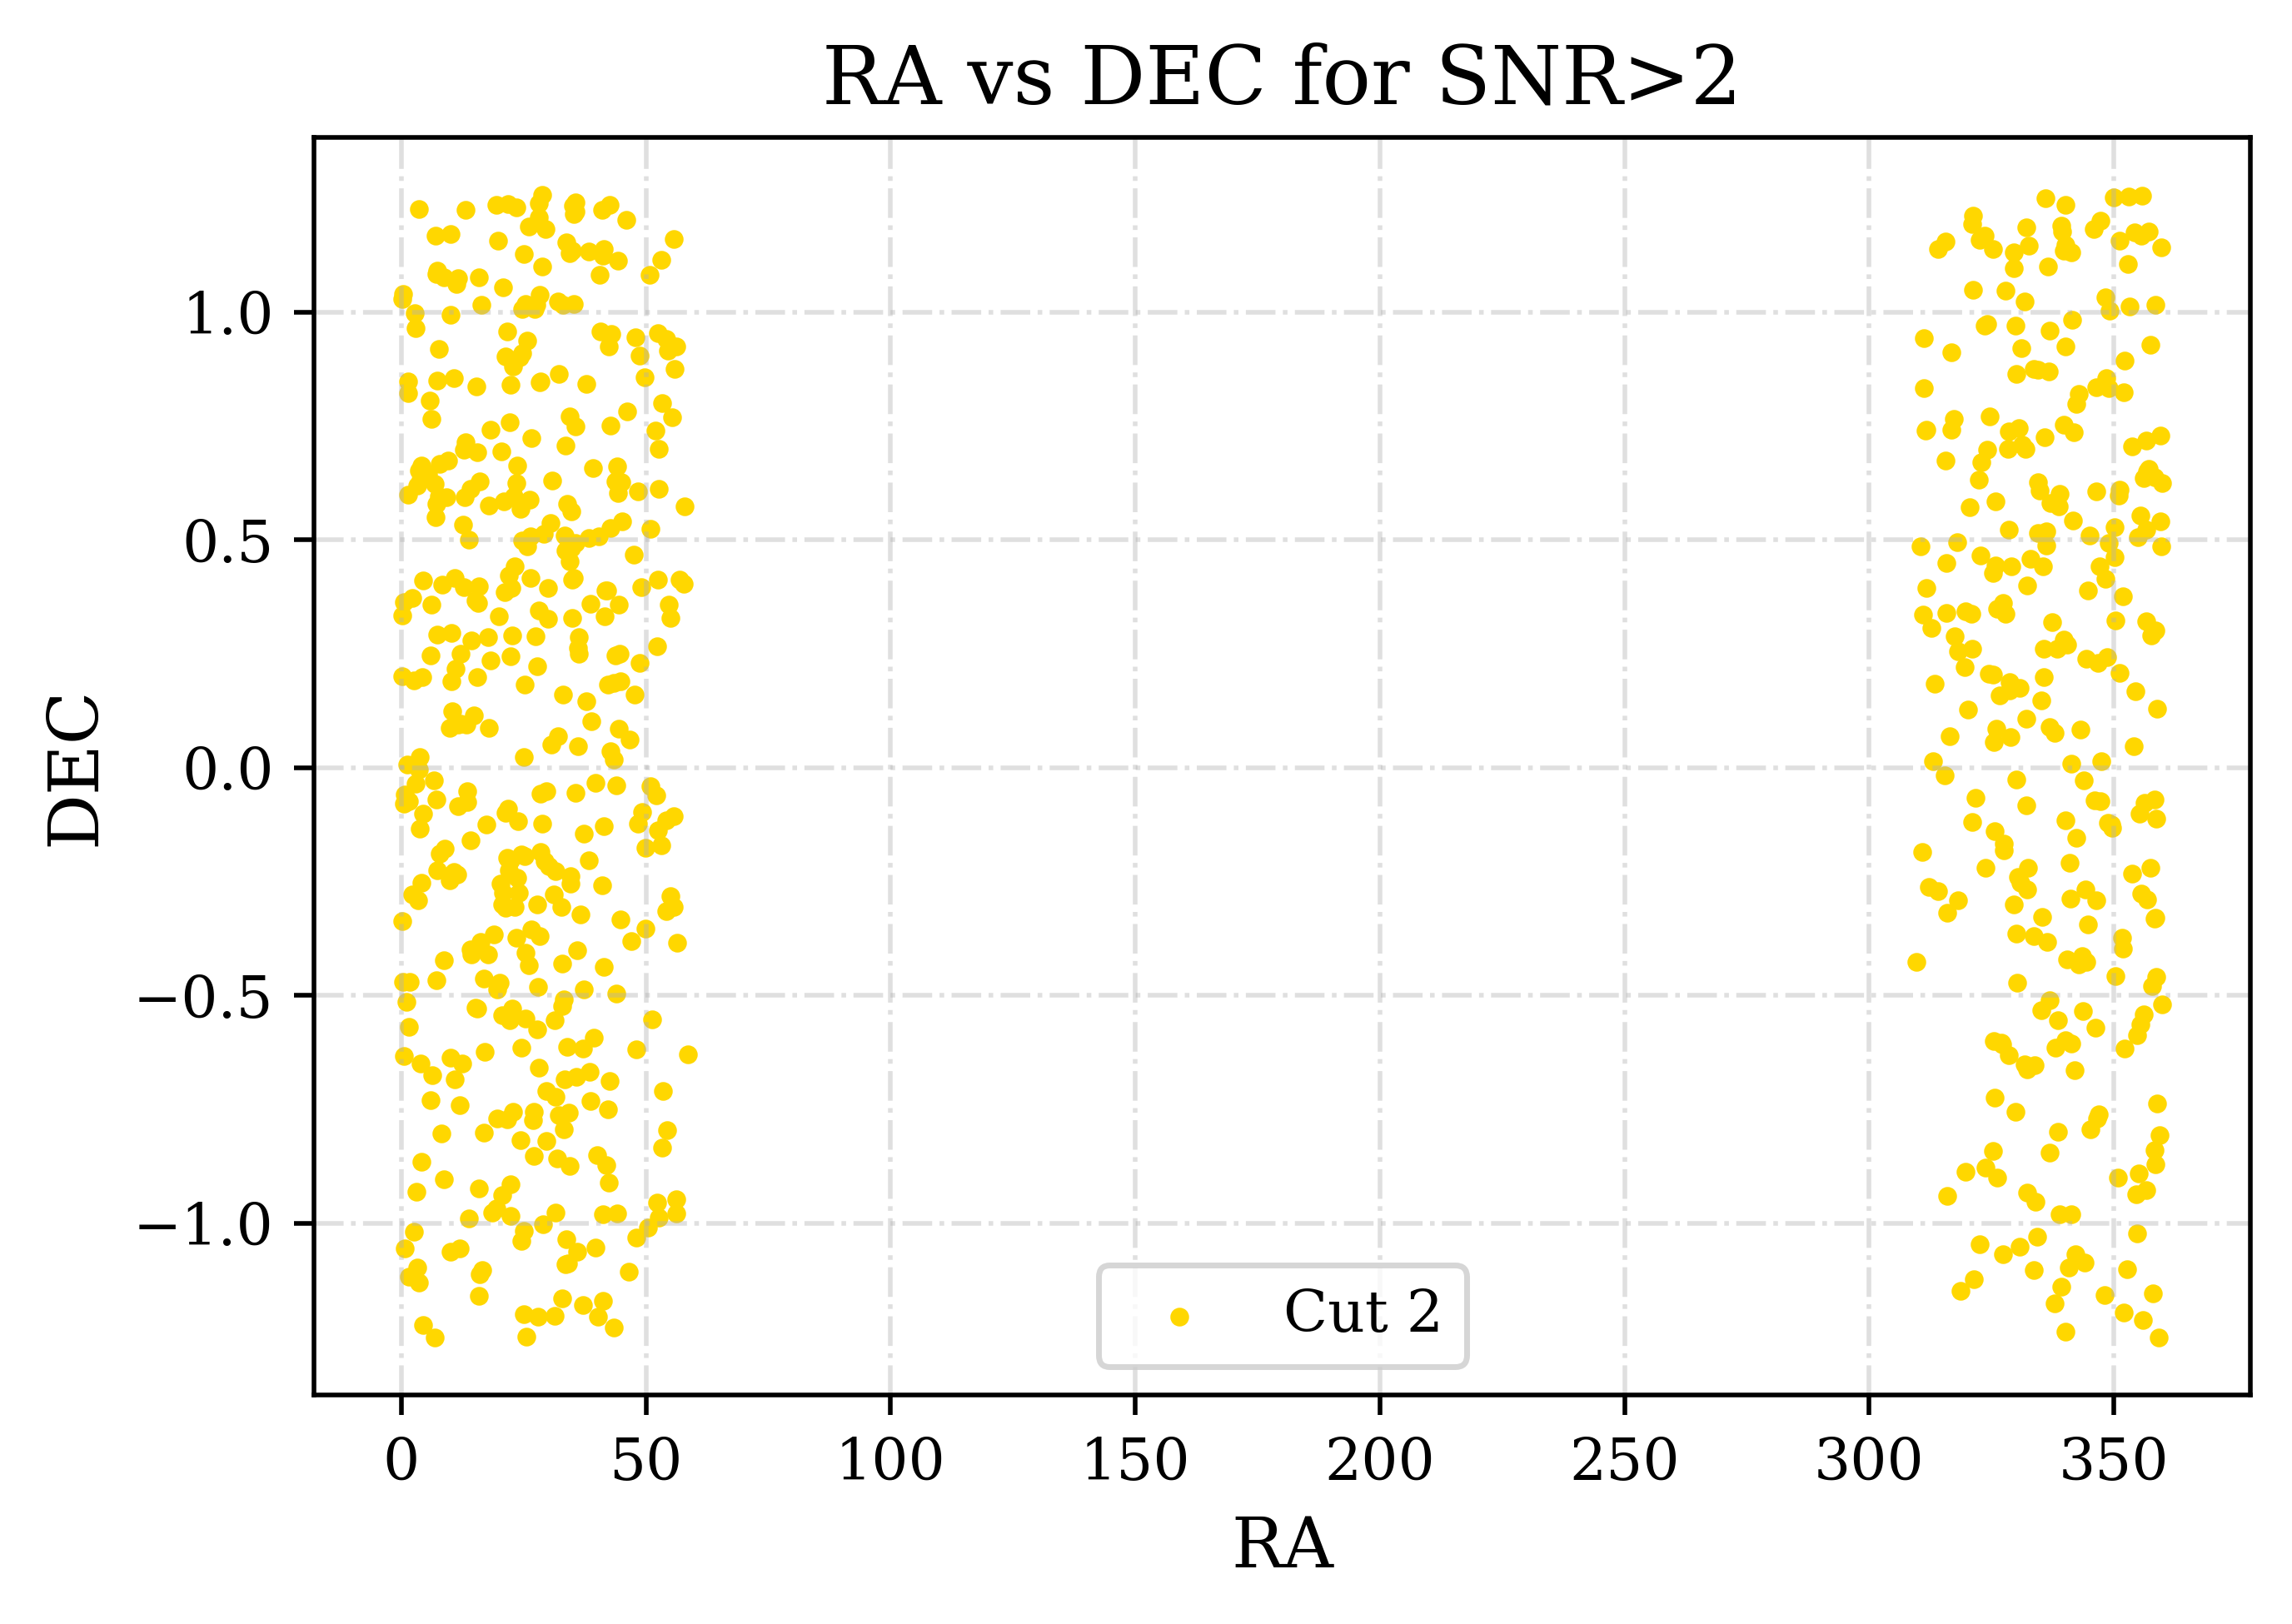

In [25]:
plt.figure()
%matplotlib inline
dpi=500   #to make the plot bigger 
mpl.rcParams['figure.dpi']= dpi
plt.rc('text', usetex=False)
plt.rc('font', family='serif')

plt.grid(True,ls='-.',alpha=.4)
plt.title(r'RA vs DEC for SNR>2',fontsize=14)
plt.xlabel(r'RA',fontsize=12)
plt.ylabel(r'DEC',fontsize=12)
plt.scatter(h_masked2['RA'],h_masked2['DEC'], color='gold', s=5, label='Cut 2')
#props = dict(boxstyle='round', facecolor='pink', alpha=0.5)
#plt.text(0.55,20 , '$H_{0}=$'+str(H_0*1e6)+'$\, km/sMpc$', bbox=props, fontsize=6)
plt.legend();
plt.show()

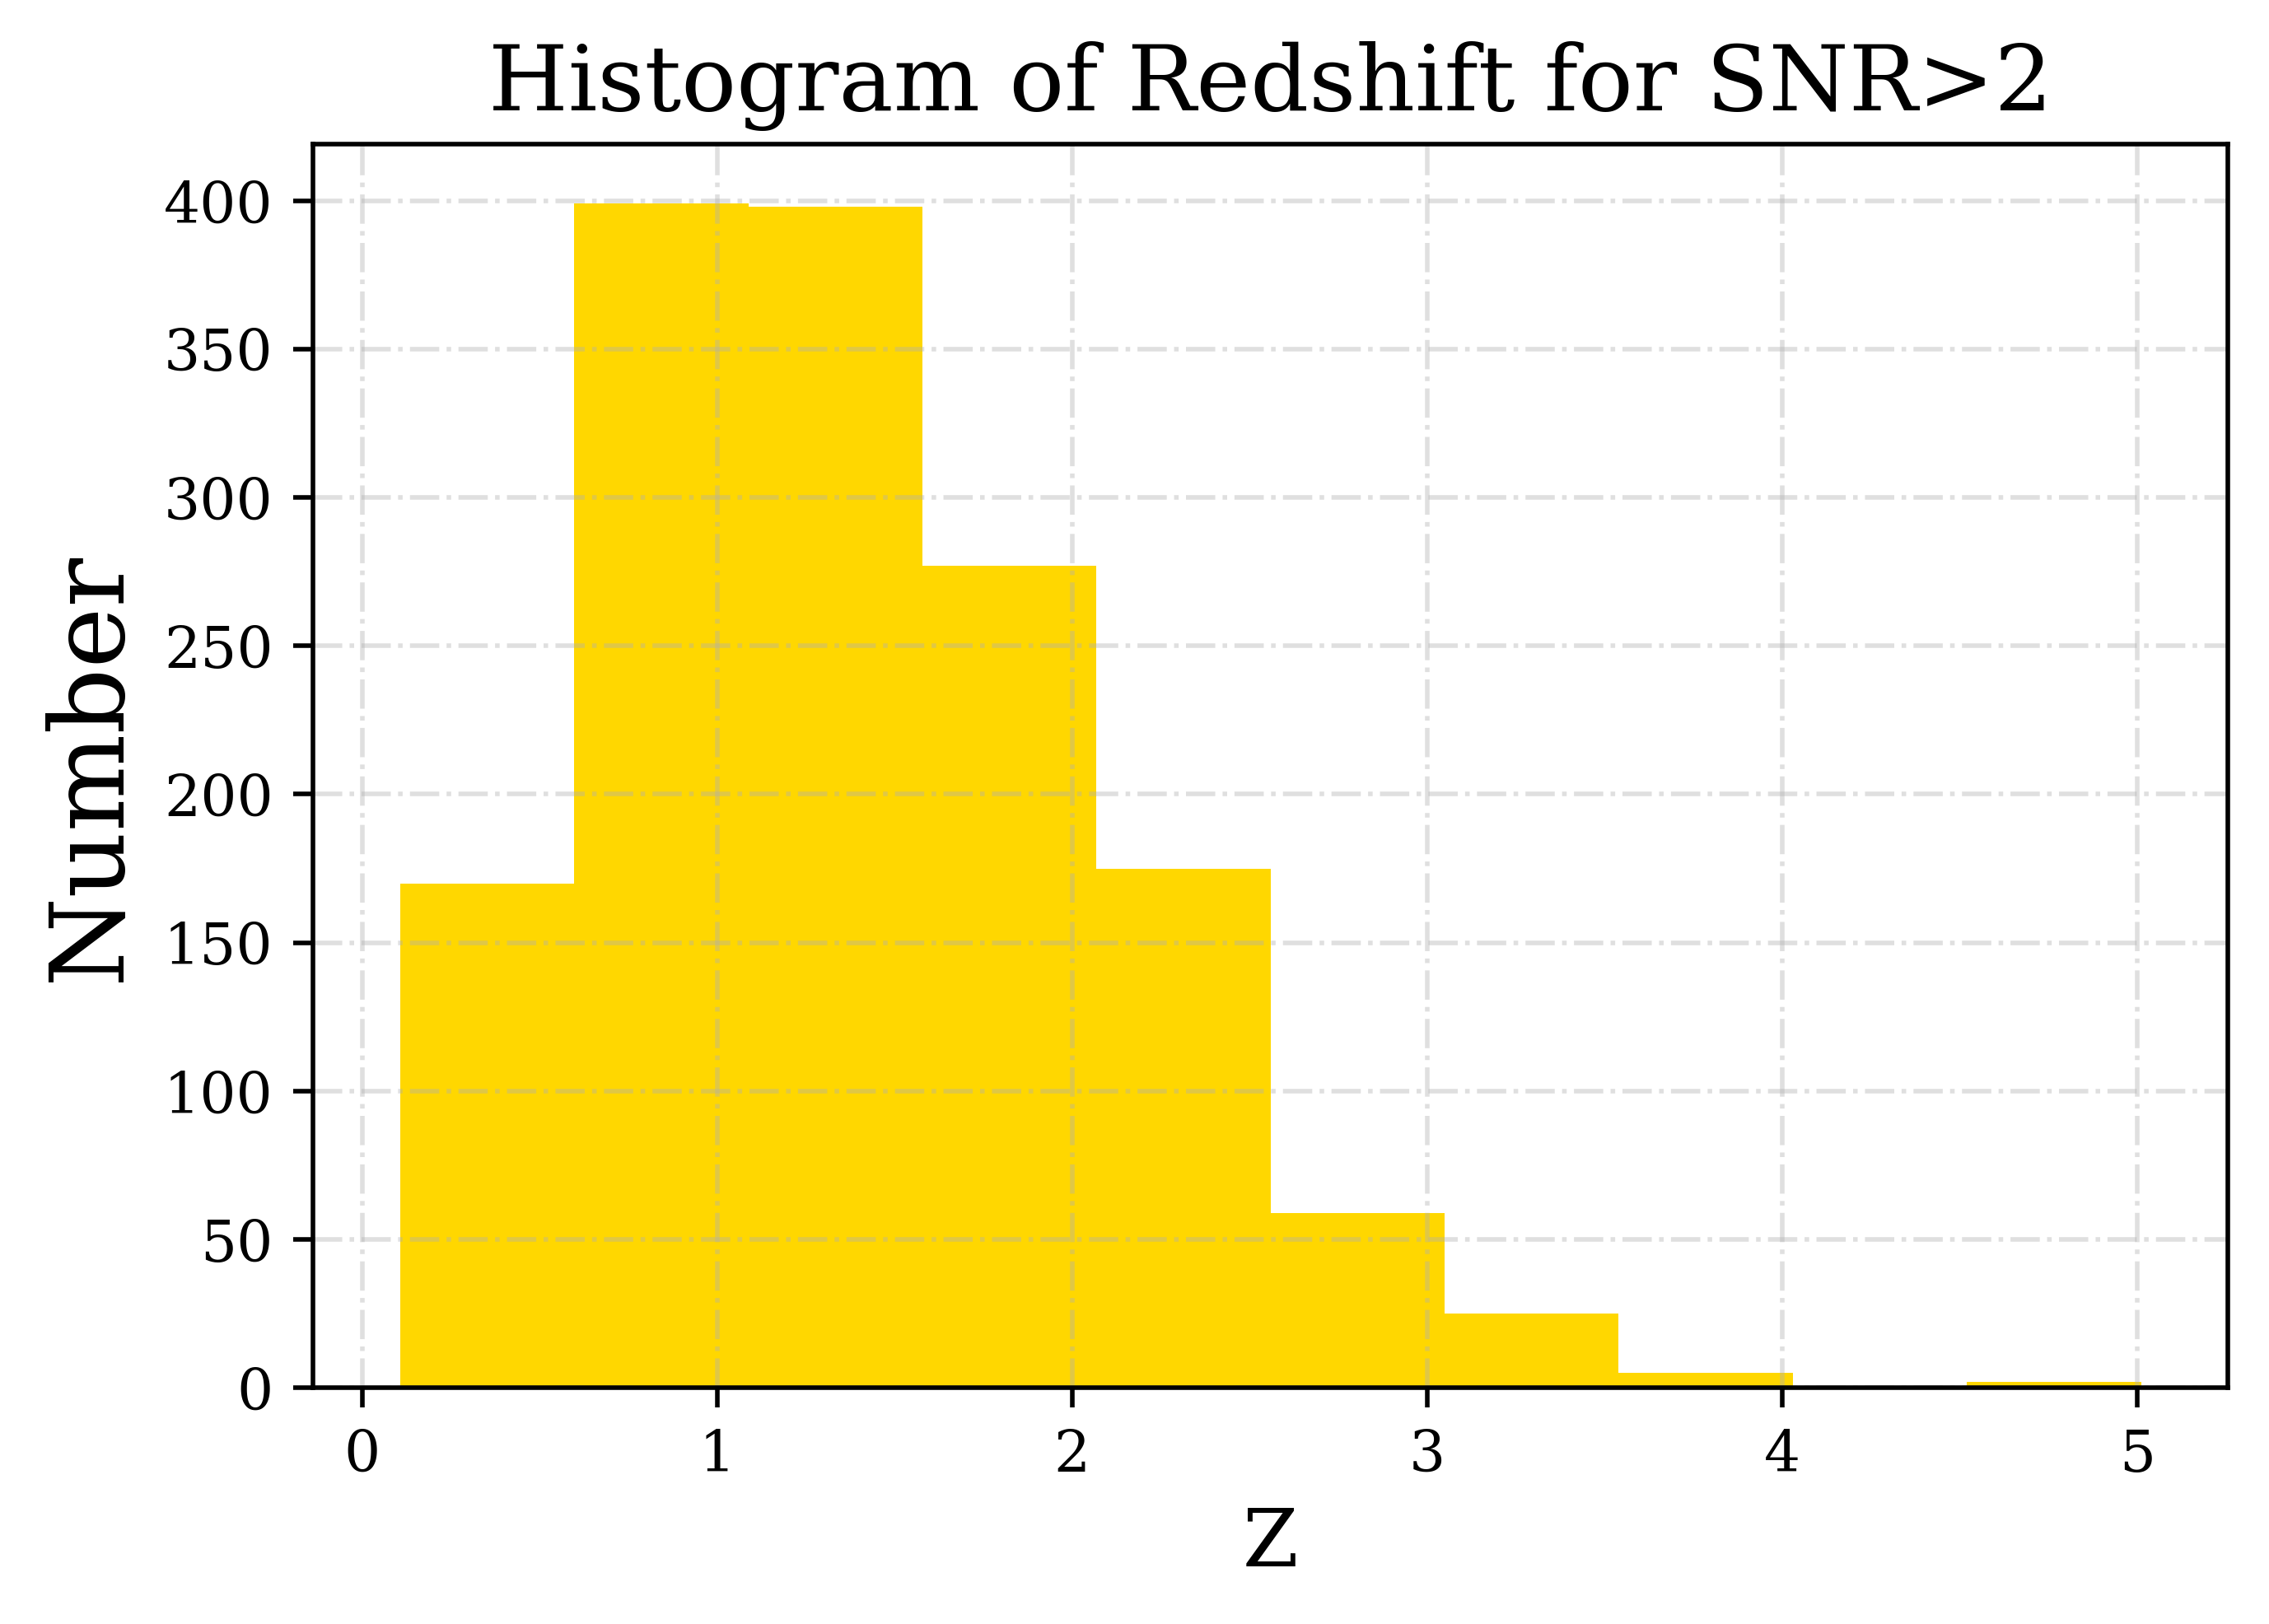

In [26]:
plt.figure()
%matplotlib inline
dpi=500   #to make the plot bigger 
mpl.rcParams['figure.dpi']= dpi
plt.rc('text', usetex=False)
plt.rc('font', family='serif')

plt.grid(True,ls='-.',alpha=.4)
plt.title(r'Histogram of Redshift for SNR>2',fontsize=16)
plt.xlabel(r'Z',fontsize=14)
plt.ylabel(r'Number',fontsize=18)

plt.hist(h_masked['Z'], color='gold')

plt.show()

In [27]:
mask = (table_hdu['SNR_0.2_2.0keV']>2)
h_masked2 = table_hdu[mask]
h_masked2

<Table length=2260>
    SDSS_NAME              RA         ...   SNR_0.2_2.0keV     SNR_2.0_12.0keV  
        -                 deg         ...   erg / (cm2 s)       erg / (cm2 s)   
      str18             float64       ...      float64             float64      
------------------ ------------------ ... ------------------ -------------------
000355.23+001216.4 0.9801463979920708 ...   3.68784975729549 0.12442492518238175
000355.49+000736.4 0.9812129735946656 ...  8.904879225640427  3.0543171942436618
000416.67-000431.8 1.0694807557699733 ... 2.2504531386530933 0.20188402758336327
000416.78+001441.4 1.0699168185957433 ... 2.5792632571334666   0.640893916977348
000431.01+000332.2 1.1292113505230557 ...   3.49042868731698  0.2025745344889727
000439.97-000146.4 1.1665589809417725 ... 2.5826047651498785  0.3608534624587399
000442.18+000023.3 1.1757786642904833 ...  12.23231215168503   5.033320275024848
000448.01-000108.7 1.2000593000000208 ...  3.255038407784368  0.8763638248894489
000451.06+001154.7  1.212751793109664 ...  7.353615940390385   1.894356138609886
               ...                ... ...                ...                 ...
235815.45-000327.2 359.56439208984375 ...  8.103114520121368   2.530911674348115
235817.39-001600.3  359.5724721733036 ... 2.6755621483671446  0.8487991745794606
235826.70-000833.9  359.6112694649288 ...  8.189602104366486  3.2989070294441634
235844.95-000724.0 359.68731689453125 ...  7.191104125556422  1.2230176955005463
235845.67-000459.6  359.6903076171875 ...  9.351095022624433   2.683306280069051
235846.23-001133.5 359.69263614581735 ...    3.1695065329789  0.9761778397254826
235848.57-001448.6 359.70241214111365 ...   3.38598950190478  1.3475319549082965
235851.32-000558.9  359.7138331275773 ... 3.4481347460819736  1.1661156790473488
235854.85-000607.8  359.7285461425781 ...  4.254473332209888  1.7970901584122092
235913.51-000705.4  359.8063039150483 ...  3.422918705405697  0.9908580691756426

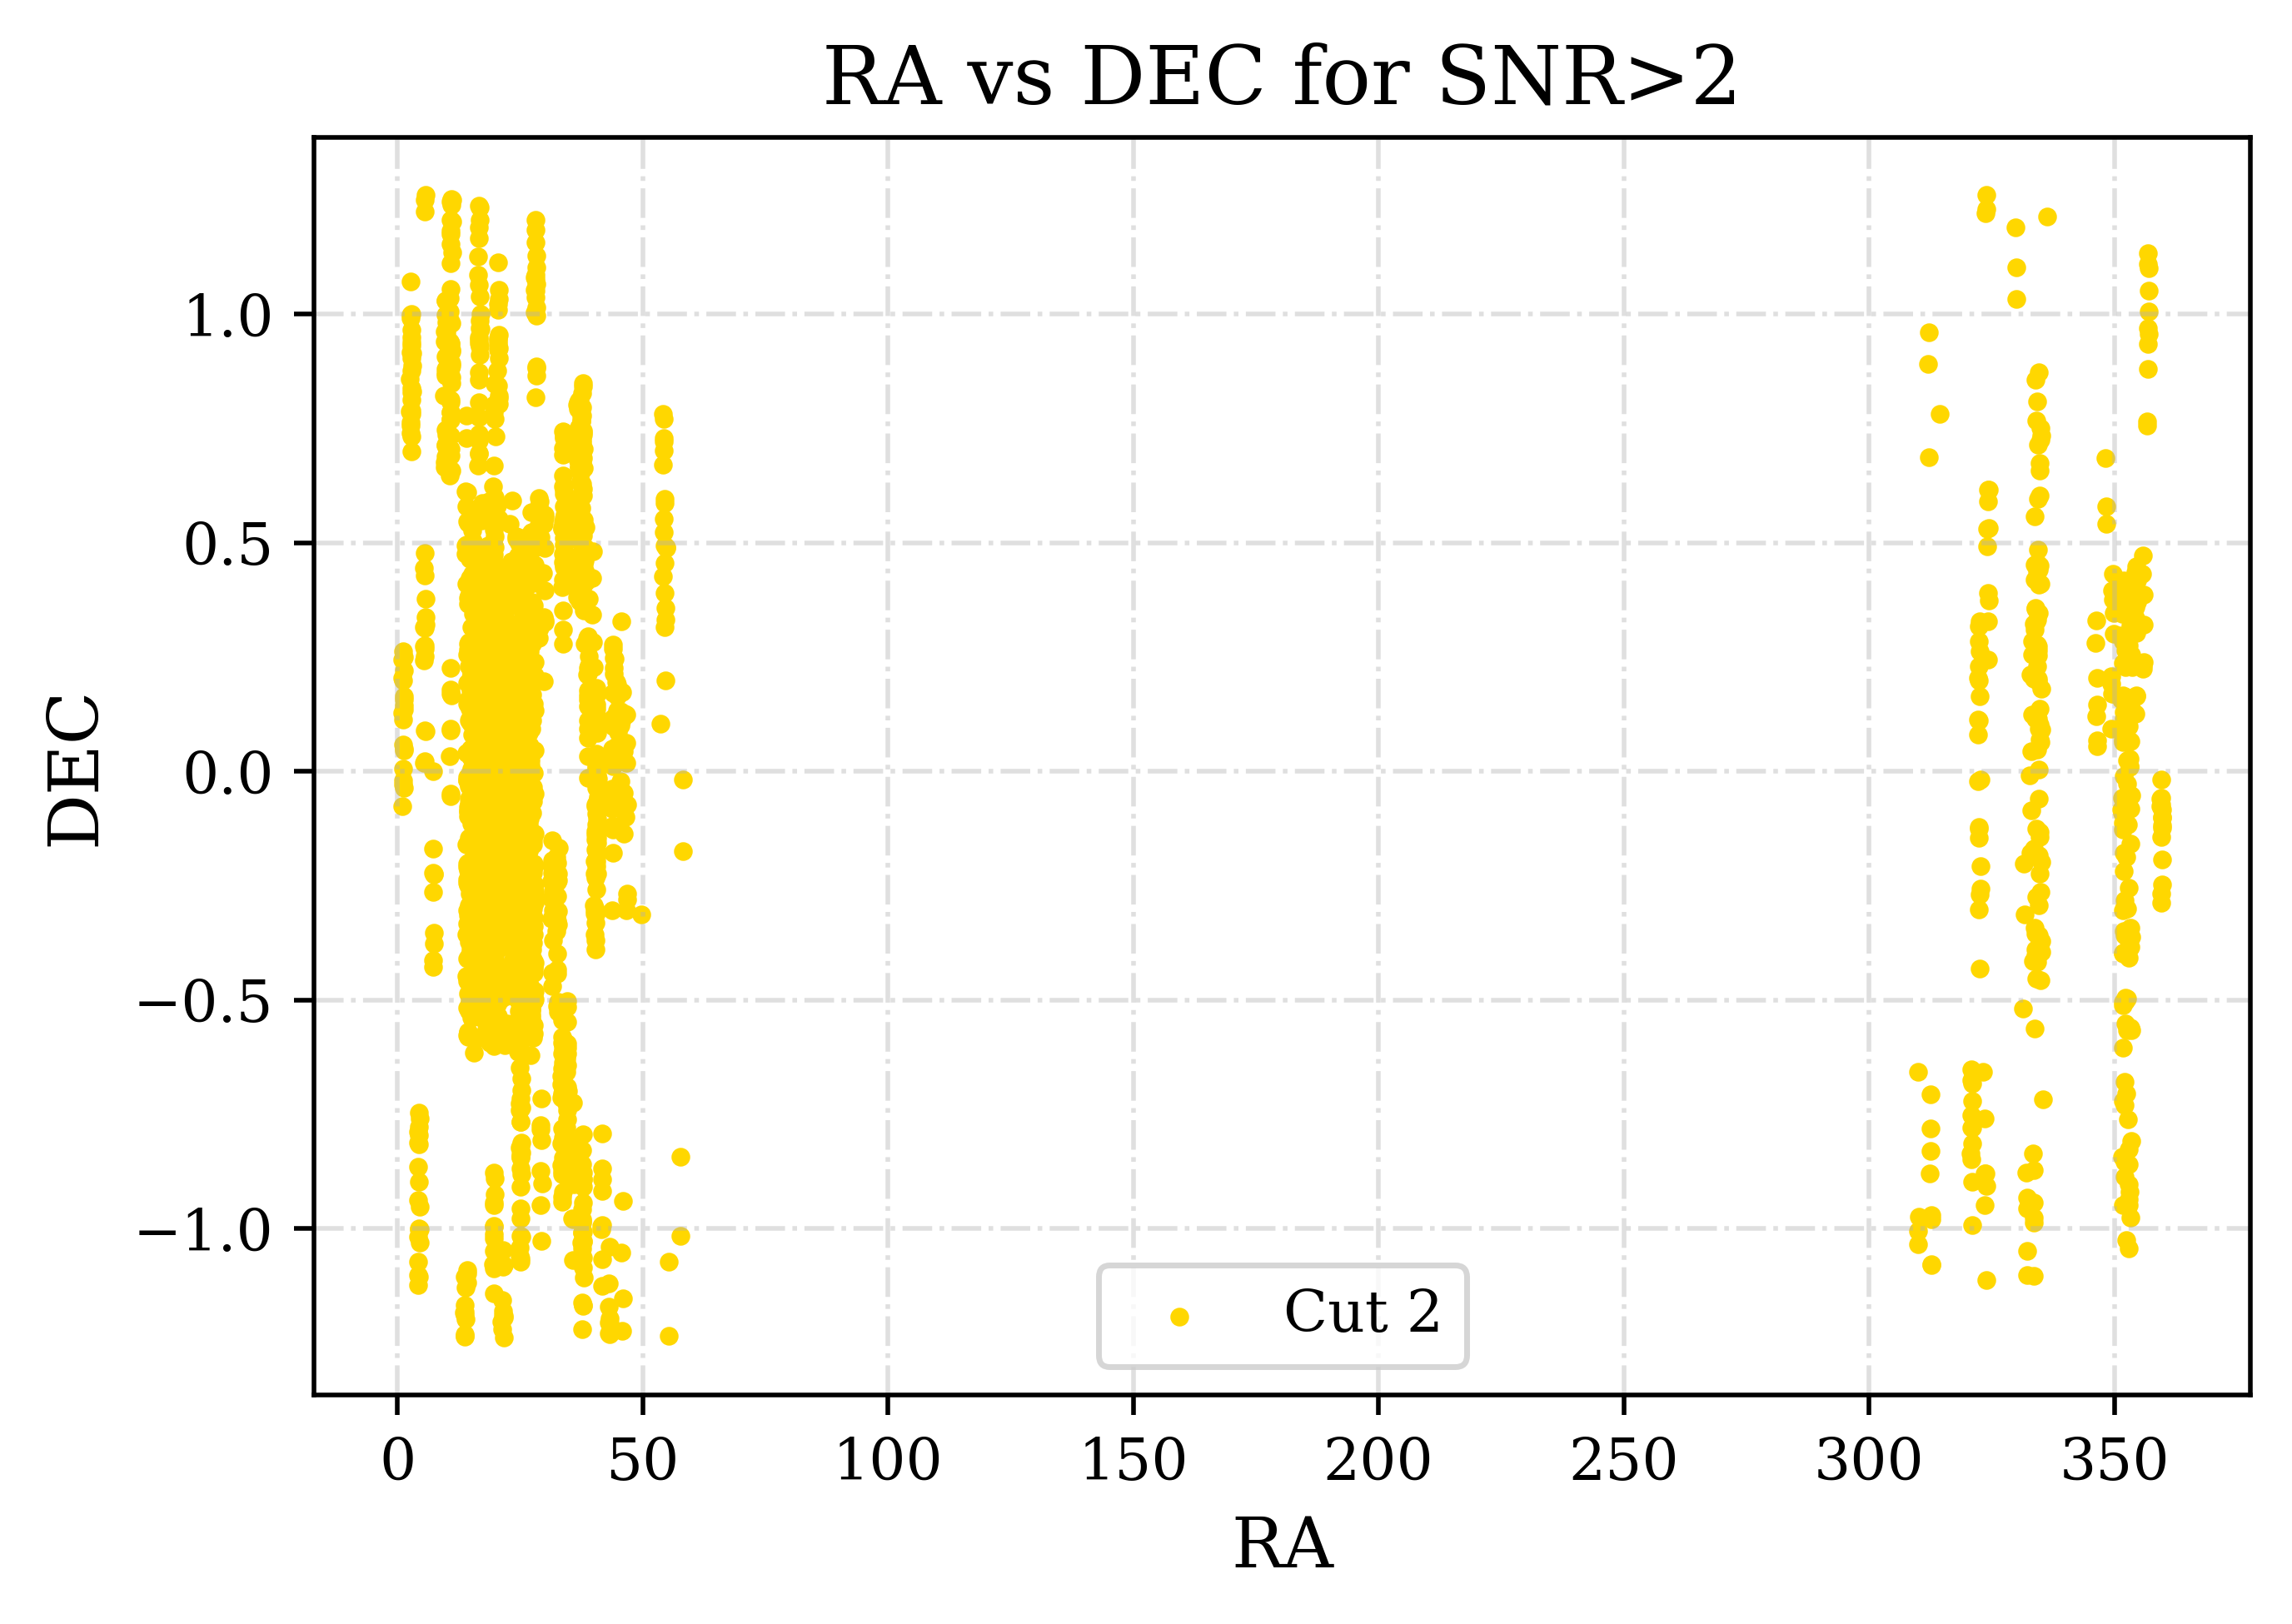

In [28]:
plt.figure()
%matplotlib inline
dpi=500   #to make the plot bigger 
mpl.rcParams['figure.dpi']= dpi
plt.rc('text', usetex=False)
plt.rc('font', family='serif')

plt.grid(True,ls='-.',alpha=.4)
plt.title(r'RA vs DEC for SNR>2',fontsize=14)
plt.xlabel(r'RA',fontsize=12)
plt.ylabel(r'DEC',fontsize=12)
plt.scatter(h_masked2['RA'],h_masked2['DEC'], color='gold', s=5, label='Cut 2')
#props = dict(boxstyle='round', facecolor='pink', alpha=0.5)
#plt.text(0.55,20 , '$H_{0}=$'+str(H_0*1e6)+'$\, km/sMpc$', bbox=props, fontsize=6)
plt.legend();
plt.show()

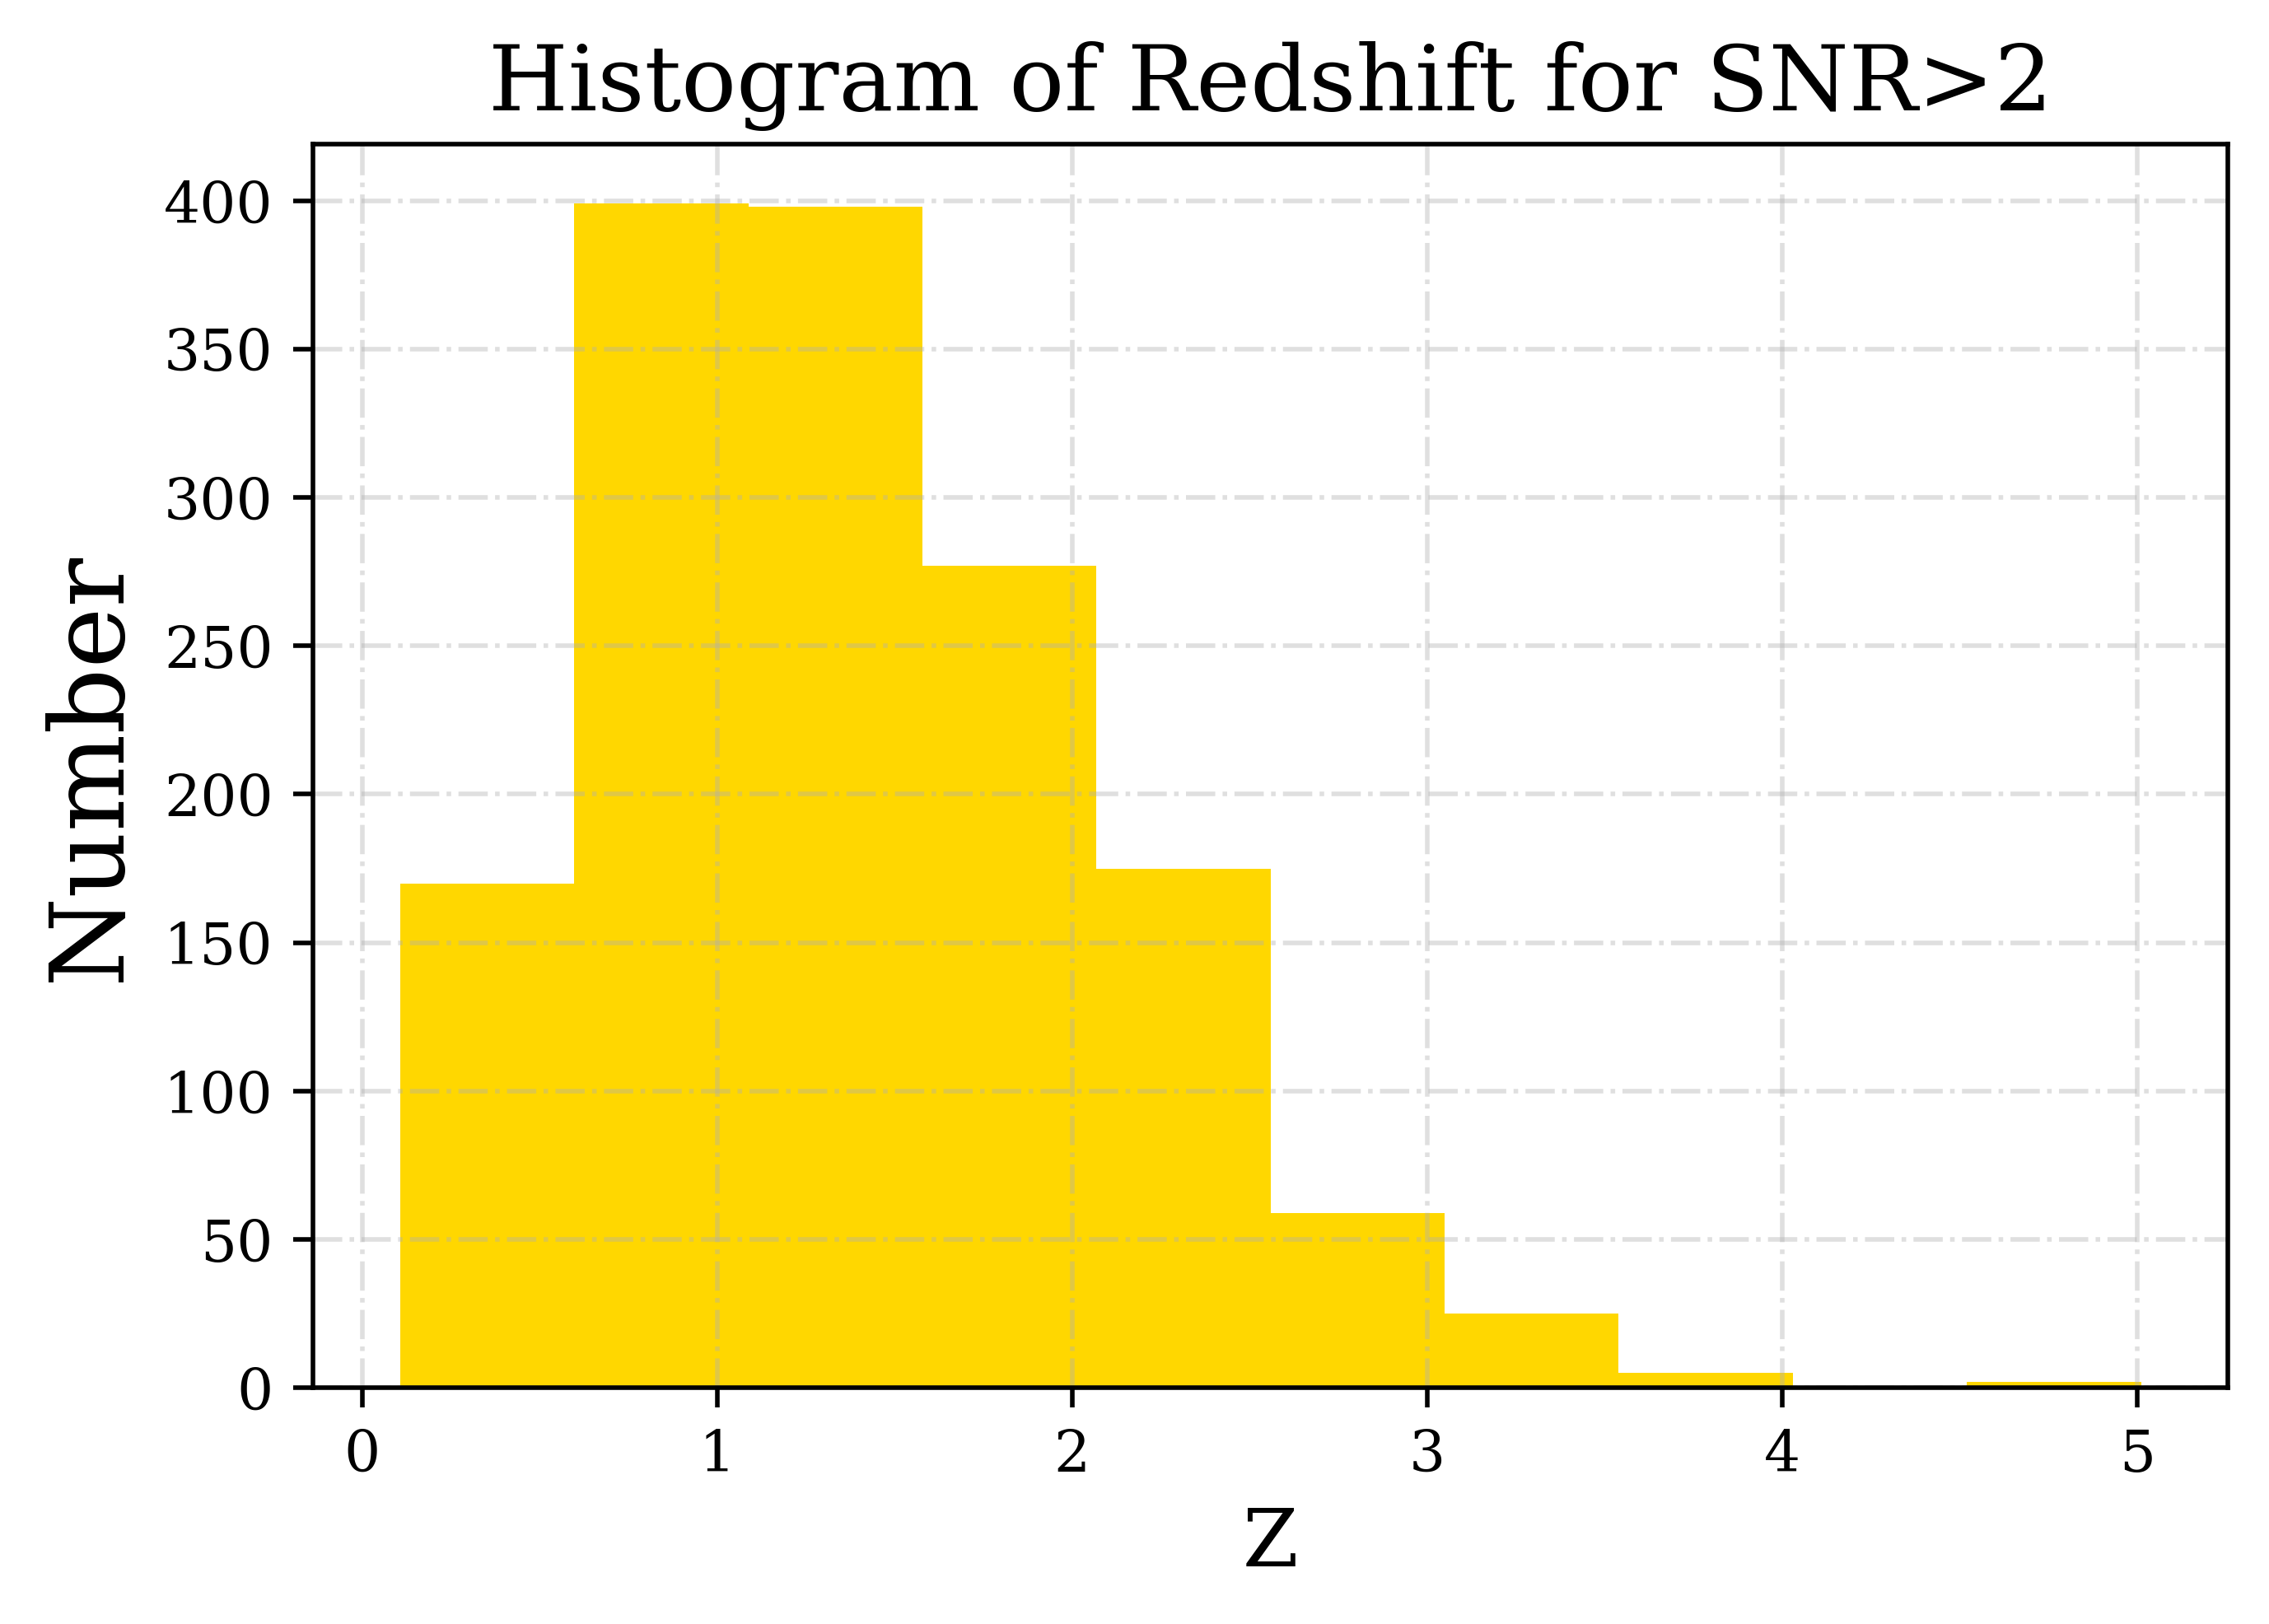

In [29]:
plt.figure()
%matplotlib inline
dpi=500   #to make the plot bigger 
mpl.rcParams['figure.dpi']= dpi
plt.rc('text', usetex=False)
plt.rc('font', family='serif')

plt.grid(True,ls='-.',alpha=.4)
plt.title(r'Histogram of Redshift for SNR>2',fontsize=16)
plt.xlabel(r'Z',fontsize=14)
plt.ylabel(r'Number',fontsize=18)

plt.hist(h_masked['Z'], color='gold')

plt.show()

In [30]:
mask = (table_hdu['SNR_2.0_12.0keV']>2)
h_masked2 = table_hdu[mask]
h_masked2

<Table length=616>
    SDSS_NAME              RA         ...   SNR_0.2_2.0keV    SNR_2.0_12.0keV  
        -                 deg         ...   erg / (cm2 s)      erg / (cm2 s)   
      str18             float64       ...      float64            float64      
------------------ ------------------ ... ------------------ ------------------
000355.49+000736.4 0.9812129735946656 ...  8.904879225640427 3.0543171942436618
000442.18+000023.3 1.1757786642904833 ...  12.23231215168503  5.033320275024848
000456.17+000645.5 1.2340530157089231 ... 10.531390978136978  5.951256626378777
000505.45-000210.8 1.2727229595184326 ... 4.9923060466310805 2.2375812068102032
000512.18+000802.9 1.3007830381393433 ...  9.419148852400333  3.747671636952816
000531.06+000950.9  1.379438042640686 ...  6.502264192525451 2.8181977809107015
001010.03+005126.6 2.5418028831481934 ... 10.158493214730846  2.884656039503721
001055.65+005951.0 2.7318834260711924 ...  4.187224538455126   4.09738903849845
001057.16+005455.4 2.7381939088340914 ...  5.340357755761912  2.221644801372678
               ...                ... ...                ...                ...
234359.03+001912.9  355.9959618769767 ...  2.681622247521188  3.041514518674204
23446.888+002312.3 356.02870000000013 ...  14.71510517547123  5.882180390202341
234705.67+010630.5  356.7736511230469 ... 11.071444781809973 2.8145001385061748
234715.27+005807.8 356.81365966796875 ... 11.118119673402711  4.250380204094207
234715.98+005602.9  356.8166198730469 ... 17.226980775249842  6.442812668180074
234724.71+005246.8 356.85296630859375 ... 17.885008612486036  8.011751165599351
235800.62-000107.5  359.5025939941406 ...  8.481138832524778 2.6732266681521866
235815.45-000327.2 359.56439208984375 ...  8.103114520121368  2.530911674348115
235826.70-000833.9  359.6112694649288 ...  8.189602104366486 3.2989070294441634
235845.67-000459.6  359.6903076171875 ...  9.351095022624433  2.683306280069051

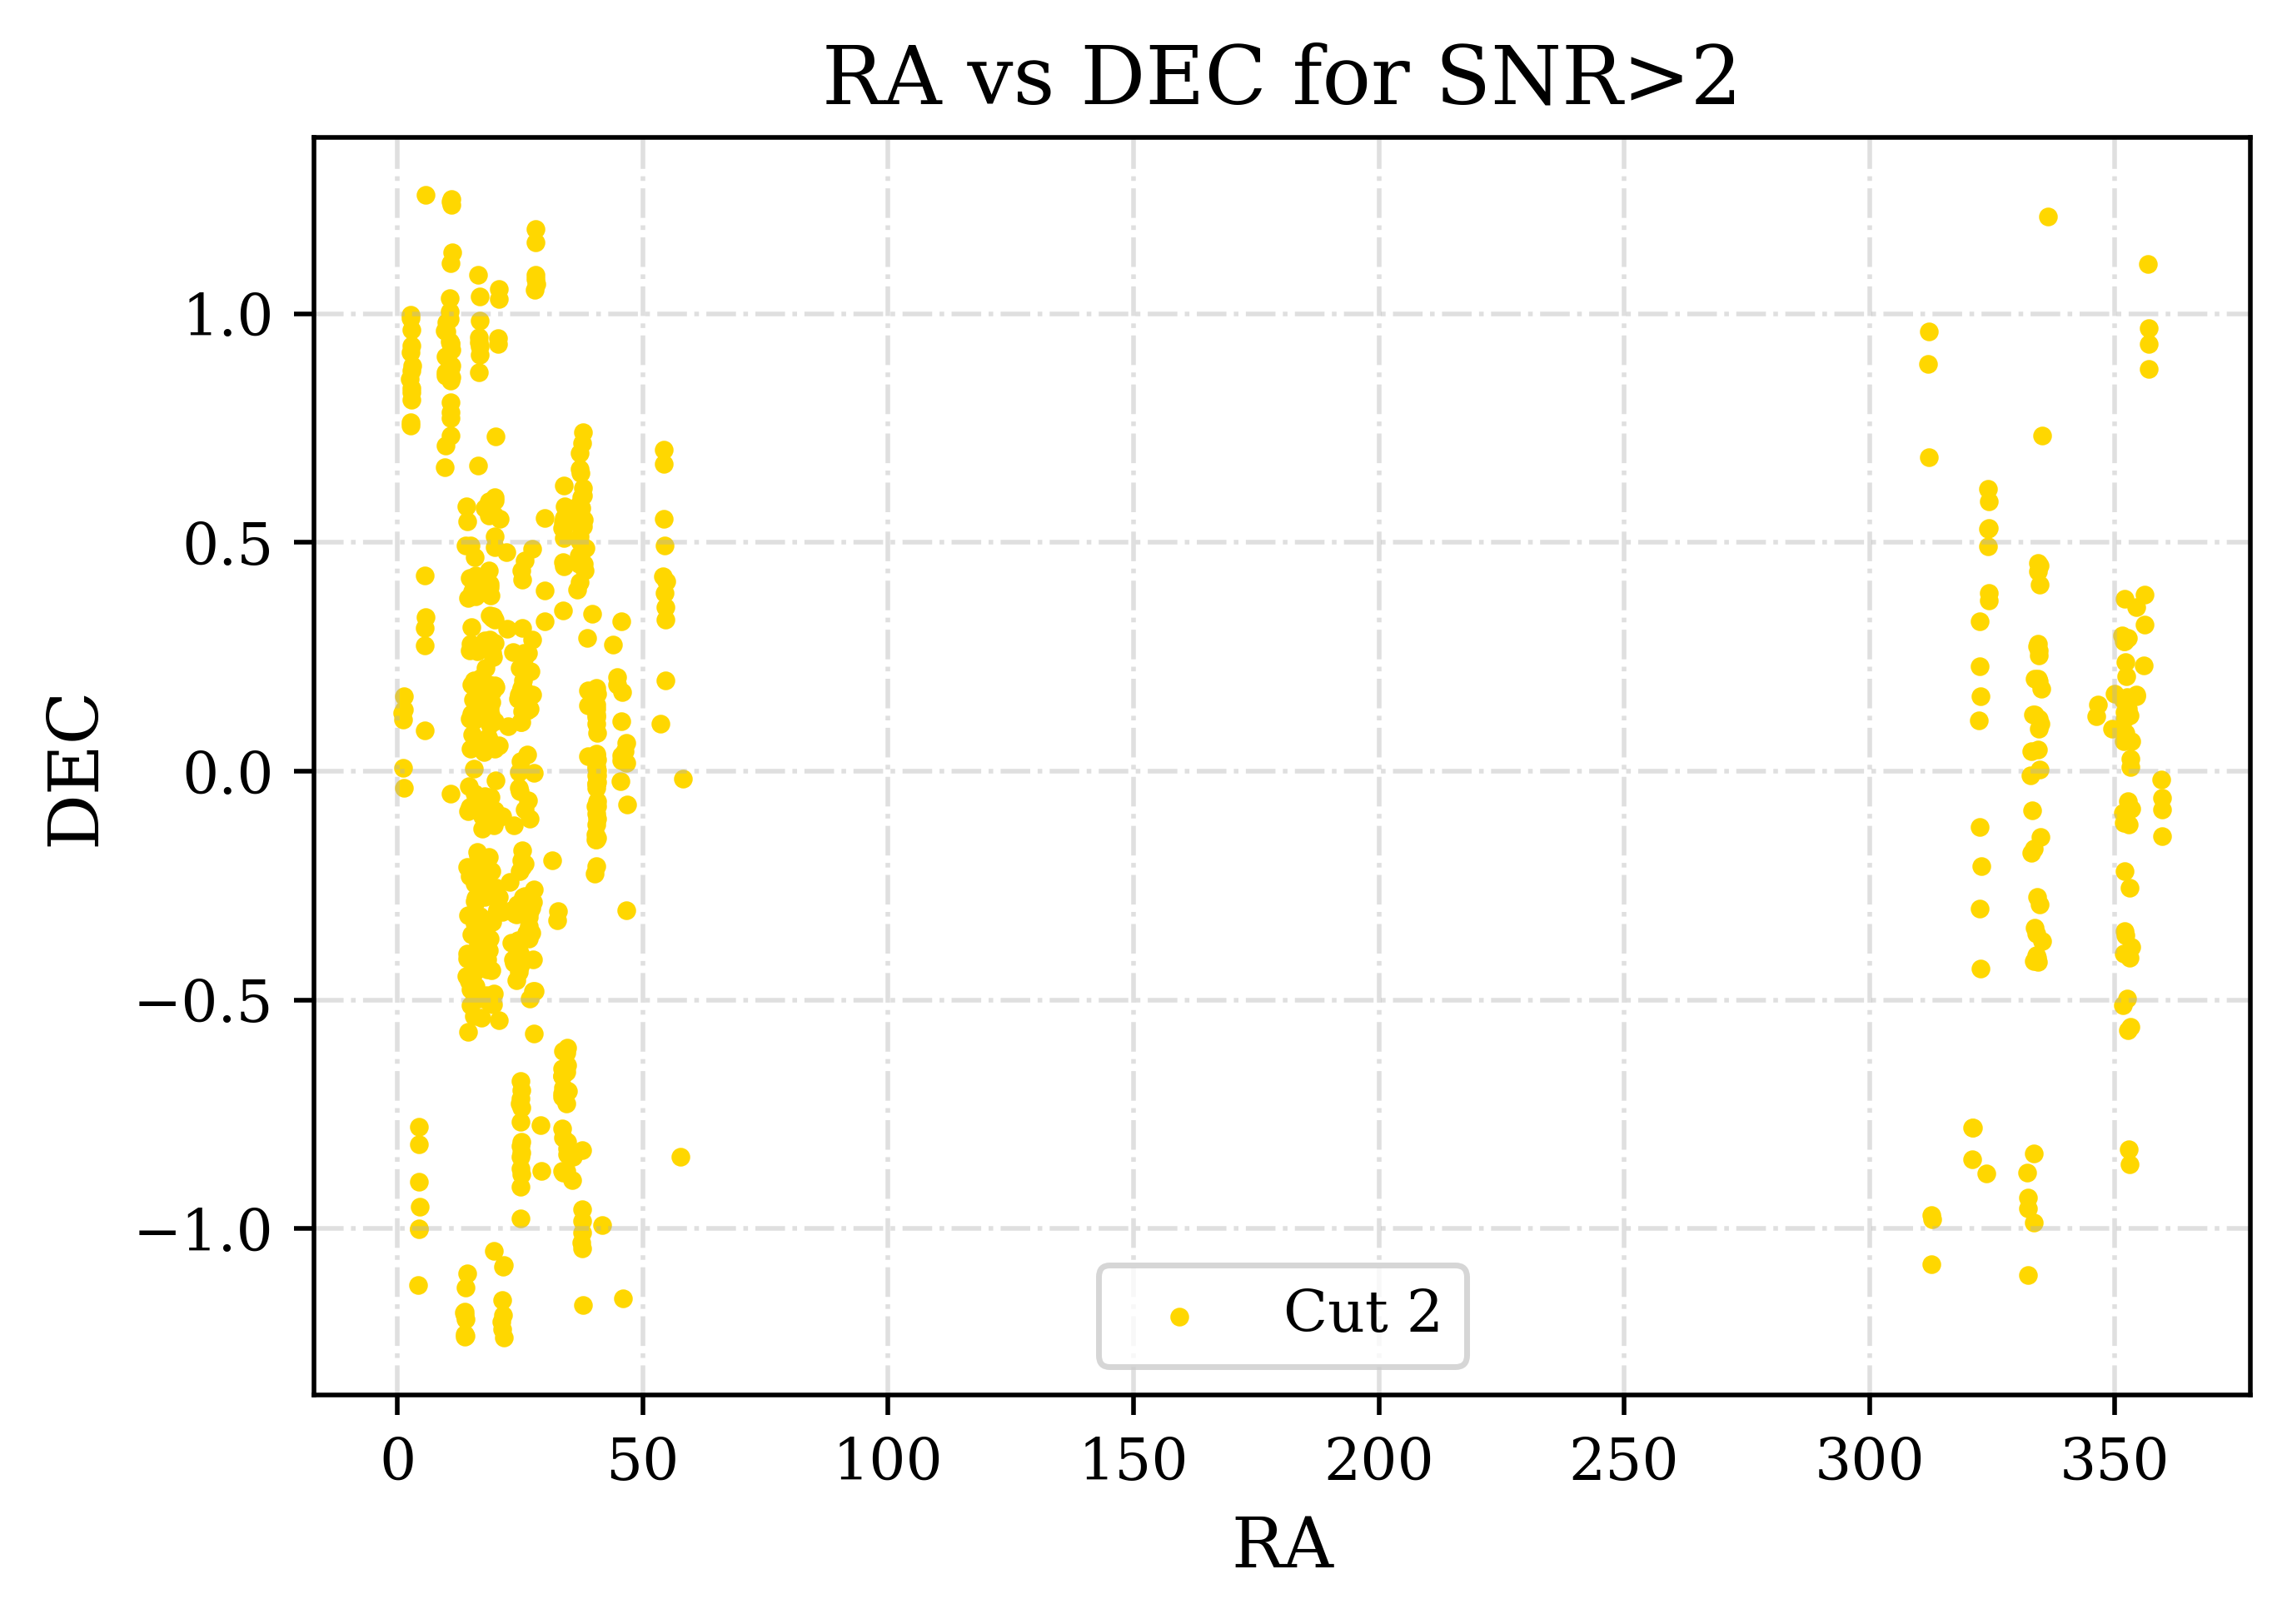

In [31]:
plt.figure()
%matplotlib inline
dpi=500   #to make the plot bigger 
mpl.rcParams['figure.dpi']= dpi
plt.rc('text', usetex=False)
plt.rc('font', family='serif')

plt.grid(True,ls='-.',alpha=.4)
plt.title(r'RA vs DEC for SNR>2',fontsize=14)
plt.xlabel(r'RA',fontsize=12)
plt.ylabel(r'DEC',fontsize=12)
plt.scatter(h_masked2['RA'],h_masked2['DEC'], color='gold', s=5, label='Cut 2')
#props = dict(boxstyle='round', facecolor='pink', alpha=0.5)
#plt.text(0.55,20 , '$H_{0}=$'+str(H_0*1e6)+'$\, km/sMpc$', bbox=props, fontsize=6)
plt.legend();
plt.show()

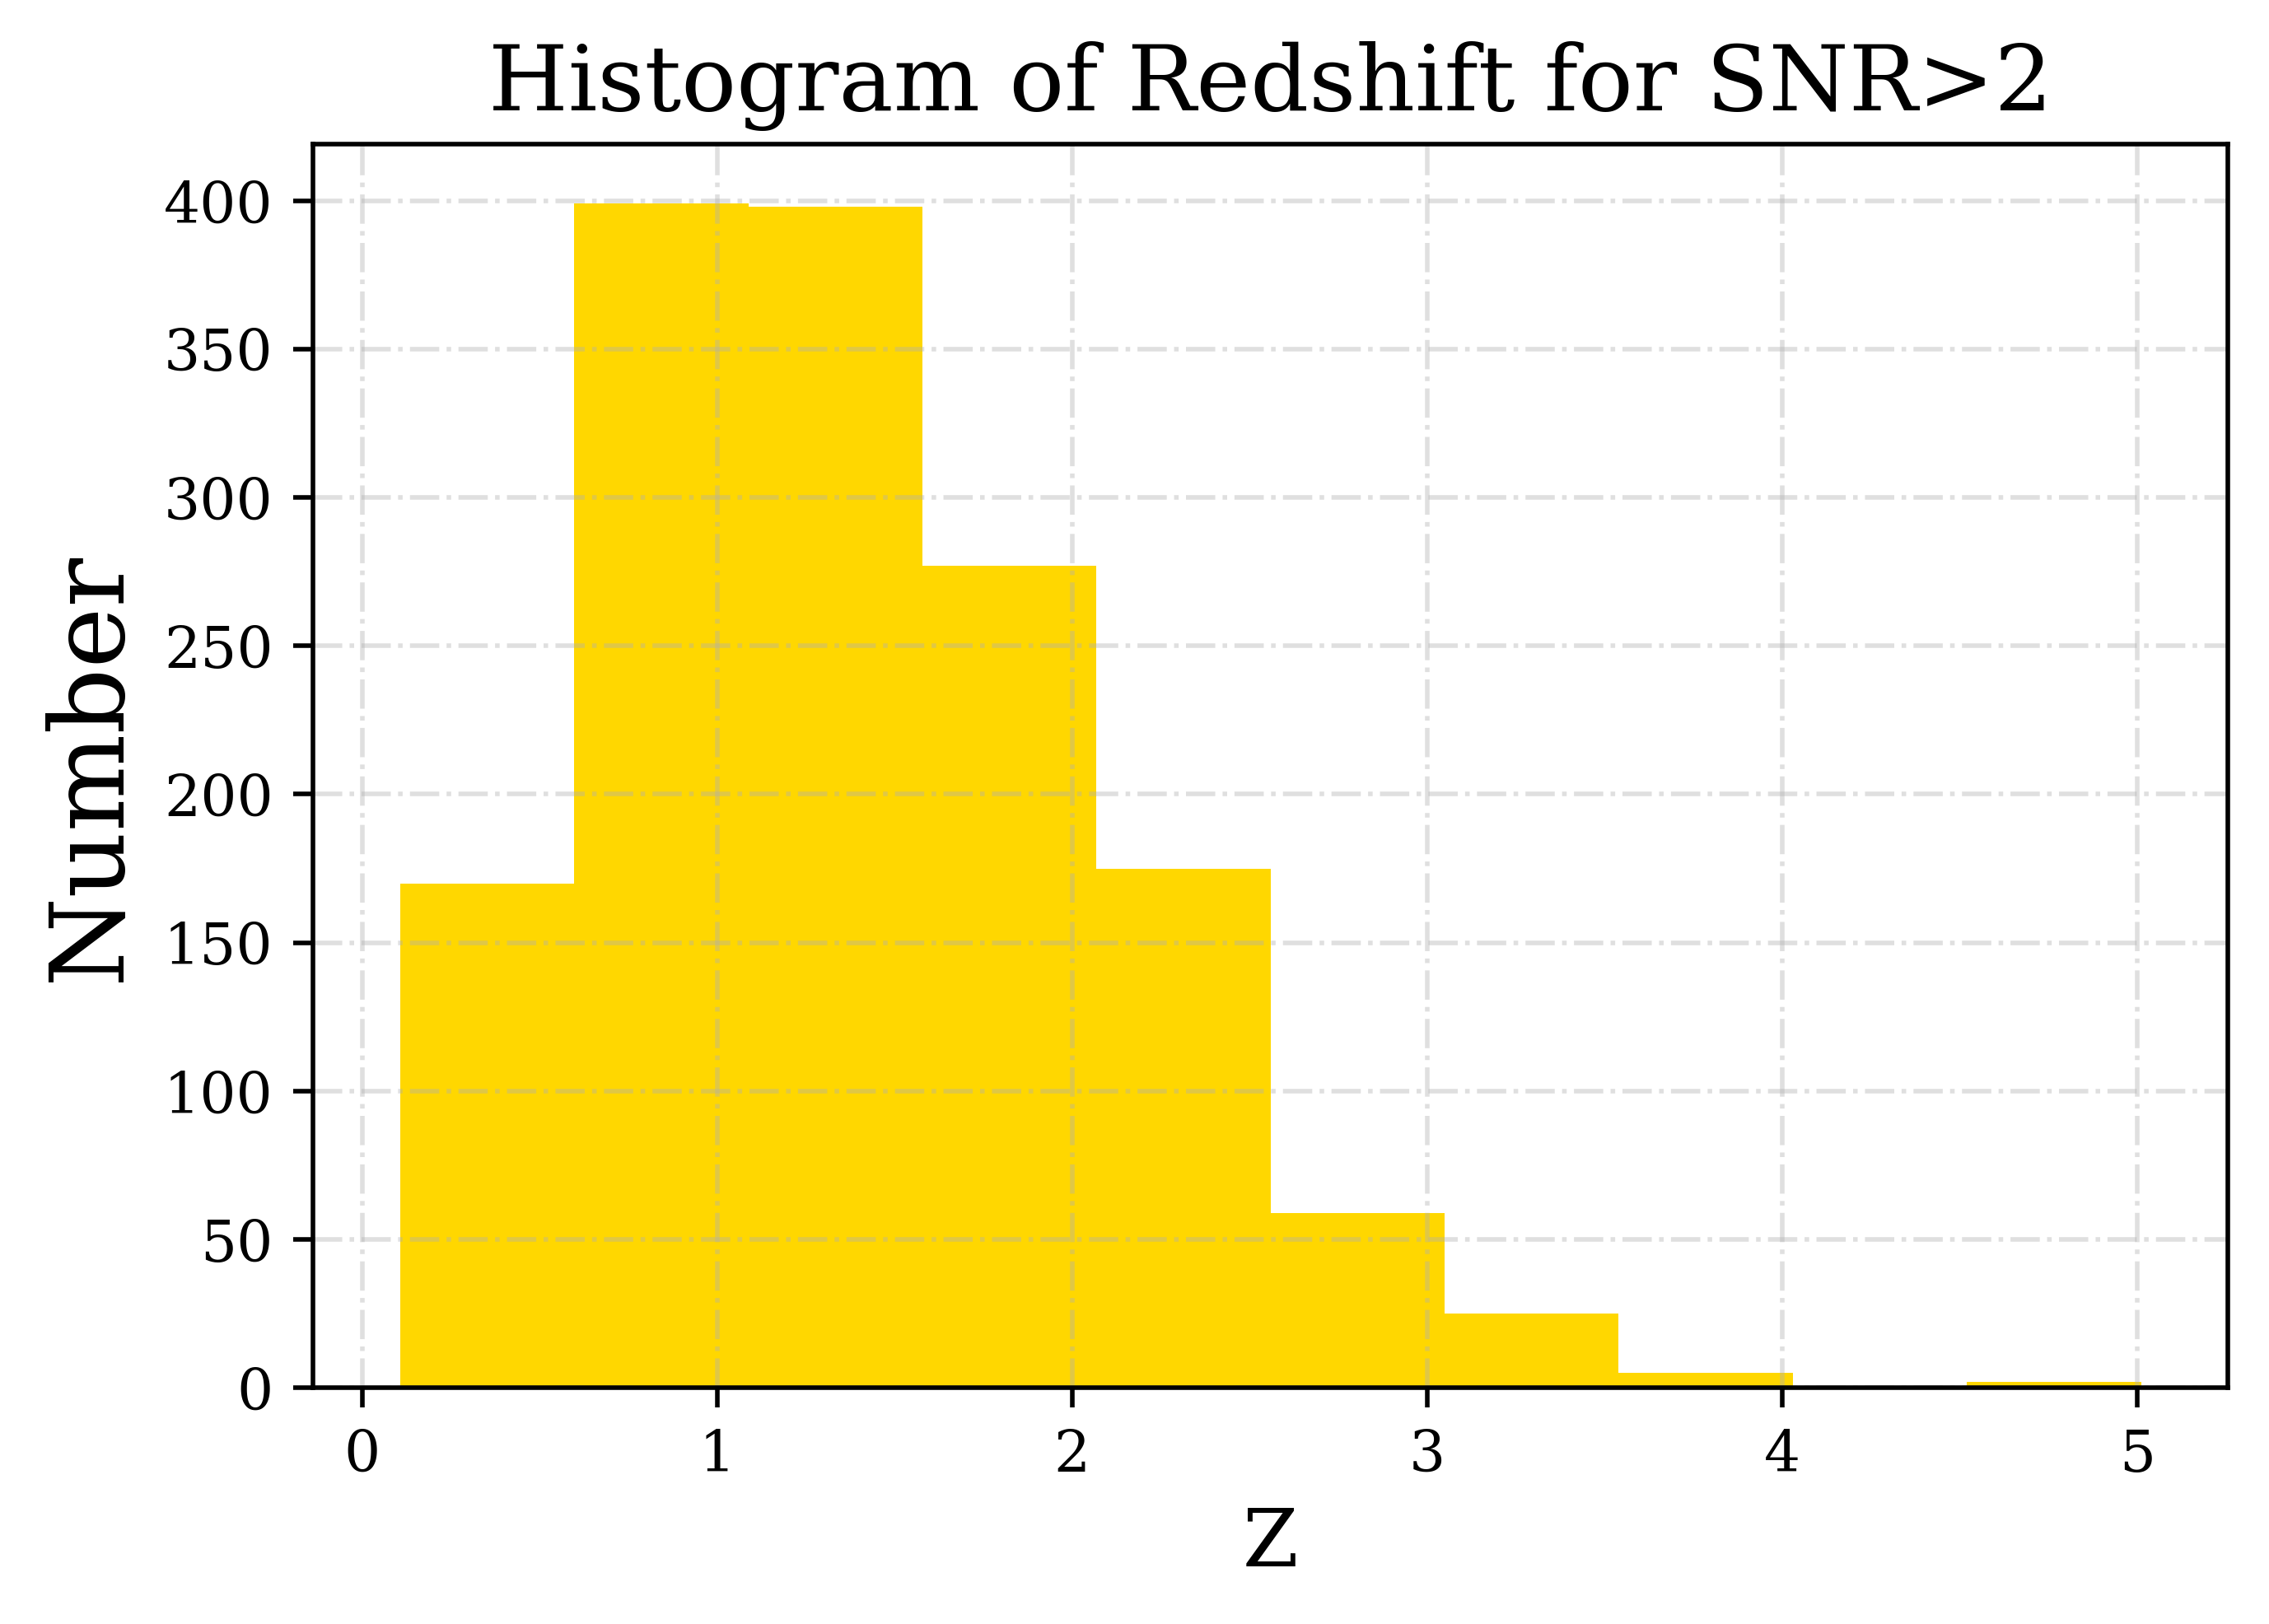

In [32]:
plt.figure()
%matplotlib inline
dpi=500   #to make the plot bigger 
mpl.rcParams['figure.dpi']= dpi
plt.rc('text', usetex=False)
plt.rc('font', family='serif')

plt.grid(True,ls='-.',alpha=.4)
plt.title(r'Histogram of Redshift for SNR>2',fontsize=16)
plt.xlabel(r'Z',fontsize=14)
plt.ylabel(r'Number',fontsize=18)

plt.hist(h_masked['Z'], color='gold')

plt.show()

#### Cut 3: SNR>3

In [33]:
mask = (h.data['FIRST_SNR']>3 )
h_masked3 = table_hdu[mask]

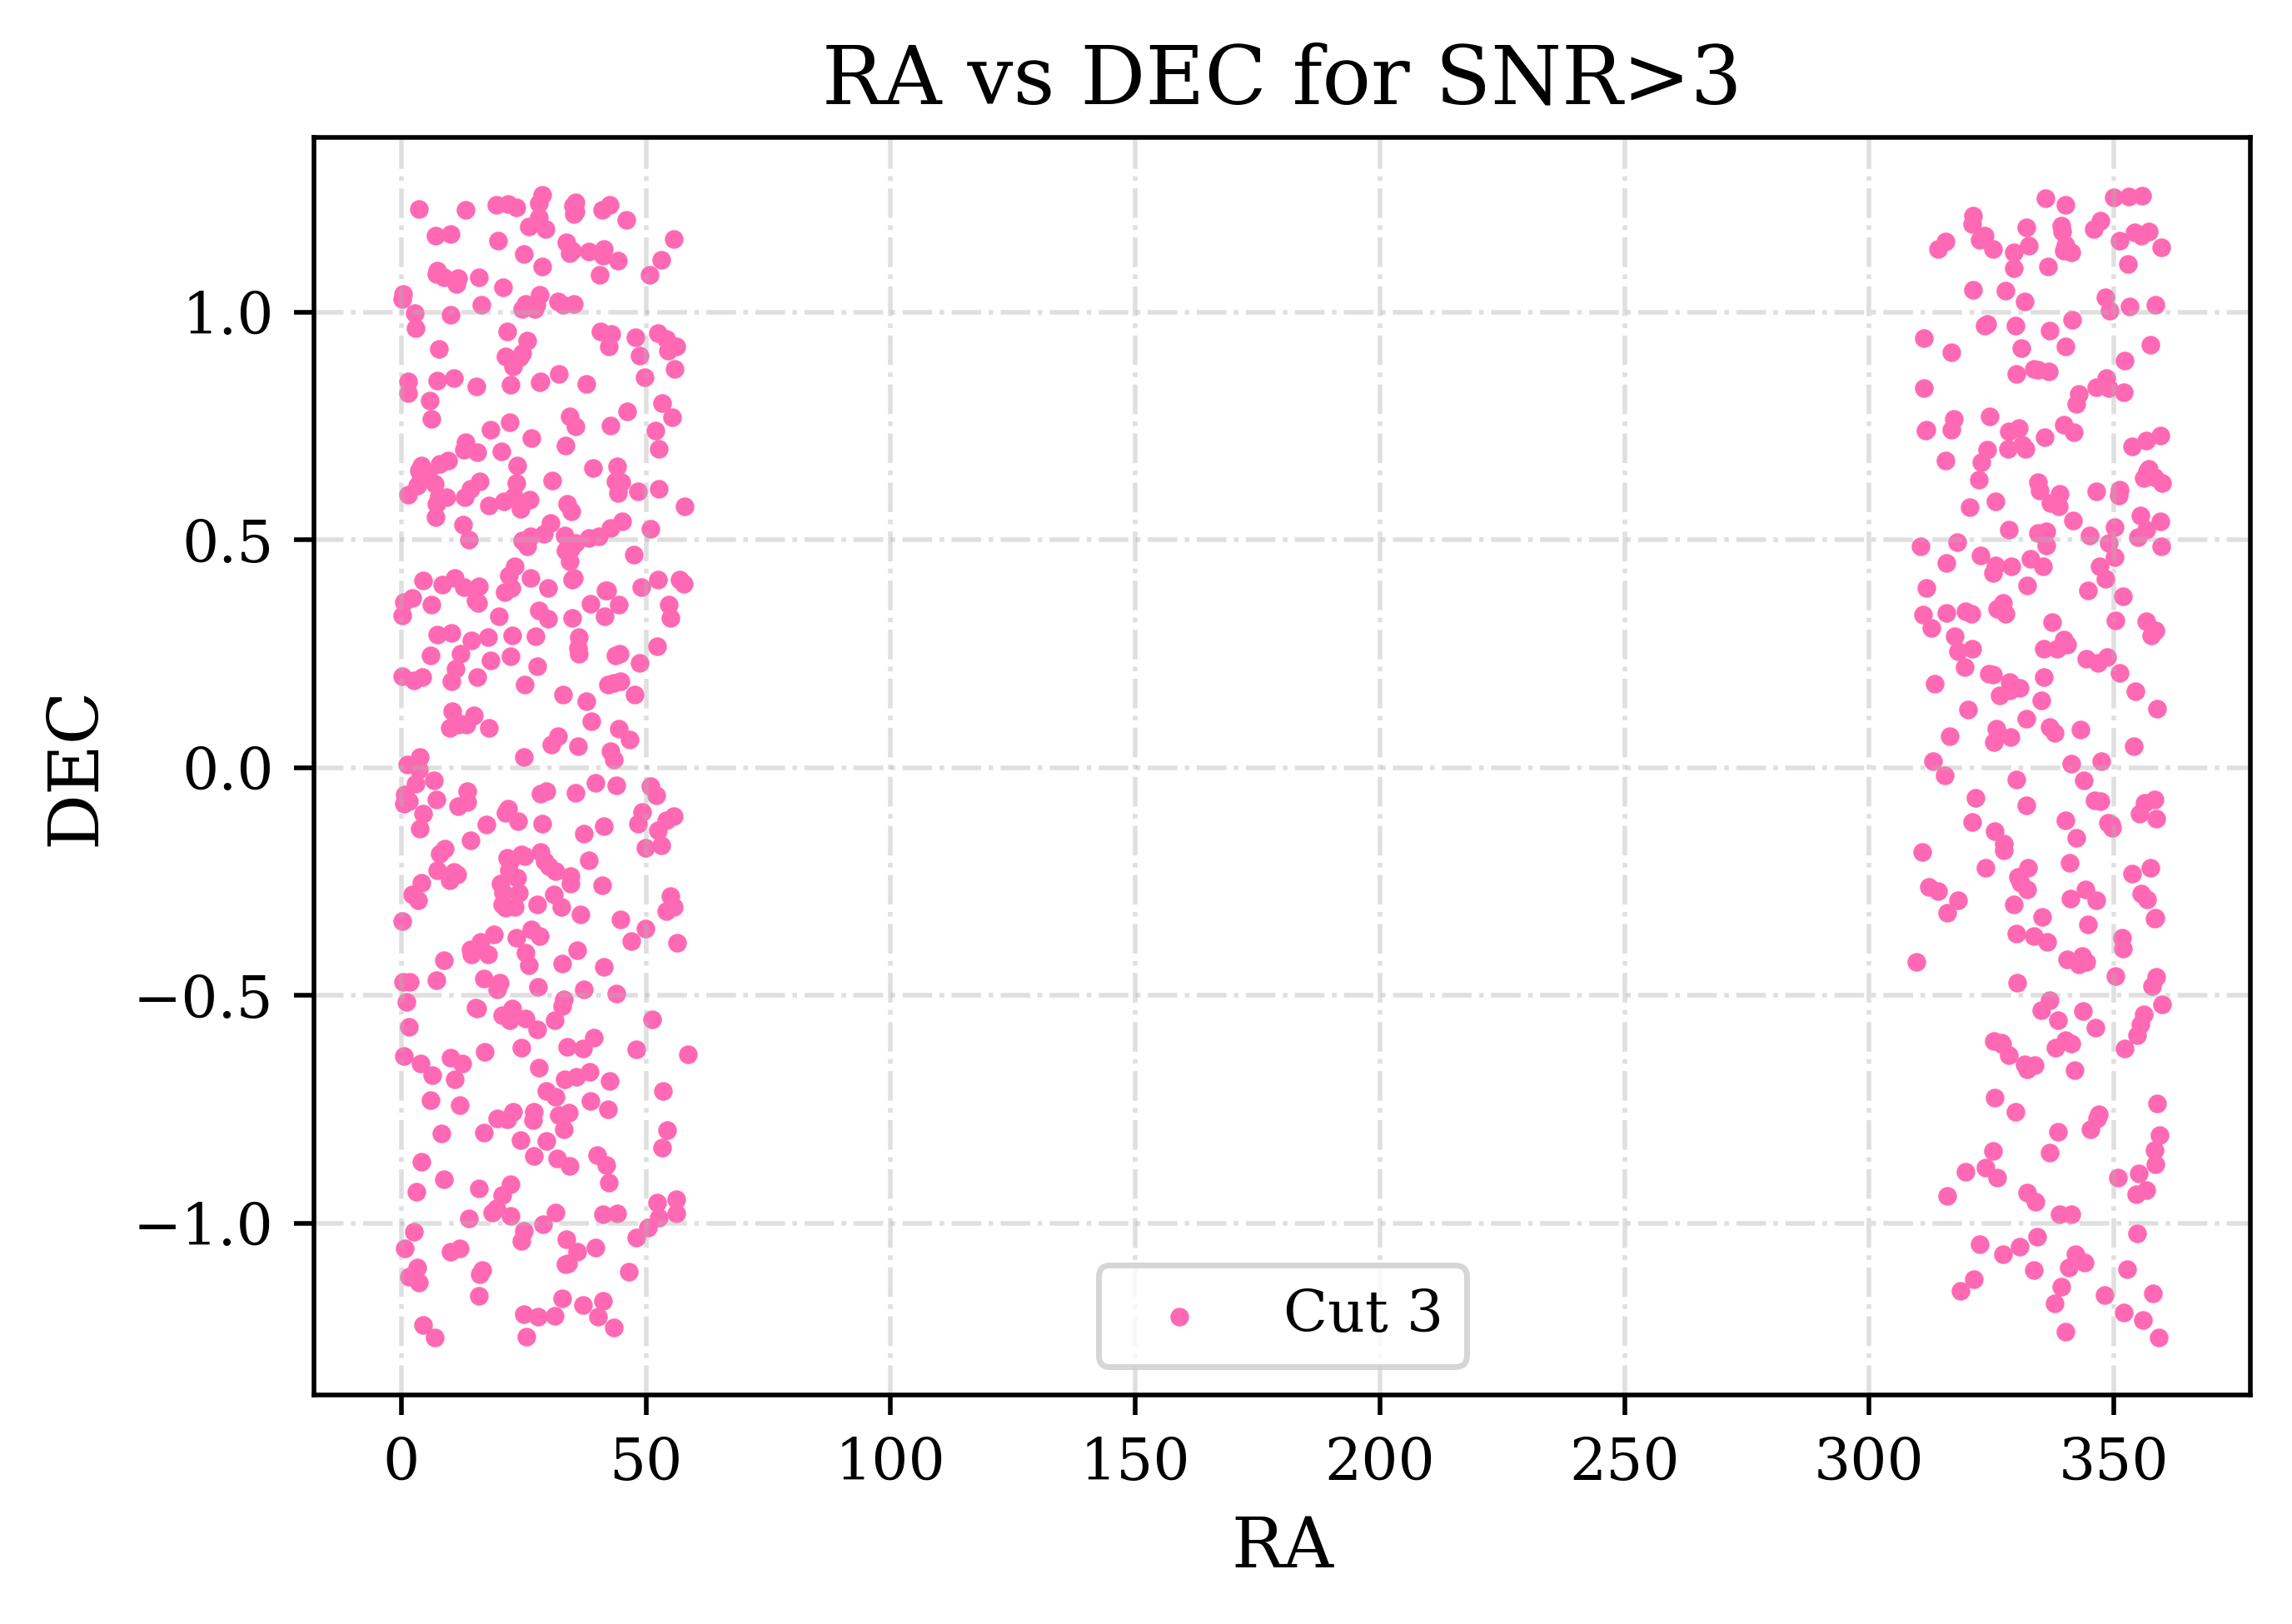

In [34]:
plt.figure()
%matplotlib inline
dpi=500   #to make the plot bigger 
mpl.rcParams['figure.dpi']= dpi
plt.rc('text', usetex=False)
plt.rc('font', family='serif')

plt.grid(True,ls='-.',alpha=.4)
plt.title(r'RA vs DEC for SNR>3',fontsize=14)
plt.xlabel(r'RA',fontsize=12)
plt.ylabel(r'DEC',fontsize=12)
plt.scatter(h_masked3['RA'],h_masked3['DEC'], color='hotpink', s=5, label='Cut 3')
#props = dict(boxstyle='round', facecolor='pink', alpha=0.5)
#plt.text(0.55,20 , '$H_{0}=$'+str(H_0*1e6)+'$\, km/sMpc$', bbox=props, fontsize=6)
plt.legend();
plt.show()

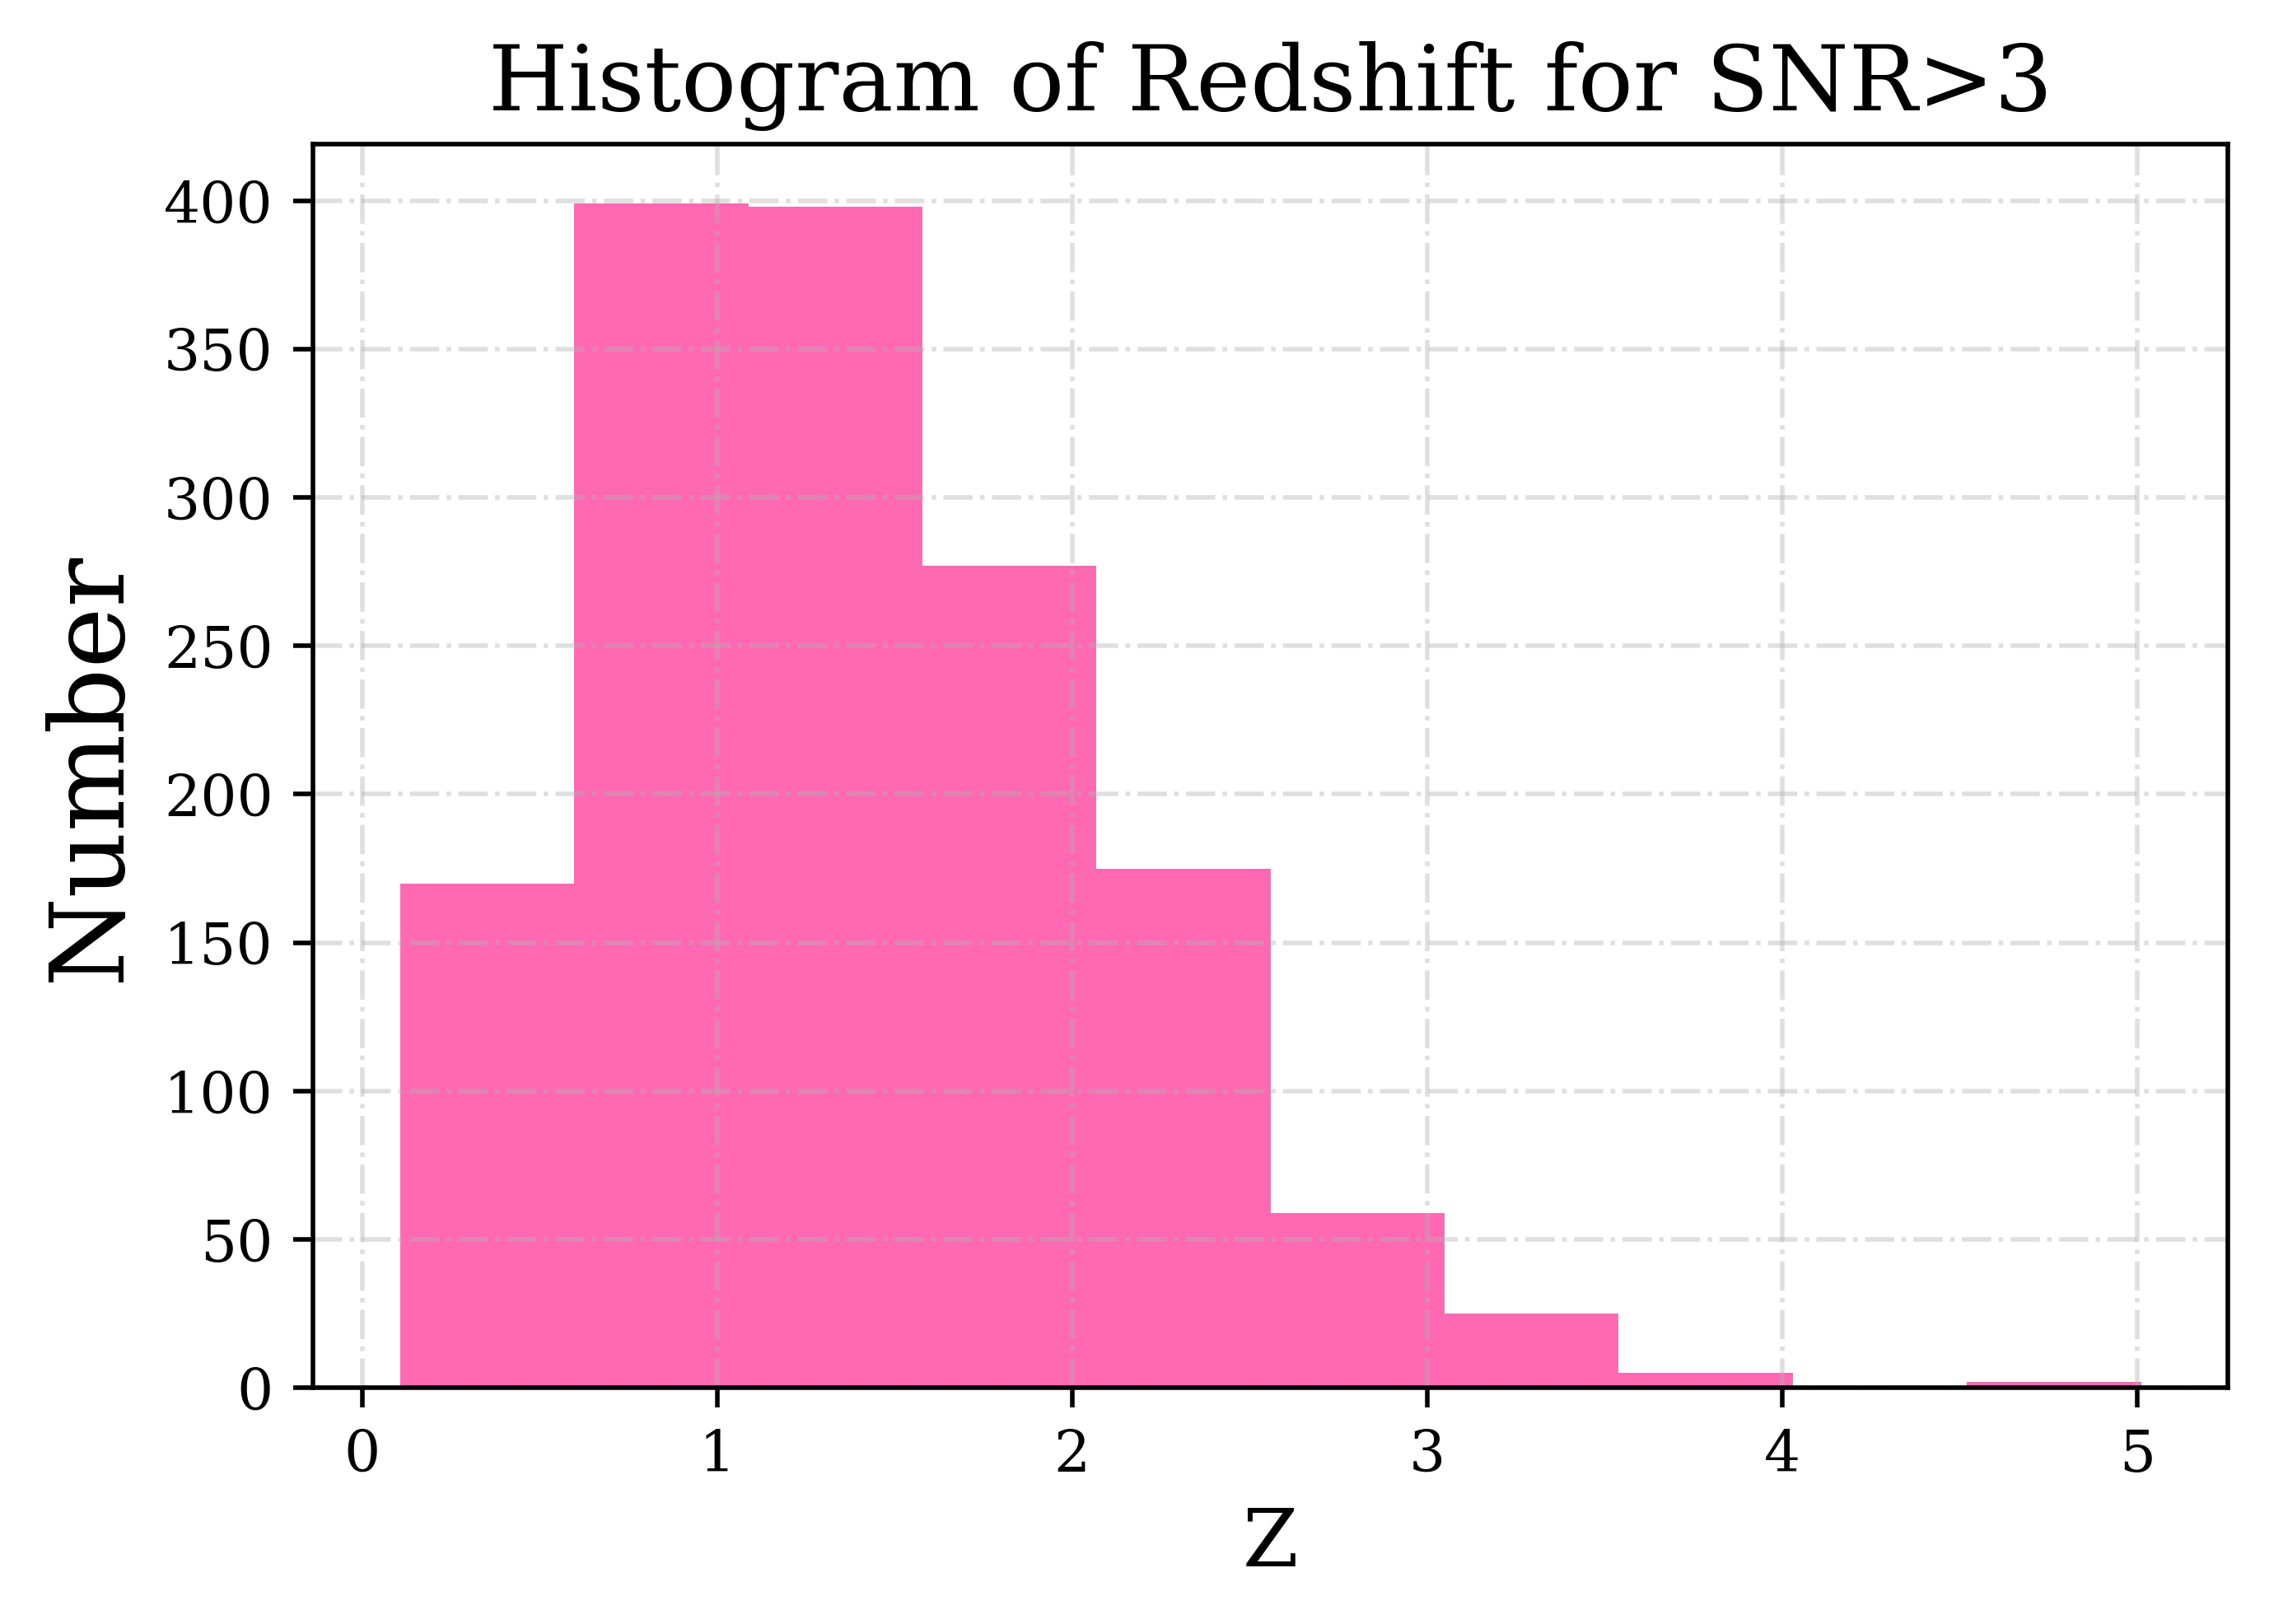

In [35]:
plt.figure()
%matplotlib inline
dpi=500   #to make the plot bigger 
mpl.rcParams['figure.dpi']= dpi
plt.rc('text', usetex=False)
plt.rc('font', family='serif')

plt.grid(True,ls='-.',alpha=.4)
plt.title(r'Histogram of Redshift for SNR>3',fontsize=16)
plt.xlabel(r'Z',fontsize=14)
plt.ylabel(r'Number',fontsize=18)

plt.hist(h_masked['Z'], color='hotpink')

plt.show()

In [36]:
mask = (table_hdu['SNR_0.2_2.0keV']>3)
h_masked3 = table_hdu[mask]
h_masked3

<Table length=1587>
    SDSS_NAME              RA         ...   SNR_0.2_2.0keV     SNR_2.0_12.0keV  
        -                 deg         ...   erg / (cm2 s)       erg / (cm2 s)   
      str18             float64       ...      float64             float64      
------------------ ------------------ ... ------------------ -------------------
000355.23+001216.4 0.9801463979920708 ...   3.68784975729549 0.12442492518238175
000355.49+000736.4 0.9812129735946656 ...  8.904879225640427  3.0543171942436618
000431.01+000332.2 1.1292113505230557 ...   3.49042868731698  0.2025745344889727
000442.18+000023.3 1.1757786642904833 ...  12.23231215168503   5.033320275024848
000448.01-000108.7 1.2000593000000208 ...  3.255038407784368  0.8763638248894489
000451.06+001154.7  1.212751793109664 ...  7.353615940390385   1.894356138609886
000456.17+000645.5 1.2340530157089231 ... 10.531390978136978   5.951256626378777
000505.45-000210.8 1.2727229595184326 ... 4.9923060466310805  2.2375812068102032
000506.57+000258.6 1.2773966276385842 ...  3.181478448258936  0.8536521142304611
               ...                ... ...                ...                 ...
235813.75-001716.5 359.55732471949165 ...  5.878586999022779  1.9443976980453521
235815.45-000327.2 359.56439208984375 ...  8.103114520121368   2.530911674348115
235826.70-000833.9  359.6112694649288 ...  8.189602104366486  3.2989070294441634
235844.95-000724.0 359.68731689453125 ...  7.191104125556422  1.2230176955005463
235845.67-000459.6  359.6903076171875 ...  9.351095022624433   2.683306280069051
235846.23-001133.5 359.69263614581735 ...    3.1695065329789  0.9761778397254826
235848.57-001448.6 359.70241214111365 ...   3.38598950190478  1.3475319549082965
235851.32-000558.9  359.7138331275773 ... 3.4481347460819736  1.1661156790473488
235854.85-000607.8  359.7285461425781 ...  4.254473332209888  1.7970901584122092
235913.51-000705.4  359.8063039150483 ...  3.422918705405697  0.9908580691756426

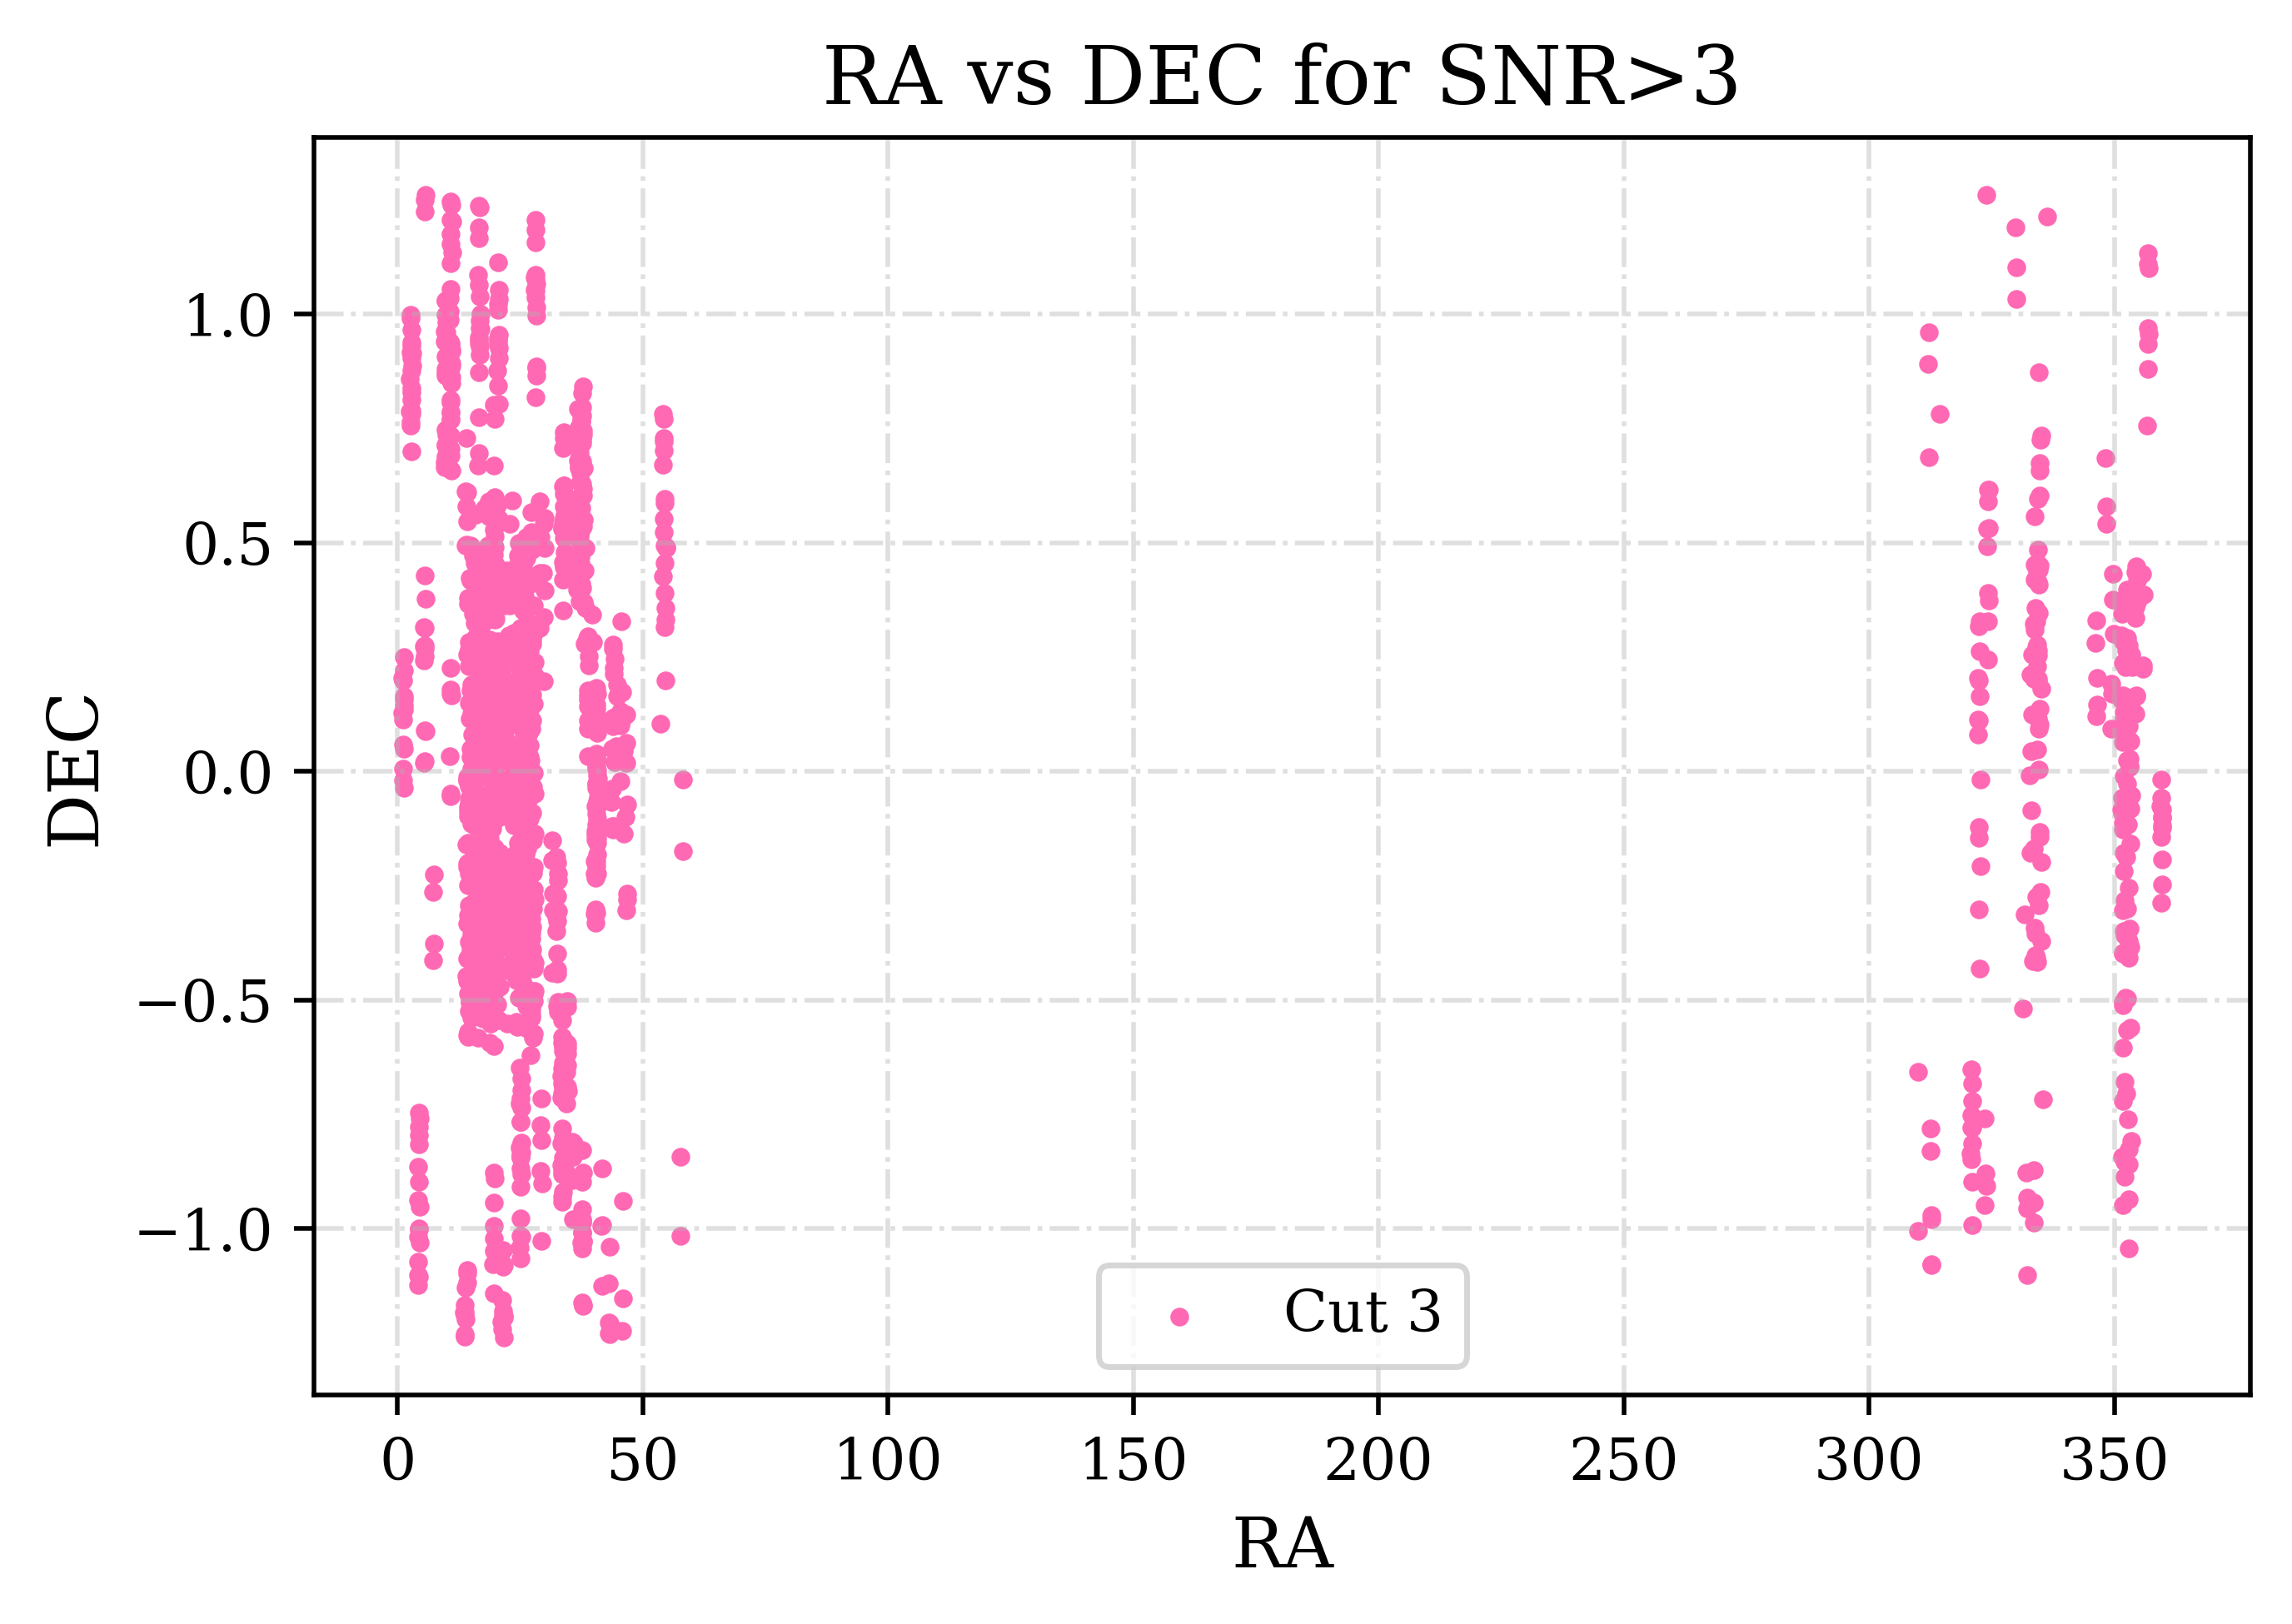

In [37]:
plt.figure()
%matplotlib inline
dpi=500   #to make the plot bigger 
mpl.rcParams['figure.dpi']= dpi
plt.rc('text', usetex=False)
plt.rc('font', family='serif')

plt.grid(True,ls='-.',alpha=.4)
plt.title(r'RA vs DEC for SNR>3',fontsize=14)
plt.xlabel(r'RA',fontsize=12)
plt.ylabel(r'DEC',fontsize=12)
plt.scatter(h_masked3['RA'],h_masked3['DEC'], color='hotpink', s=5, label='Cut 3')
#props = dict(boxstyle='round', facecolor='pink', alpha=0.5)
#plt.text(0.55,20 , '$H_{0}=$'+str(H_0*1e6)+'$\, km/sMpc$', bbox=props, fontsize=6)
plt.legend();
plt.show()

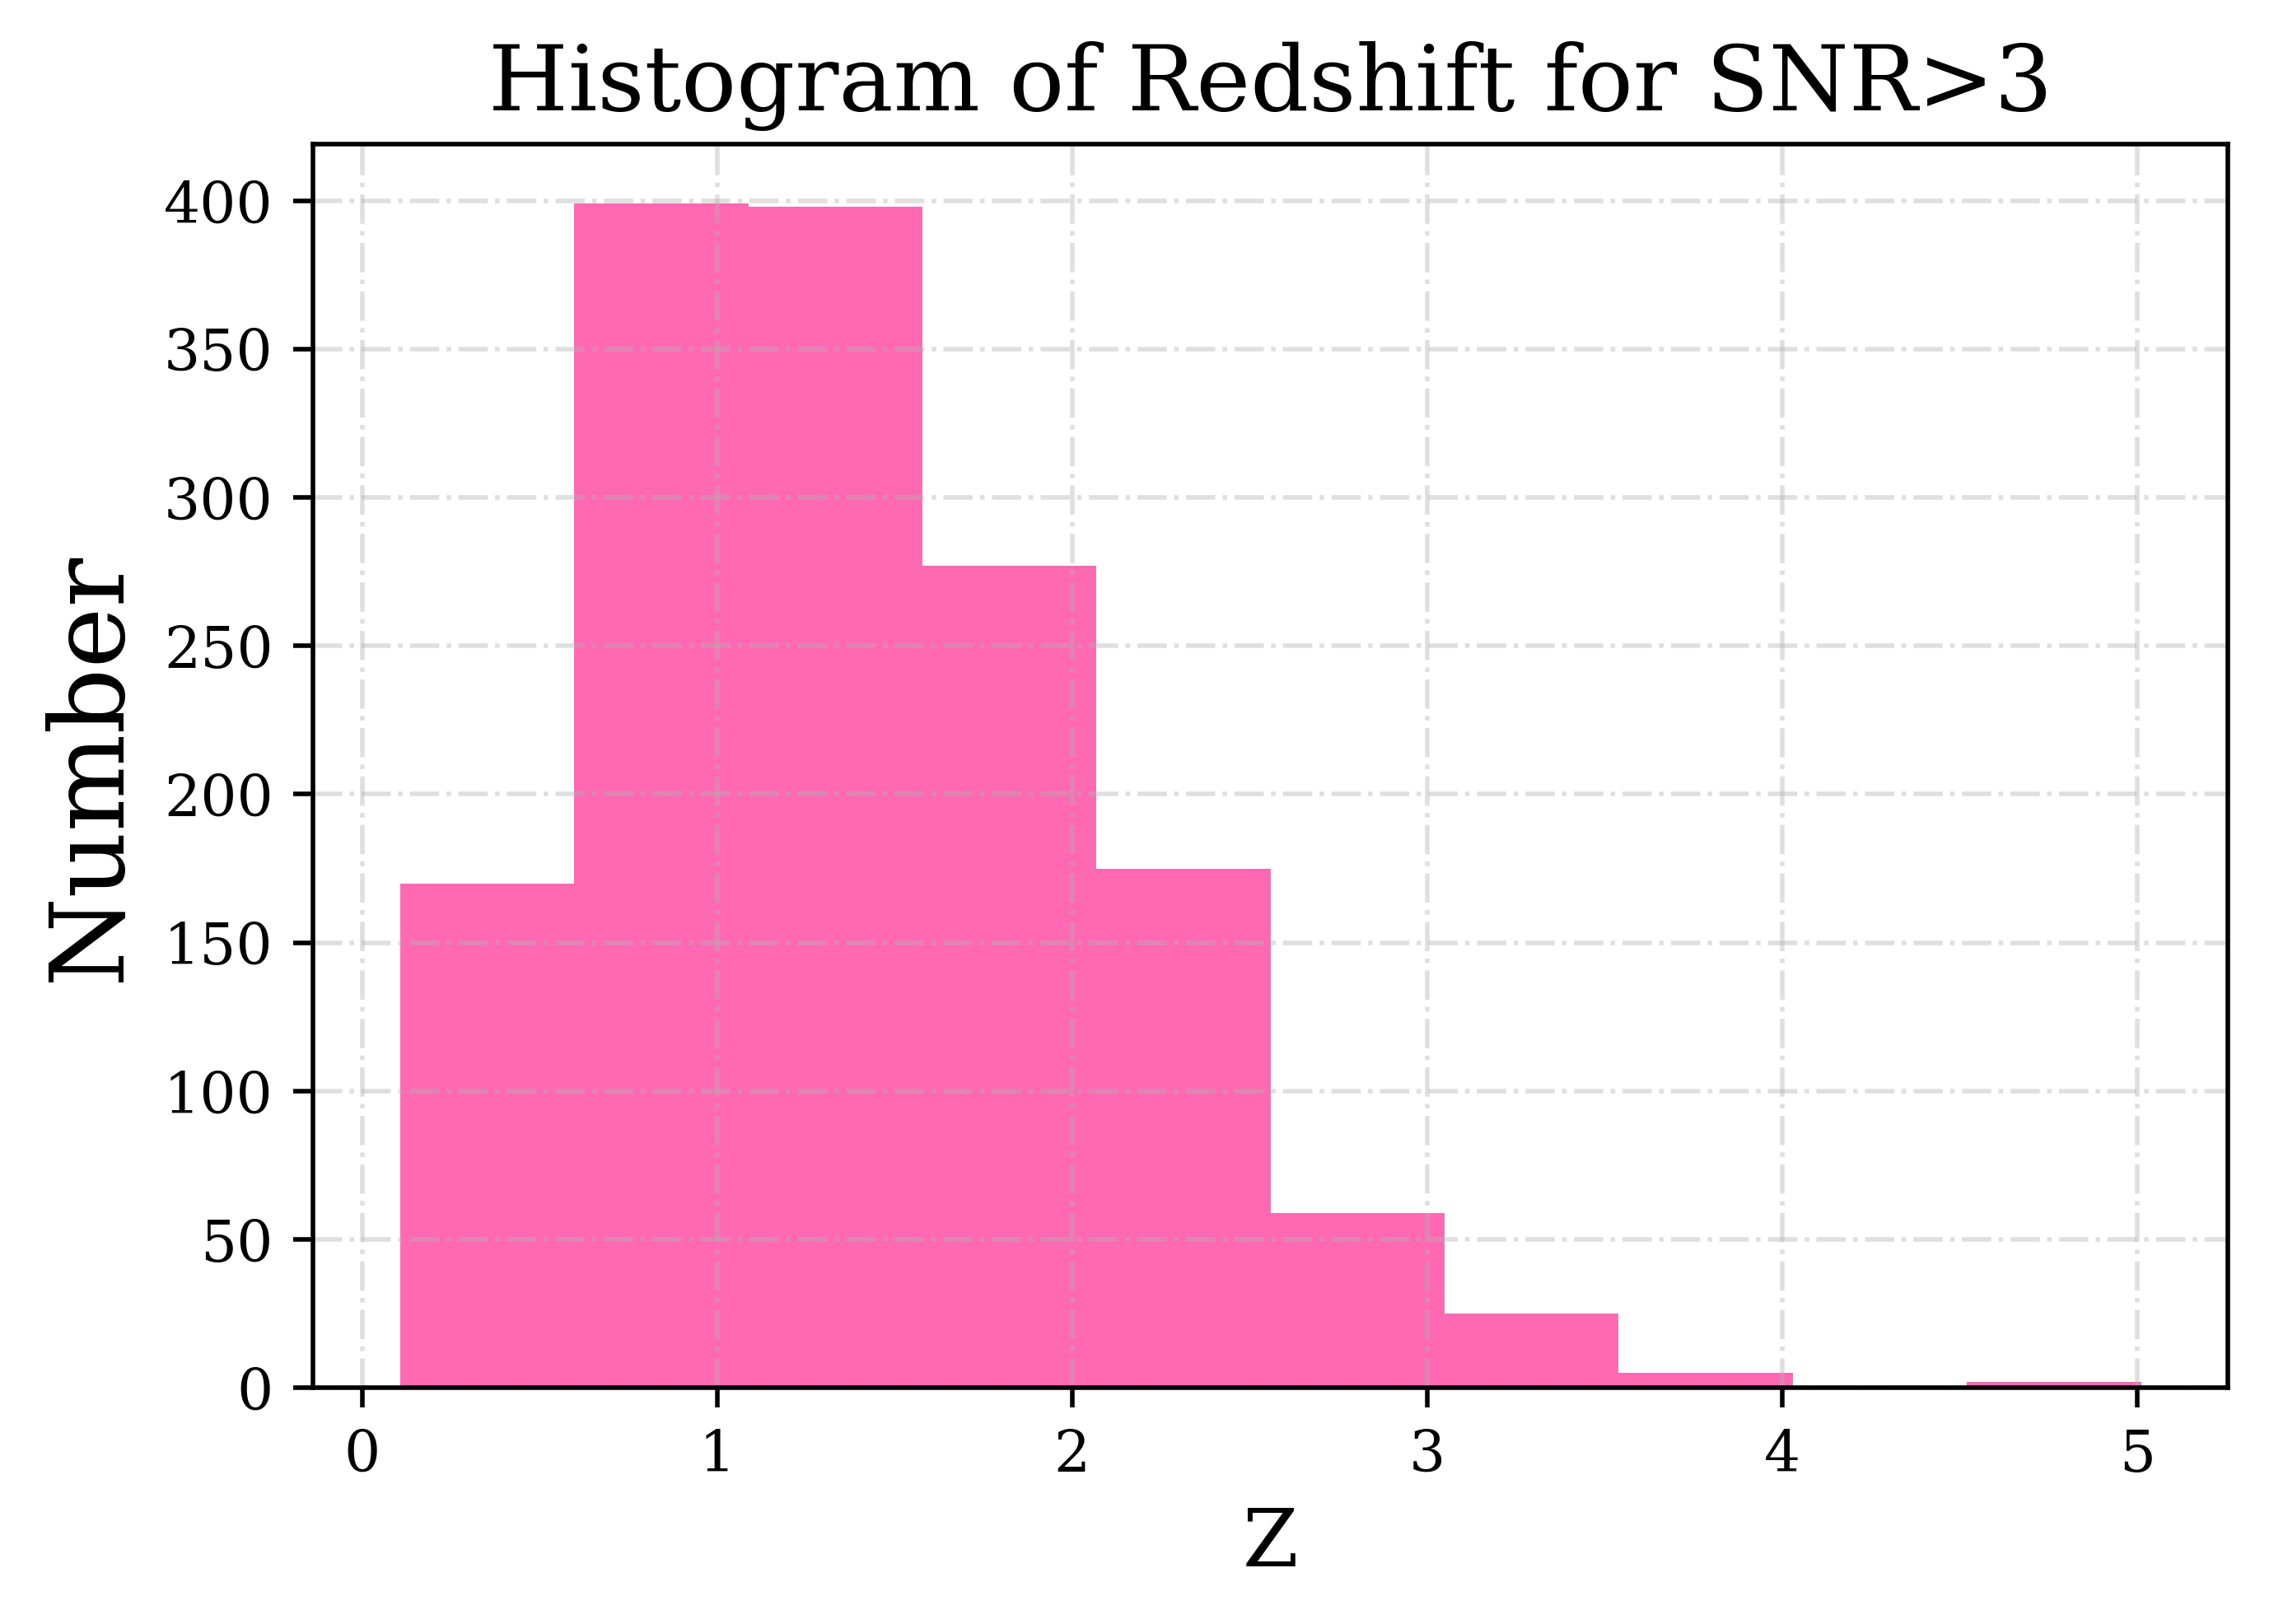

In [38]:
plt.figure()
%matplotlib inline
dpi=500   #to make the plot bigger 
mpl.rcParams['figure.dpi']= dpi
plt.rc('text', usetex=False)
plt.rc('font', family='serif')

plt.grid(True,ls='-.',alpha=.4)
plt.title(r'Histogram of Redshift for SNR>3',fontsize=16)
plt.xlabel(r'Z',fontsize=14)
plt.ylabel(r'Number',fontsize=18)

plt.hist(h_masked['Z'], color='hotpink')

plt.show()

In [39]:
mask = (table_hdu['SNR_2.0_12.0keV']>3)
h_masked3 = table_hdu[mask]
h_masked3

<Table length=295>
    SDSS_NAME              RA         ...   SNR_0.2_2.0keV    SNR_2.0_12.0keV  
        -                 deg         ...   erg / (cm2 s)      erg / (cm2 s)   
      str18             float64       ...      float64            float64      
------------------ ------------------ ... ------------------ ------------------
000355.49+000736.4 0.9812129735946656 ...  8.904879225640427 3.0543171942436618
000442.18+000023.3 1.1757786642904833 ...  12.23231215168503  5.033320275024848
000456.17+000645.5 1.2340530157089231 ... 10.531390978136978  5.951256626378777
000512.18+000802.9 1.3007830381393433 ...  9.419148852400333  3.747671636952816
001055.65+005951.0 2.7318834260711924 ...  4.187224538455126   4.09738903849845
001130.39+005751.8  2.876651803111713 ... 21.211060155346225 11.278430541941344
001716.82-010725.5  4.320115089416504 ... 20.780070256009733  8.839621756348206
001728.91-010001.4  4.370486142604932 ... 13.167530264853287 3.9677932218159078
001808.70-005710.2  4.536281108856201 ... 10.310929157679997  3.264386224292634
               ...                ... ...                ...                ...
233230.41+000137.6  353.1267395019531 ... 13.195770249085298  4.676377824250315
233317.38-002303.4 353.32244873046875 ...  18.67453430883309  8.437547475789556
233706.36+002132.3  354.2765197753906 ...  9.350226137385572  3.521267924195285
234326.90+001352.6 355.86211212692604 ...  8.207151530552318 3.2214237904591676
234359.03+001912.9  355.9959618769767 ...  2.681622247521188  3.041514518674204
23446.888+002312.3 356.02870000000013 ...  14.71510517547123  5.882180390202341
234715.27+005807.8 356.81365966796875 ... 11.118119673402711  4.250380204094207
234715.98+005602.9  356.8166198730469 ... 17.226980775249842  6.442812668180074
234724.71+005246.8 356.85296630859375 ... 17.885008612486036  8.011751165599351
235826.70-000833.9  359.6112694649288 ...  8.189602104366486 3.2989070294441634

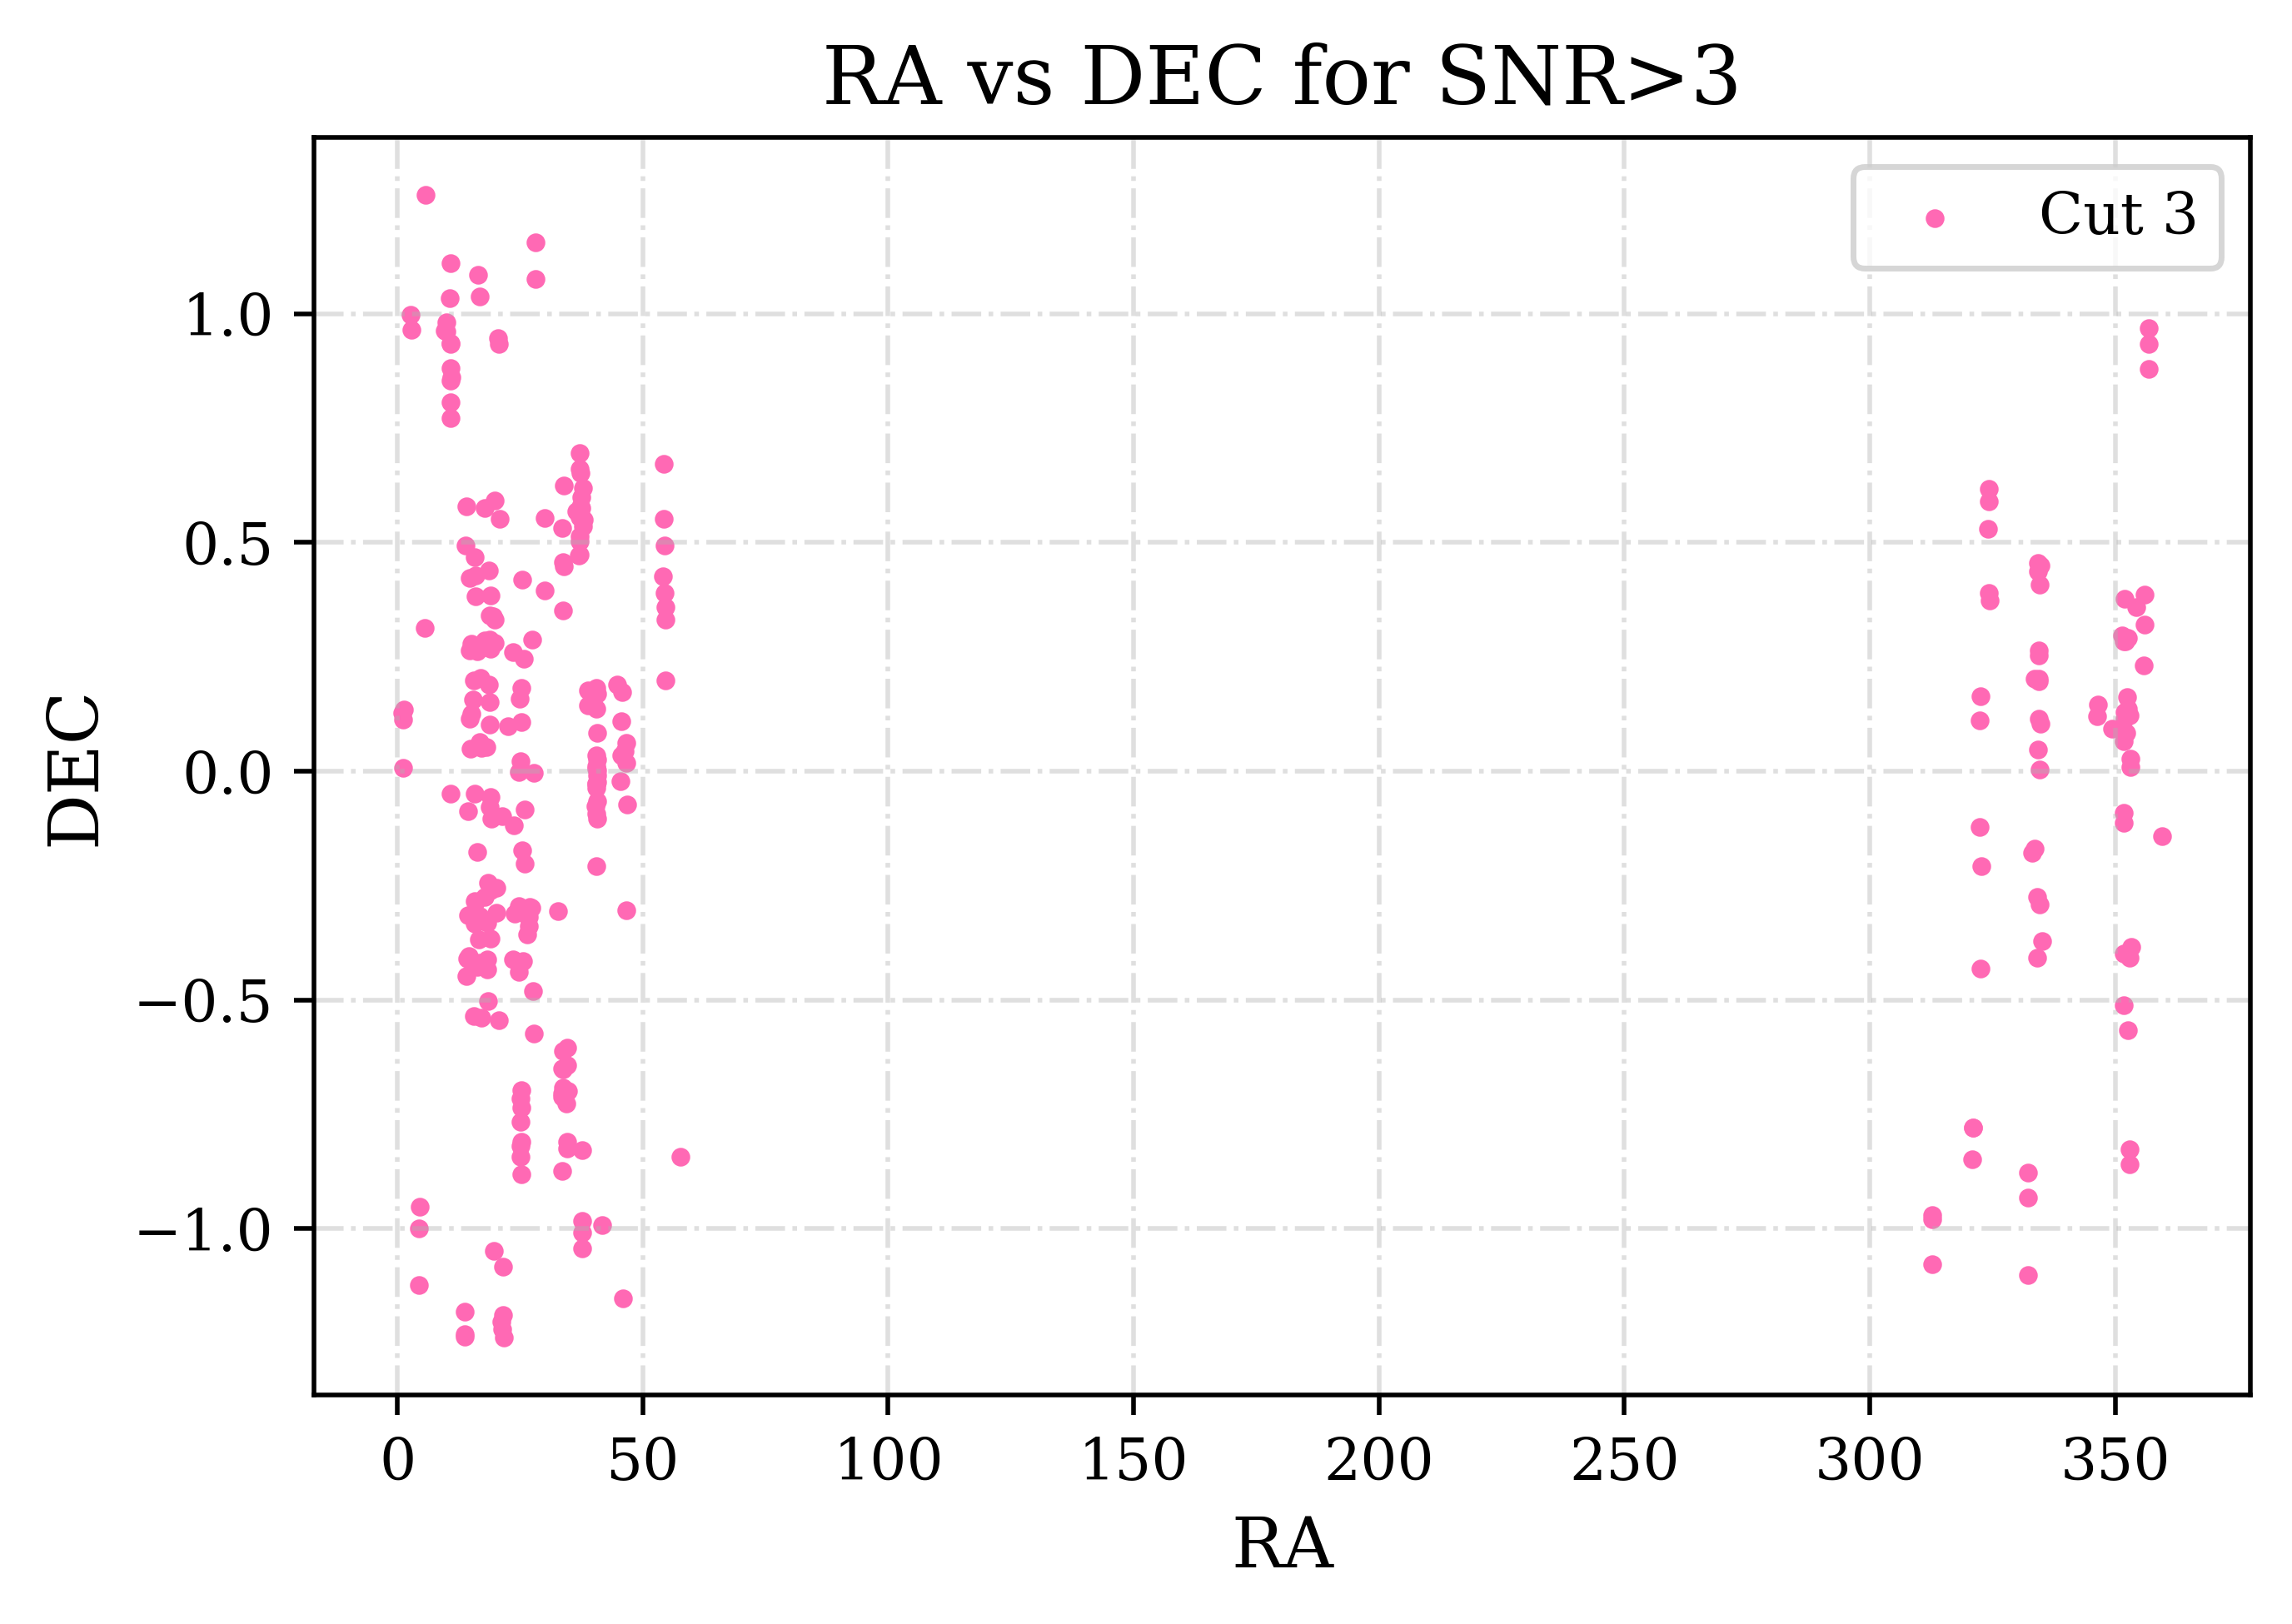

In [40]:
plt.figure()
%matplotlib inline
dpi=500   #to make the plot bigger 
mpl.rcParams['figure.dpi']= dpi
plt.rc('text', usetex=False)
plt.rc('font', family='serif')

plt.grid(True,ls='-.',alpha=.4)
plt.title(r'RA vs DEC for SNR>3',fontsize=14)
plt.xlabel(r'RA',fontsize=12)
plt.ylabel(r'DEC',fontsize=12)
plt.scatter(h_masked3['RA'],h_masked3['DEC'], color='hotpink', s=5, label='Cut 3')
#props = dict(boxstyle='round', facecolor='pink', alpha=0.5)
#plt.text(0.55,20 , '$H_{0}=$'+str(H_0*1e6)+'$\, km/sMpc$', bbox=props, fontsize=6)
plt.legend();
plt.show()

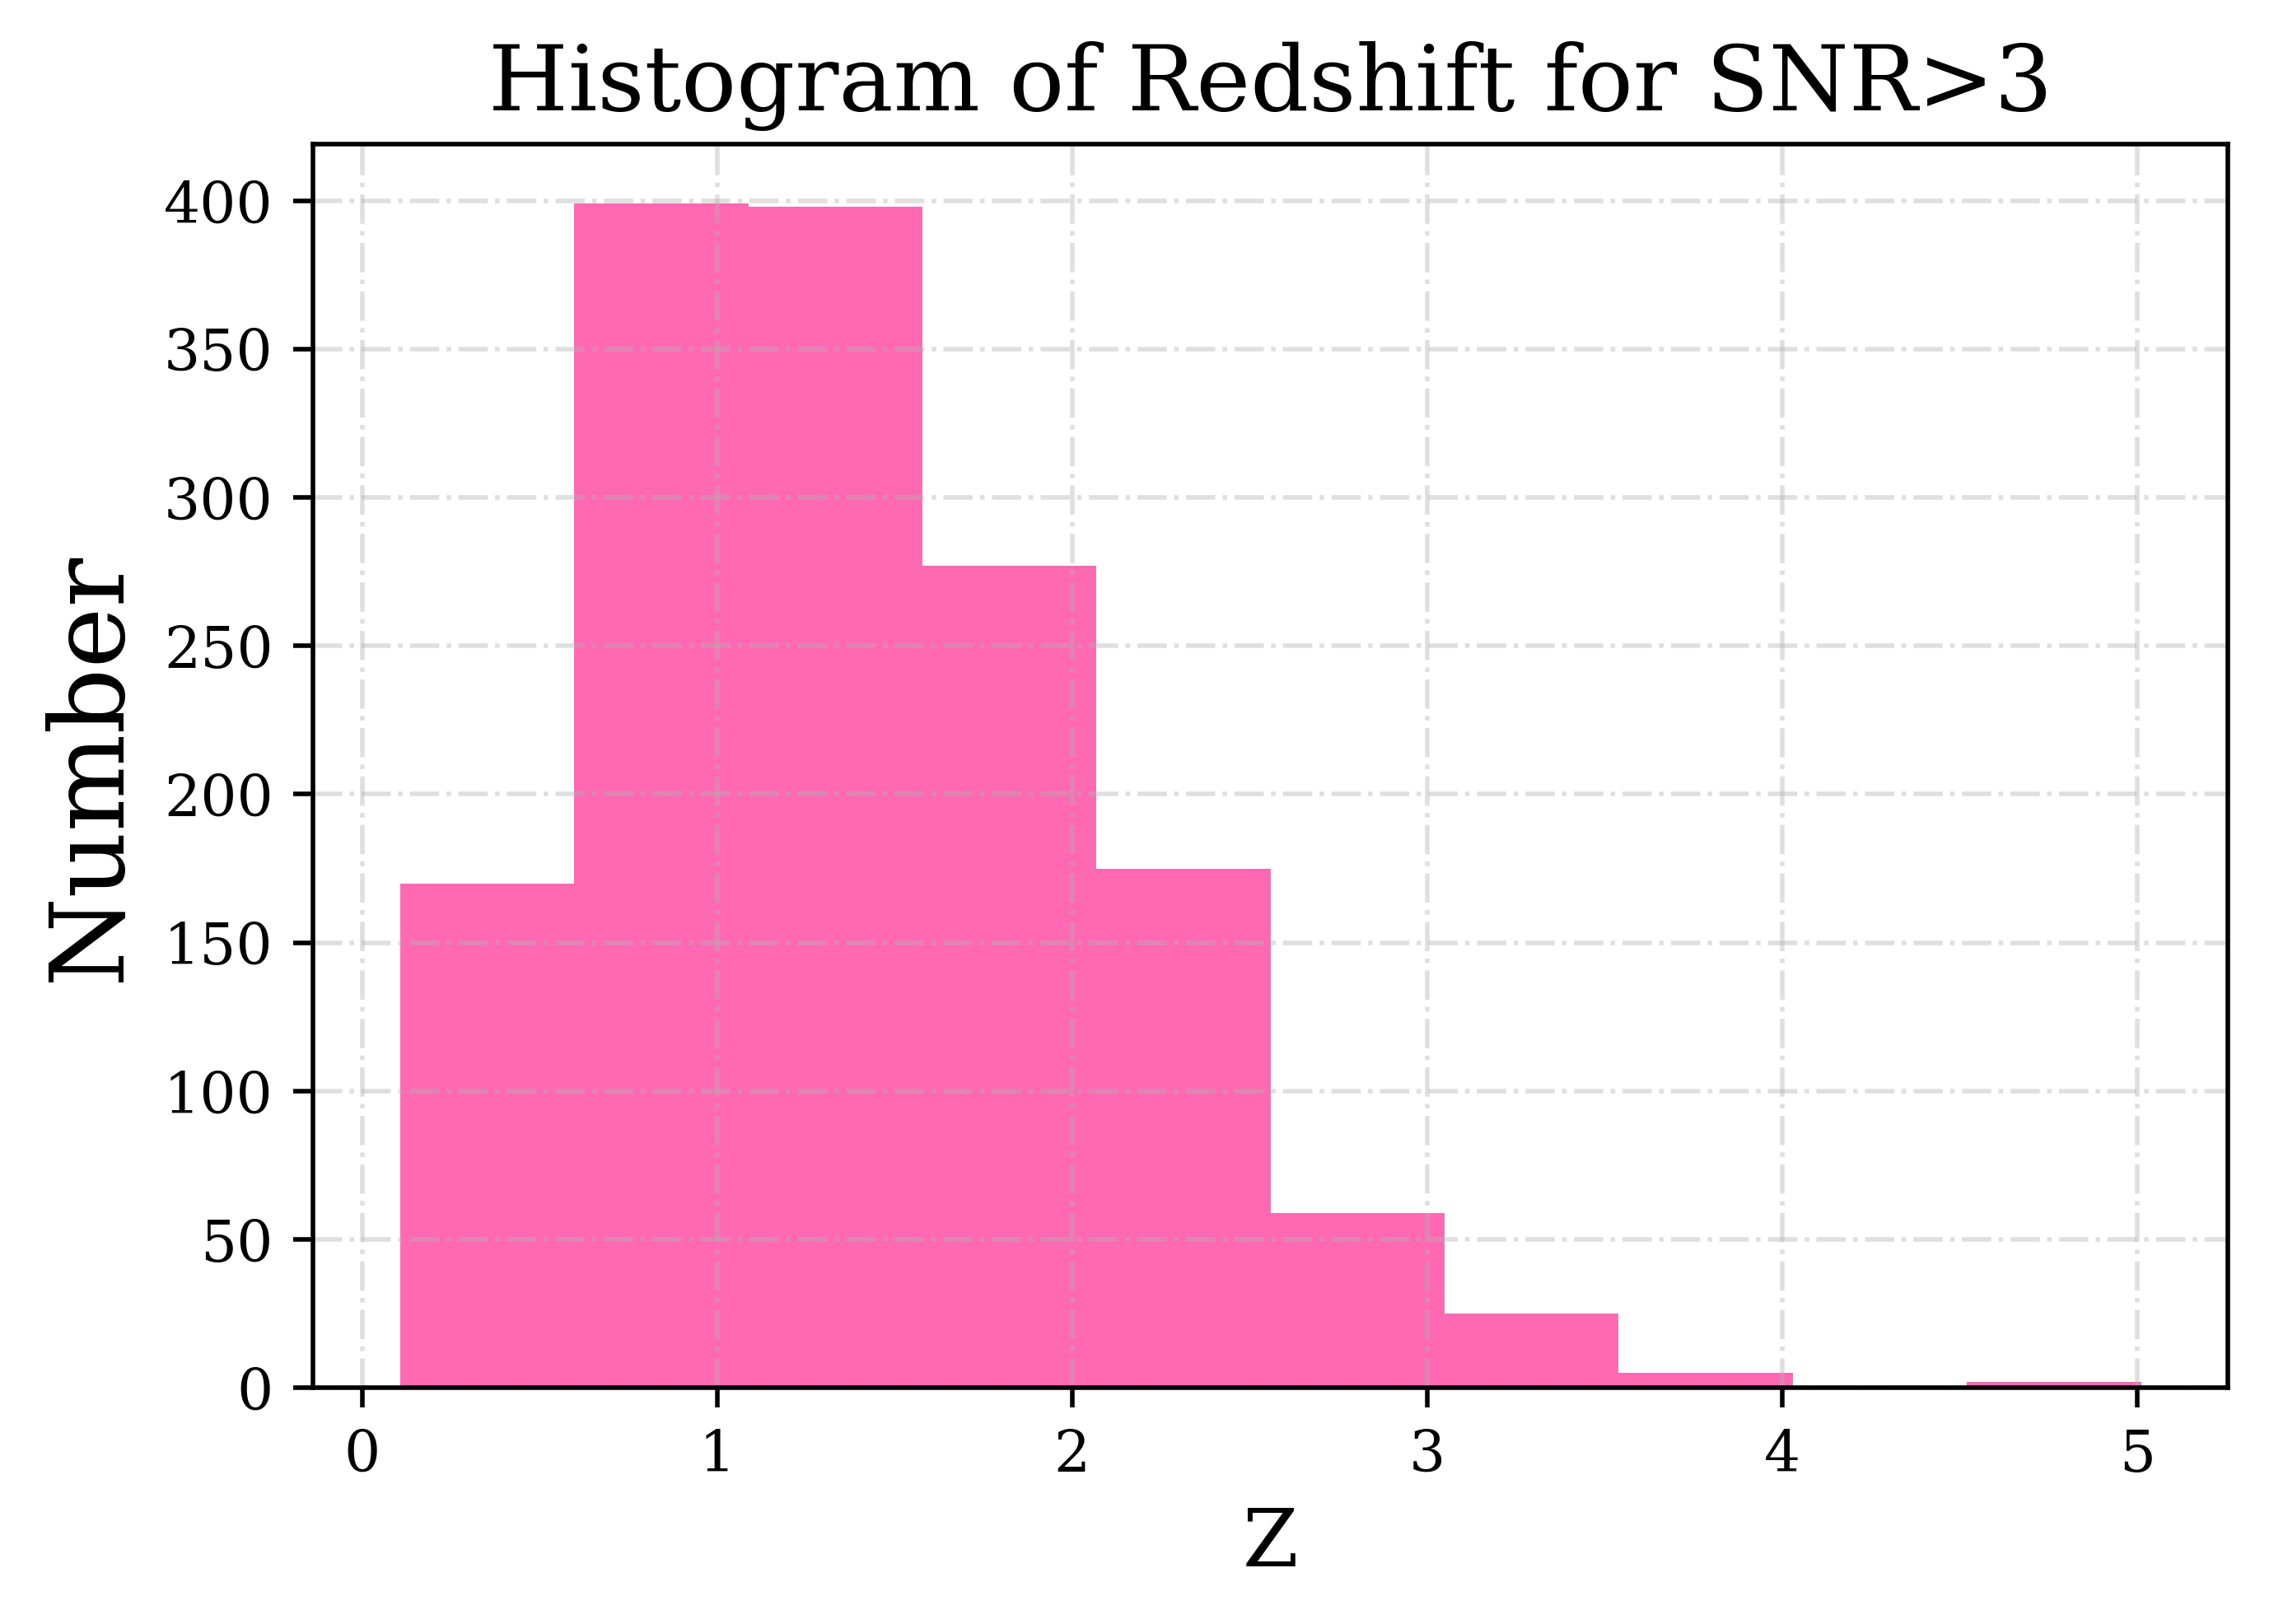

In [41]:
plt.figure()
%matplotlib inline
dpi=500   #to make the plot bigger 
mpl.rcParams['figure.dpi']= dpi
plt.rc('text', usetex=False)
plt.rc('font', family='serif')

plt.grid(True,ls='-.',alpha=.4)
plt.title(r'Histogram of Redshift for SNR>3',fontsize=16)
plt.xlabel(r'Z',fontsize=14)
plt.ylabel(r'Number',fontsize=18)

plt.hist(h_masked['Z'], color='hotpink')

plt.show()

In [42]:
len(h_masked)

1510

In [43]:
len(h_masked2)

616

In [44]:
len(h_masked3)

295

In [12]:
path = '/global/homes/i/ineslie/myhack/'

In [13]:
fname=path+'/Catalogs/DLA_DR14_v1b.fits'
c=fits.open(fname)
c

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x2aaad82525d0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x2aaaafa290d0>]

In [18]:
h=c[1]
h.header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   80 / width of table in bytes                        
NAXIS2  =                34518 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                   10 / number of fields in each row                   
TTYPE1  = 'THING_ID'           / label for field   1                            
TFORM1  = 'K       '           / data format of field: 8-byte INTEGER           
TTYPE2  = 'Z       '           / label for field   2                            
TFORM2  = 'D       '           / data format of field: 8-byte DOUBLE            
TTYPE3  = 'ZQSO    '        

In [20]:
h.data

FITS_rec([( 21073834, 2.484 , 2.715, 21.06, 7167, 56604, 290, 2.12797364e-02, -10.81391542,     1),
          ( 21643055, 2.6541, 2.826, 20.11, 7168, 56625, 336, 1.35897754e+00, -10.63795327,     2),
          ( 21690890, 2.6342, 3.461, 21.4 , 7167, 56604, 180, 3.46279198e-01, -10.71402486,     3),
          ...,
          (552987845, 2.1826, 2.288, 20.07, 6964, 56748, 664, 1.93208800e+02,  68.39614816, 34516),
          (553191513, 3.0859, 3.258, 20.03, 6966, 56748, 628, 1.81833084e+02,  68.53231083, 34517),
          (553213422, 2.5912, 2.703, 20.16, 6966, 56748, 748, 1.83883804e+02,  68.63815947, 34518)],
         dtype=(numpy.record, [('THING_ID', '>i8'), ('Z', '>f8'), ('ZQSO', '>f8'), ('NHI', '>f8'), ('PLATE', '>i8'), ('MJD', '>i8'), ('FIBERID', '>i8'), ('RA', '>f8'), ('DEC', '>f8'), ('DLAID', '>i8')]))

In [8]:
fname='/global/project/projectdirs/cosmo/data/sdss/dr14/eboss/spectro/redux/v5_10_0/spectra/5113/spec-5113-55924-0021.fits'

In [9]:
c=fits.open(fname)
c

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x2aaad82c0990>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x2aaad6826e90>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x2aaad82d6cd0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x2aaad82de050>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x2aaad82e84d0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x2aaad82f5a10>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x2aaad82fff90>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x2aaad830e450>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x2aaad831a950>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x2aaad8324e10>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x2aaad8333350>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x2aaad833f850>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x2aaad834ad50>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x2aaad8358290>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x2aaad8364790>, <astropy.i

In [21]:
h=c[0]
h.header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
TELESCOP= 'SDSS 2.5-M'         / Sloan Digital Sky Survey                       
FLAVOR  = 'science '           / exposure type, SDSS spectro style              
BOSSVER = '2       '           / ICC version                                    
MJD     =                55924 / APO fMJD day at start of exposure              
MJDLIST = '55923 55924'        /                                                
NAME    = '5113-55923-01'      / The name of the currently loaded plate         
PLATEID =                 5113 / The currently loaded plate                     
TILEID  =                13608 /Cartridge used in this plugging                 
CARTID  =                   

In [36]:
table = Table.read(c[13])
table

<Table length=3150>
    flux      loglam      ivar     mask ...    sky      calib        x    
  float32    float32    float32   int32 ...  float32   float32    float32 
----------- --------- ----------- ----- ... --------- ---------- ---------
  2.4632118 3.7660117 0.022377973     0 ... 3.9849539  0.7121777 410.29303
  5.2672844  3.766113 0.022354845     0 ...  4.049276 0.70613325  410.3088
 0.79415303 3.7662141 0.026672842     0 ...   4.19927 0.70386356 410.32462
  1.3775177 3.7663152  0.02685718     0 ...  4.433329  0.7155414  410.3404
 -7.2775087 3.7664163 0.035532746     0 ...  4.702236 0.73331547 410.35617
   4.297286 3.7665174  0.02880166     0 ... 4.9978337  0.7539079 410.37195
  6.4624496 3.7666183 0.024481032     0 ...  5.263738  0.7669374  410.3877
  3.7679076 3.7667193  0.02940149     0 ...  5.428787  0.7612738 410.40344
  -7.346776 3.7668204  0.03572837     0 ...   5.62077  0.7556322 410.41922
  -3.281171 3.7669215 0.033323888     0 ...  5.890122  0.7565244 410.43497
        ...       ...         ...   ... ...       ...        ...       ...
  4.4418454 4.0141582 0.044760074     0 ... 4.1237855  0.4711055 411.61325
-0.55763584  4.014219 0.046414047     0 ... 4.4355636  0.5118122 411.59793
  4.7404914  4.014279  0.03552176     0 ...  4.819113  0.5486936 411.58267
  1.3024974 4.0143394 0.036677442     0 ...  5.302939  0.5771084 411.56732
  -2.434795 4.0143995  0.03206055     0 ...  5.916631  0.5937351 411.55203
 -4.5576506   4.01446   0.0342763     0 ... 6.6747117  0.5961965  411.5367
 -0.8180173   4.01452   0.0363459     0 ... 7.3776336  0.5694145  411.5214
  11.904286 4.0145807 0.030601889     0 ...  8.012334 0.52284753 411.50604
  6.8720846  4.014641  0.03398784     0 ...  9.593001  0.5220529  411.4907
  4.0344305  4.014701 0.025722614     0 ... 12.860162  0.5795251 411.47534